# 🚀 Customer Churn Prediction: A Data-Driven Strategy for Retention
**Project Framework: Leveraging CRISP-DM Methodology to Understand, Predict, and Combat Customer Churn.**

---

## 🌟 **Introduction: Methodology**

This project follows the **CRISP-DM methodology** to systematically address customer churn:

1. **Business Understanding:** Define the impact of churn and set prediction and retention goals.  
2. **Data Understanding:** Analyze the data to identify key churn drivers.  
3. **Data Preparation:** Preprocess the data for quality inputs.  
4. **Modeling:** Develop machine learning models to predict churn.  
5. **Evaluation:** Assess models with metrics like AUC and precision.  
6. **Deployment:** Create actionable retention strategies based on model outputs.

---

## 📊 **I. Business Understanding: Churn in the Telecom Industry**

### 🧐 **Problematic:**

Customer churn represents a significant challenge for the telecom industry. Retaining existing customers is more cost-effective than acquiring new ones. In competitive markets, identifying at-risk customers and developing targeted strategies to retain them is crucial for maintaining profitability. The key challenge is accurately predicting churn based on usage patterns, demographics, and customer interactions.

### 🌍 **General Context:**

Telecom companies strive to reduce churn rates and improve customer satisfaction. Churn can be influenced by various factors such as:

- **Service Quality**  
- **Pricing and Competition**  
- **Customer Service Interactions**  
- **Contract Terms**  

Accurately understanding and predicting churn enables companies to implement **personalized retention strategies** and **improve customer loyalty**.

---

## 📑 **Insights from Research Articles**

### 📝 **Article 1:**  
**Title:** *Implementing Machine Learning Techniques for Customer Retention and Churn Prediction in Telecommunications*  

- **Business Objective:**  
  Identify customers most likely to churn and reduce churn rates to minimize financial losses.

- **Data Science Objective:**  
  Build an accurate churn prediction model that outperforms traditional methods.

---

### 📝 **Article 2:**  
**Title:** *Explaining Customer Churn Prediction in the Telecom Industry Using Tabular Machine Learning Models*  

- **Business Objective:**  
  Reduce churn and improve customer satisfaction by identifying key dissatisfaction points driving churn.

- **Data Science Objective:**  
  Develop a high-performing classification model and use explainability techniques to identify critical churn factors.

---

### 📝 **Article 3:**  
**Title:** *Customer Churn Prediction in the Telecom Sector Using Machine Learning Techniques*  

- **Business Objective:**  
  Analyze customer retention trends to identify key drivers of loyalty and churn, informing retention strategies.

- **Data Science Objective:**  
  Implement data-driven retention strategies based on churn predictions.

---

This structured approach ensures a comprehensive understanding of customer churn, leveraging machine learning models to drive actionable business insights.
  Implement data-driven retention strategies informed by churn predictions.
strategies informed by churn predictions.
strategies informed by churn predictions.
strategies informed by churn predictions.


**Loading libraries and data**

In [ ]:
pip install lifelines

In [ ]:
pip install tensorflow


In [ ]:
#import the required libraries
import numpy as np
import shap
from lifelines import CoxPHFitter
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score
import matplotlib.ticker as mtick
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import tree
import math
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
%matplotlib inline

C:\Users\GAMING\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#loading data
df_train = pd.read_csv('churn-bigml-80.csv')
df_test = pd.read_csv('churn-bigml-20.csv')
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)

# 📊 II. **Data Understanding**
**Objective:**  
Analyze the dataset to understand the key features driving churn and assess data quality.

**Actions:**  
- Perform exploratory data analysis (EDA) to identify patterns such as service usage, billing, and customer demographics.  
- Detect missing values, outliers, and inconsistencies.  
- Visualize key features influencing churn (e.g., tenure).

**Tools:**  
- Pandas, Matplotlib, Seaborn for data exploration and visulization.


## 1-explorer les données

In [ ]:
df.shape

(3333, 20)

In [ ]:
df.head(5)

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [ ]:
df.columns.values

array(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'], dtype=object)

In [ ]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

**1-Categorical cols**

In [ ]:
categorical_cols = df.columns[df.dtypes==object].tolist()
print('categorical cols = \n',categorical_cols)
print('categorical cols modalities = \n',df[categorical_cols].nunique())

categorical cols = 
 ['State', 'International plan', 'Voice mail plan']
categorical cols modalities = 
 State                 51
International plan     2
Voice mail plan        2
dtype: int64


Categorical features include 'State' (51 modalities, potentially revealing regional patterns), 'International plan,' and 'Voice mail plan' (both binary, likely significant for churn analysis)

**2-numerical cols**

In [ ]:
numerical_cols = df.columns[df.dtypes!=object].tolist()
print('numerical cols = \n',numerical_cols)
print('Number of numerical cols = \n',len(numerical_cols))

numerical cols = 
 ['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']
Number of numerical cols = 
 17


"There are 17 numerical features such as 'Account length,' 'Total day minutes,' and 'Customer service calls.'"

In [ ]:
float_cols = df.select_dtypes(include=['float']).columns.tolist()
print('Float columns = \n', float_cols)  # Display the list of float columns
print('Number of float columns = \n', len(float_cols))  # Display the count of float columns

Float columns = 
 ['Total day minutes', 'Total day charge', 'Total eve minutes', 'Total eve charge', 'Total night minutes', 'Total night charge', 'Total intl minutes', 'Total intl charge']
Number of float columns = 
 8


"There are 8 float columns, including 'Total day minutes,' 'Total eve charge,' and 'Total intl minutes,' representing customer usage and charges."

In [ ]:
int_cols = df.select_dtypes(include=['int']).columns.tolist()
print('Integer columns = \n', int_cols)  # Display the list of integer columns
print('Number of integer columns = \n', len(int_cols))  # Display the count of integer columns

Integer columns = 
 ['Account length', 'Area code', 'Number vmail messages', 'Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls', 'Customer service calls']
Number of integer columns = 
 8


"There are 8 integer columns, including 'Account length,' 'Total day calls,' and 'Customer service calls,' representing customer activity and service interactions."

In [ ]:
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
print('Boolean columns = \n', bool_cols)  # Display the list of boolean columns
print('Number of boolean columns = \n', len(bool_cols))  # Display the count of boolean columns

Boolean columns = 
 ['Churn']
Number of boolean columns = 
 1


#### "Churn is the target variable, indicating whether a customer has churned."


## 2-Data Visualization

Distribution of numerical variables:


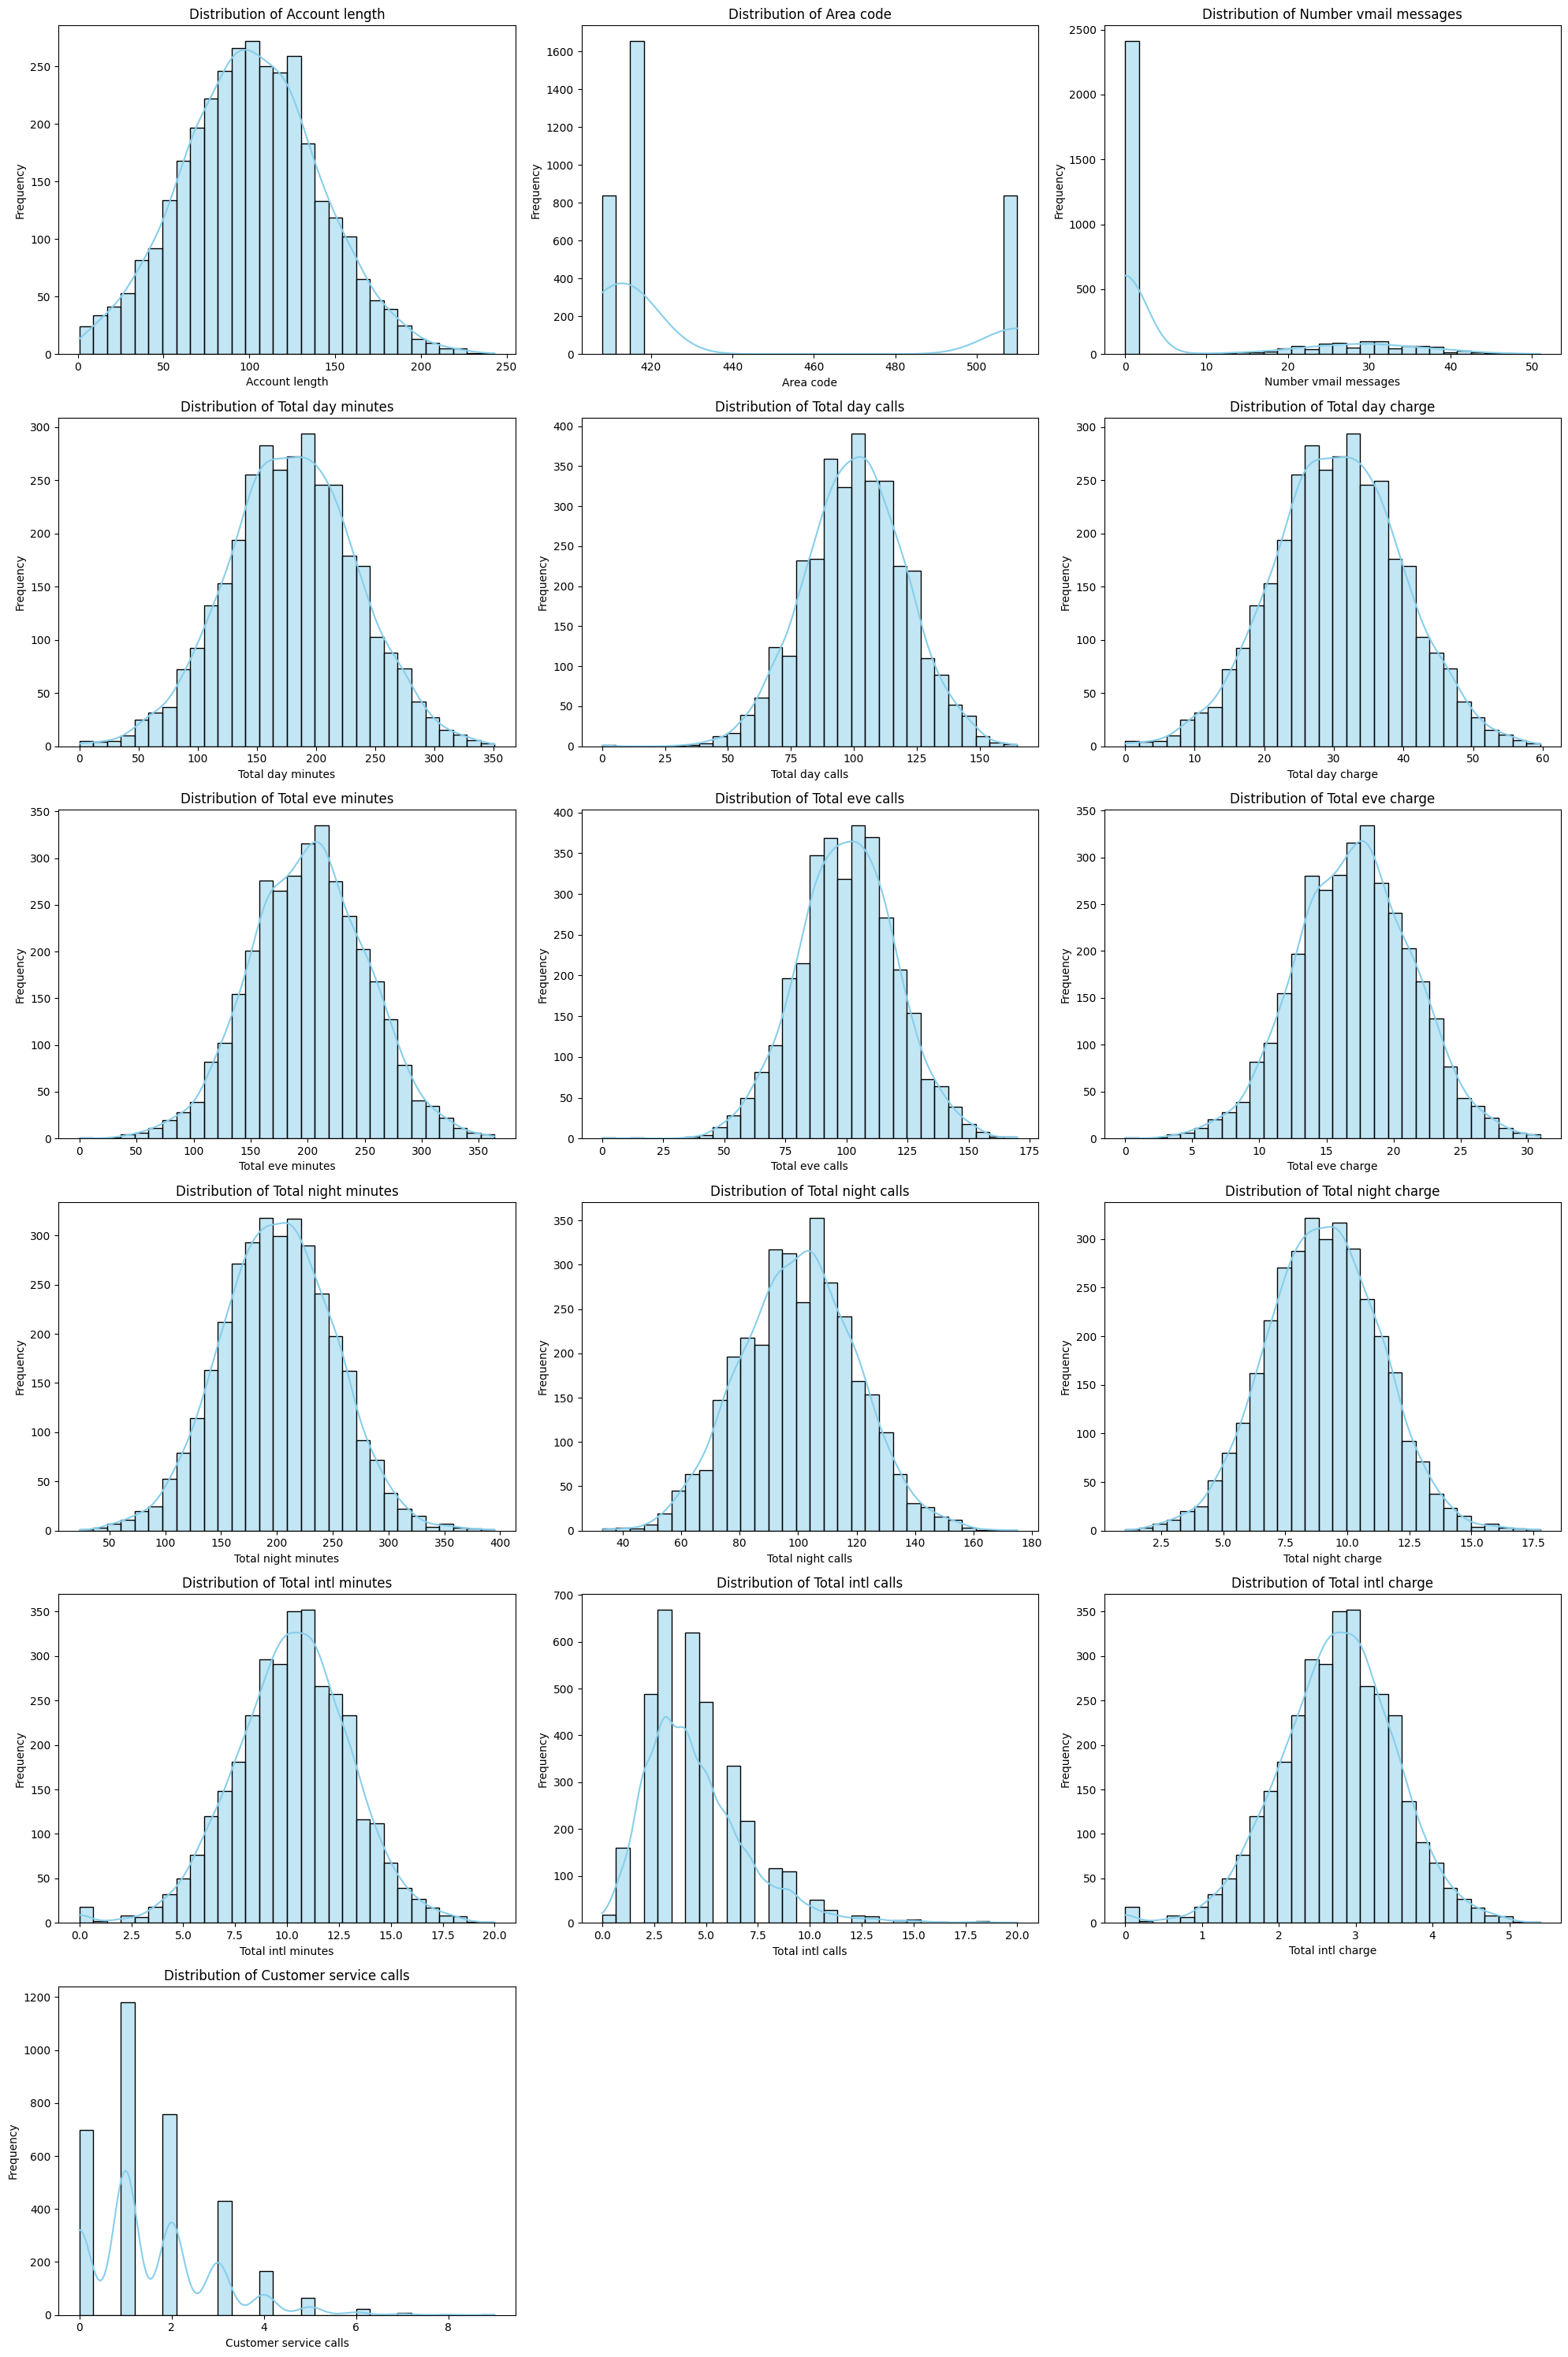

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Visualiser les colonnes numériques
print("Distribution of numerical variables:")
num_num_cols = len(numerical_cols)
num_cols = 3  # Nombre de colonnes par ligne
num_rows = math.ceil(num_num_cols / num_cols)

plt.figure(figsize=(20, num_rows * 5))  # Taille ajustée pour les colonnes numériques
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=df, x=col, kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

Distribution of categorical variables (excluding Churn):


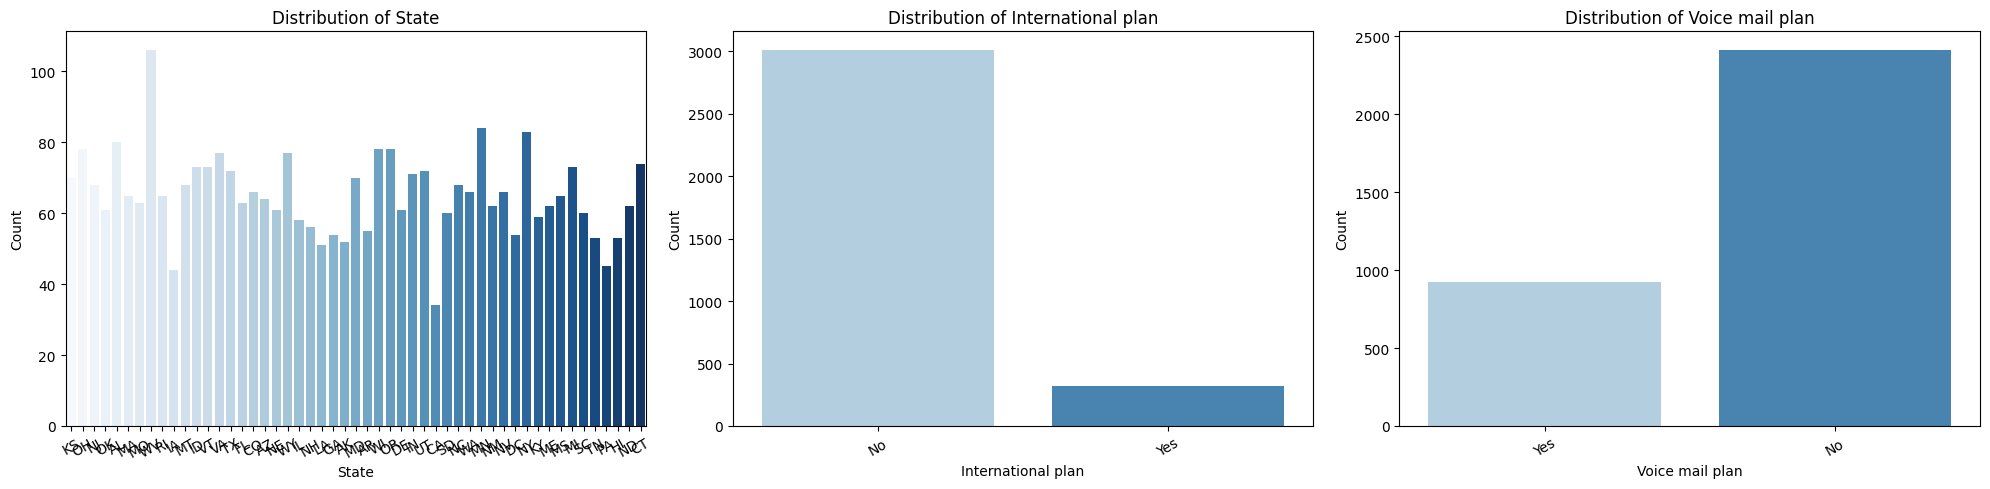

In [ ]:

categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_cols.remove('Churn')

print("Distribution of categorical variables (excluding Churn):")
num_cat_cols = len(categorical_cols)
num_cols = 3
num_rows = math.ceil(num_cat_cols / num_cols)

plt.figure(figsize=(20, num_rows * 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(data=df, x=col, hue=col, legend=False, palette='Blues')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


In [ ]:
100*df['Churn'].value_counts()/len(df['Churn'])

Churn
False    85.508551
True     14.491449
Name: count, dtype: float64

"There is an imbalance between the classes of the target variable (FALSE >>> TRUE), with more 'FALSE' than 'TRUE' instances."

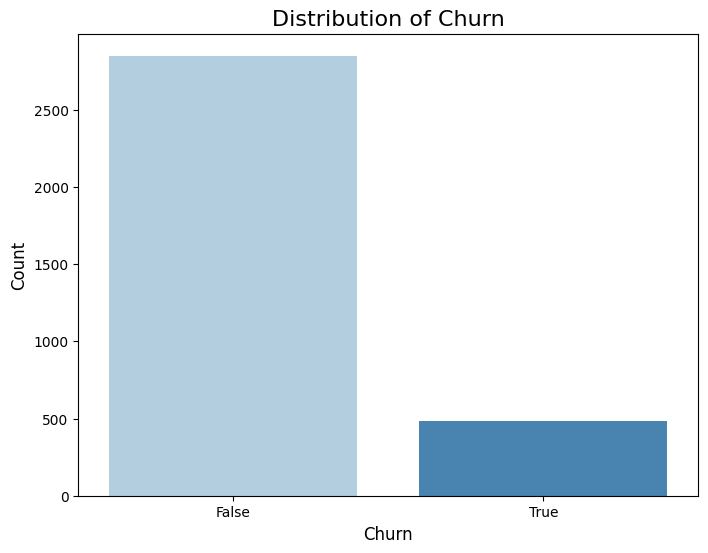

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn', hue='Churn', palette='Blues', legend=False)
plt.title('Distribution of Churn', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#### a-Numerical variables grouped by Churn

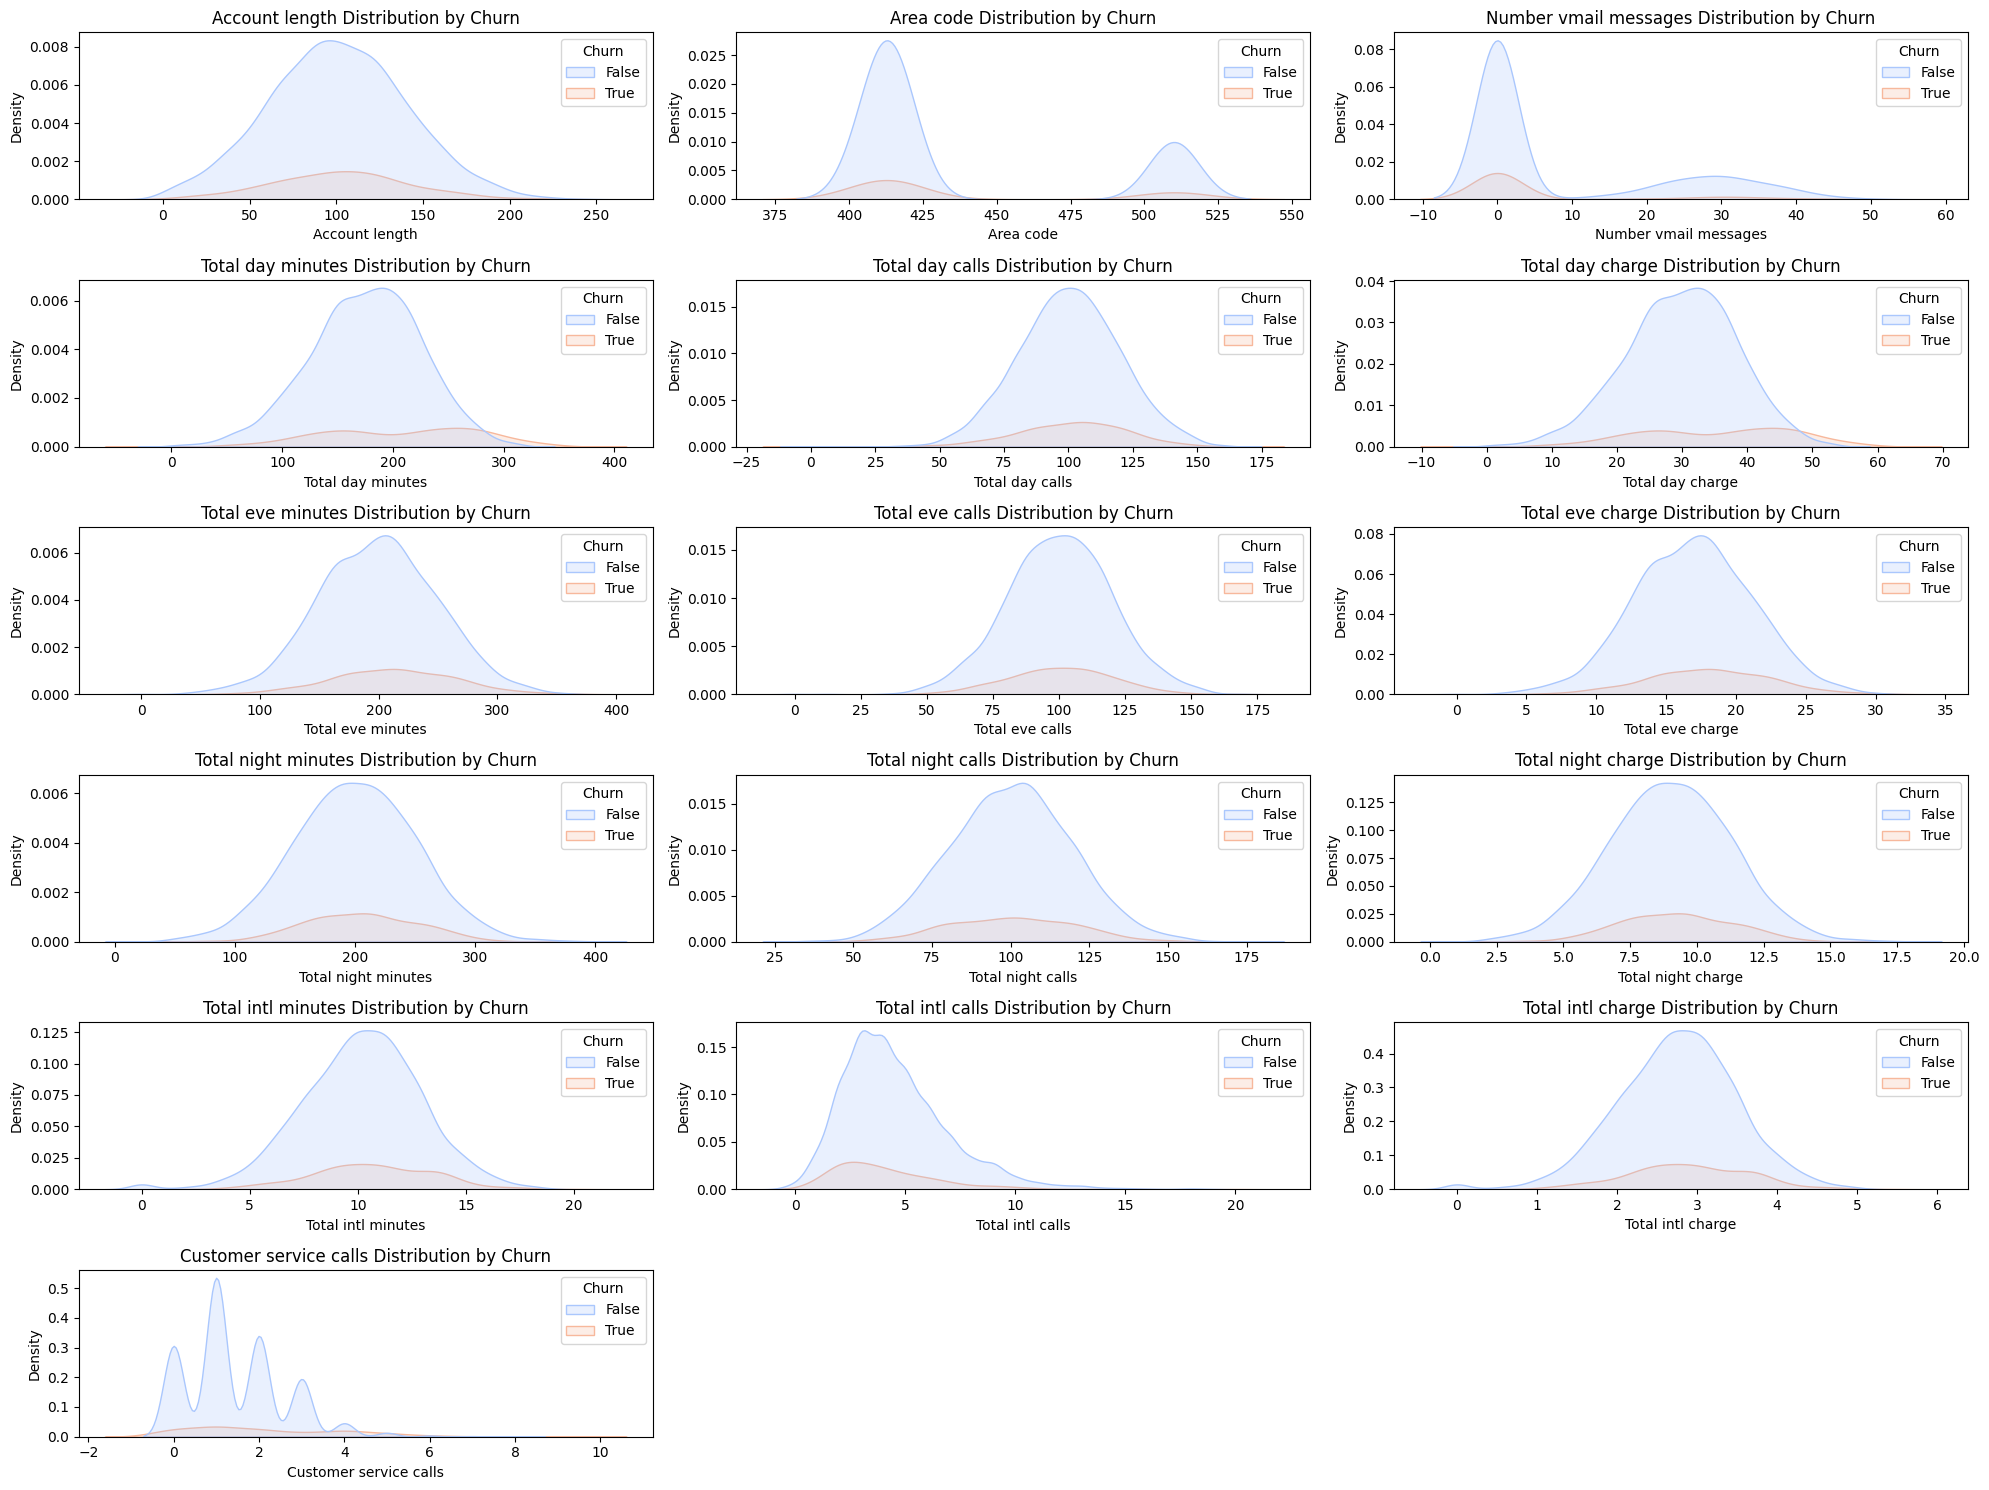

In [ ]:

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i + 1)  # Adjust rows/cols
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True, palette='coolwarm')
    plt.title(f'{col} Distribution by Churn', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Density', fontsize=10)
plt.tight_layout()
plt.show()


"This visualization explores the distribution of numerical variables within a telecom dataset, with a focus on how these distributions differ between churned and non-churned customers."


#### b-Categorical variables grouped by Churn

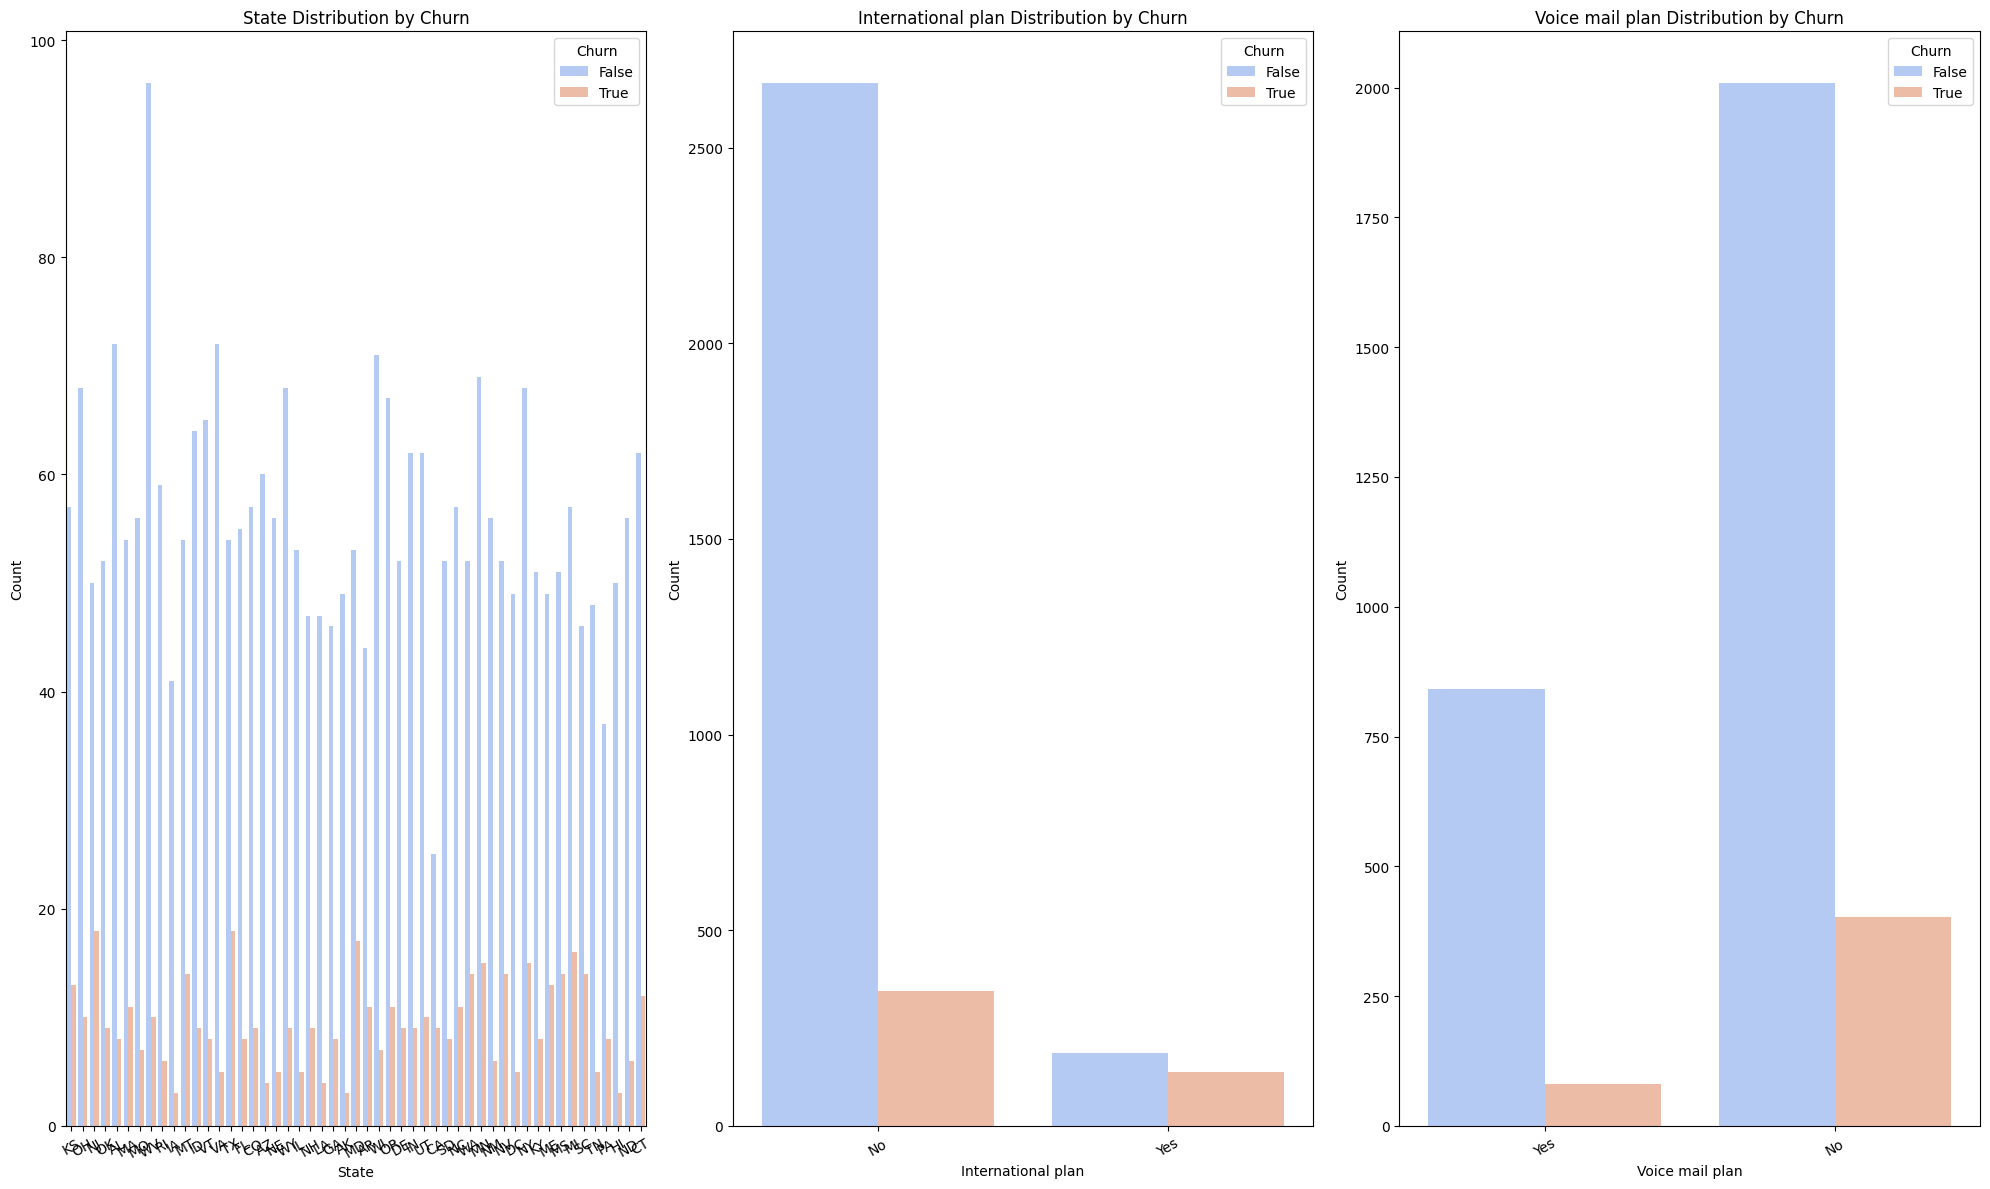

In [ ]:
# Categorical variables grouped by Churn
plt.figure(figsize=(20, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot((len(categorical_cols) + 2) // 3, 3, i + 1)  # Adjust rows/cols
    sns.countplot(data=df, x=col, hue='Churn', palette='coolwarm')
    plt.title(f'{col} Distribution by Churn', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.xticks(rotation=30)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

"The 'State' distribution shows that some states have a higher proportion of churned customers than others. This suggests that geographical location might be a factor in churn."
"Customers with an 'International Plan' appear to have a higher churn rate compared to those without."
"The 'Voice mail plan' distribution indicates a slightly higher churn rate for customers with a voice mail plan."


## 3-Detect Missing Values


In [ ]:
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


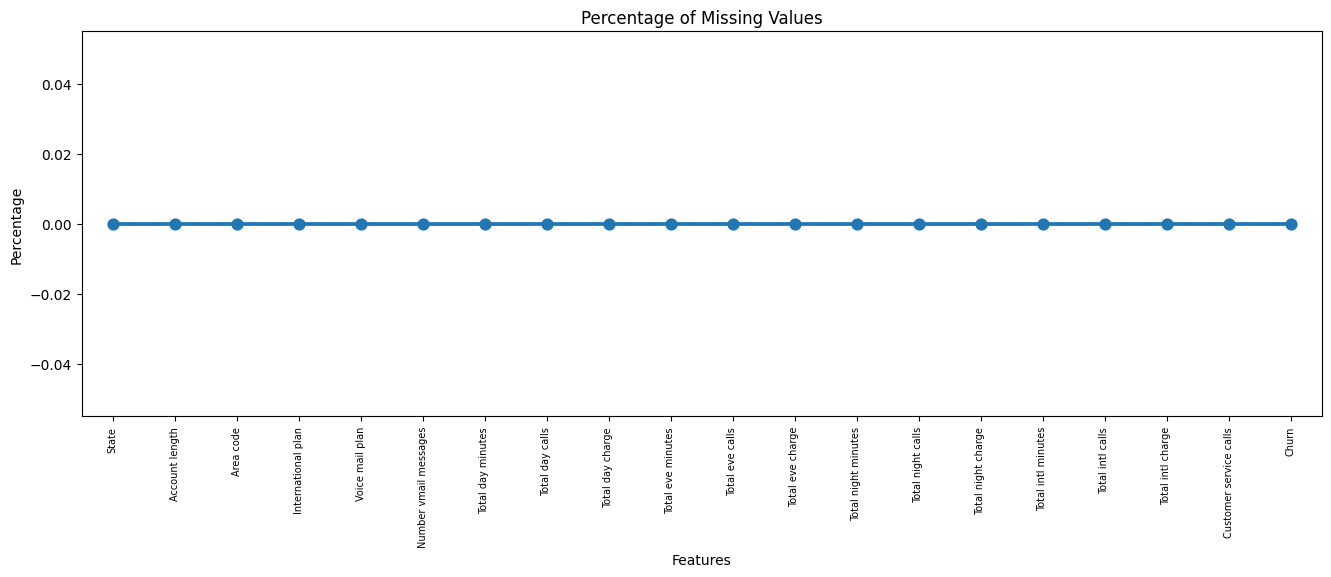

In [ ]:
# Calculate the percentage of missing values
missing = pd.DataFrame({
    'Feature': df.columns,
    'Percentage': (df.isnull().sum() * 100) / df.shape[0]
}).reset_index(drop=True)

# Plot the percentage of missing values
plt.figure(figsize=(16, 5))
sns.pointplot(x='Feature', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.xlabel("Features")
plt.show()

Here, we don't have any missing data.

## 4- Identify Outliers Using Boxplots


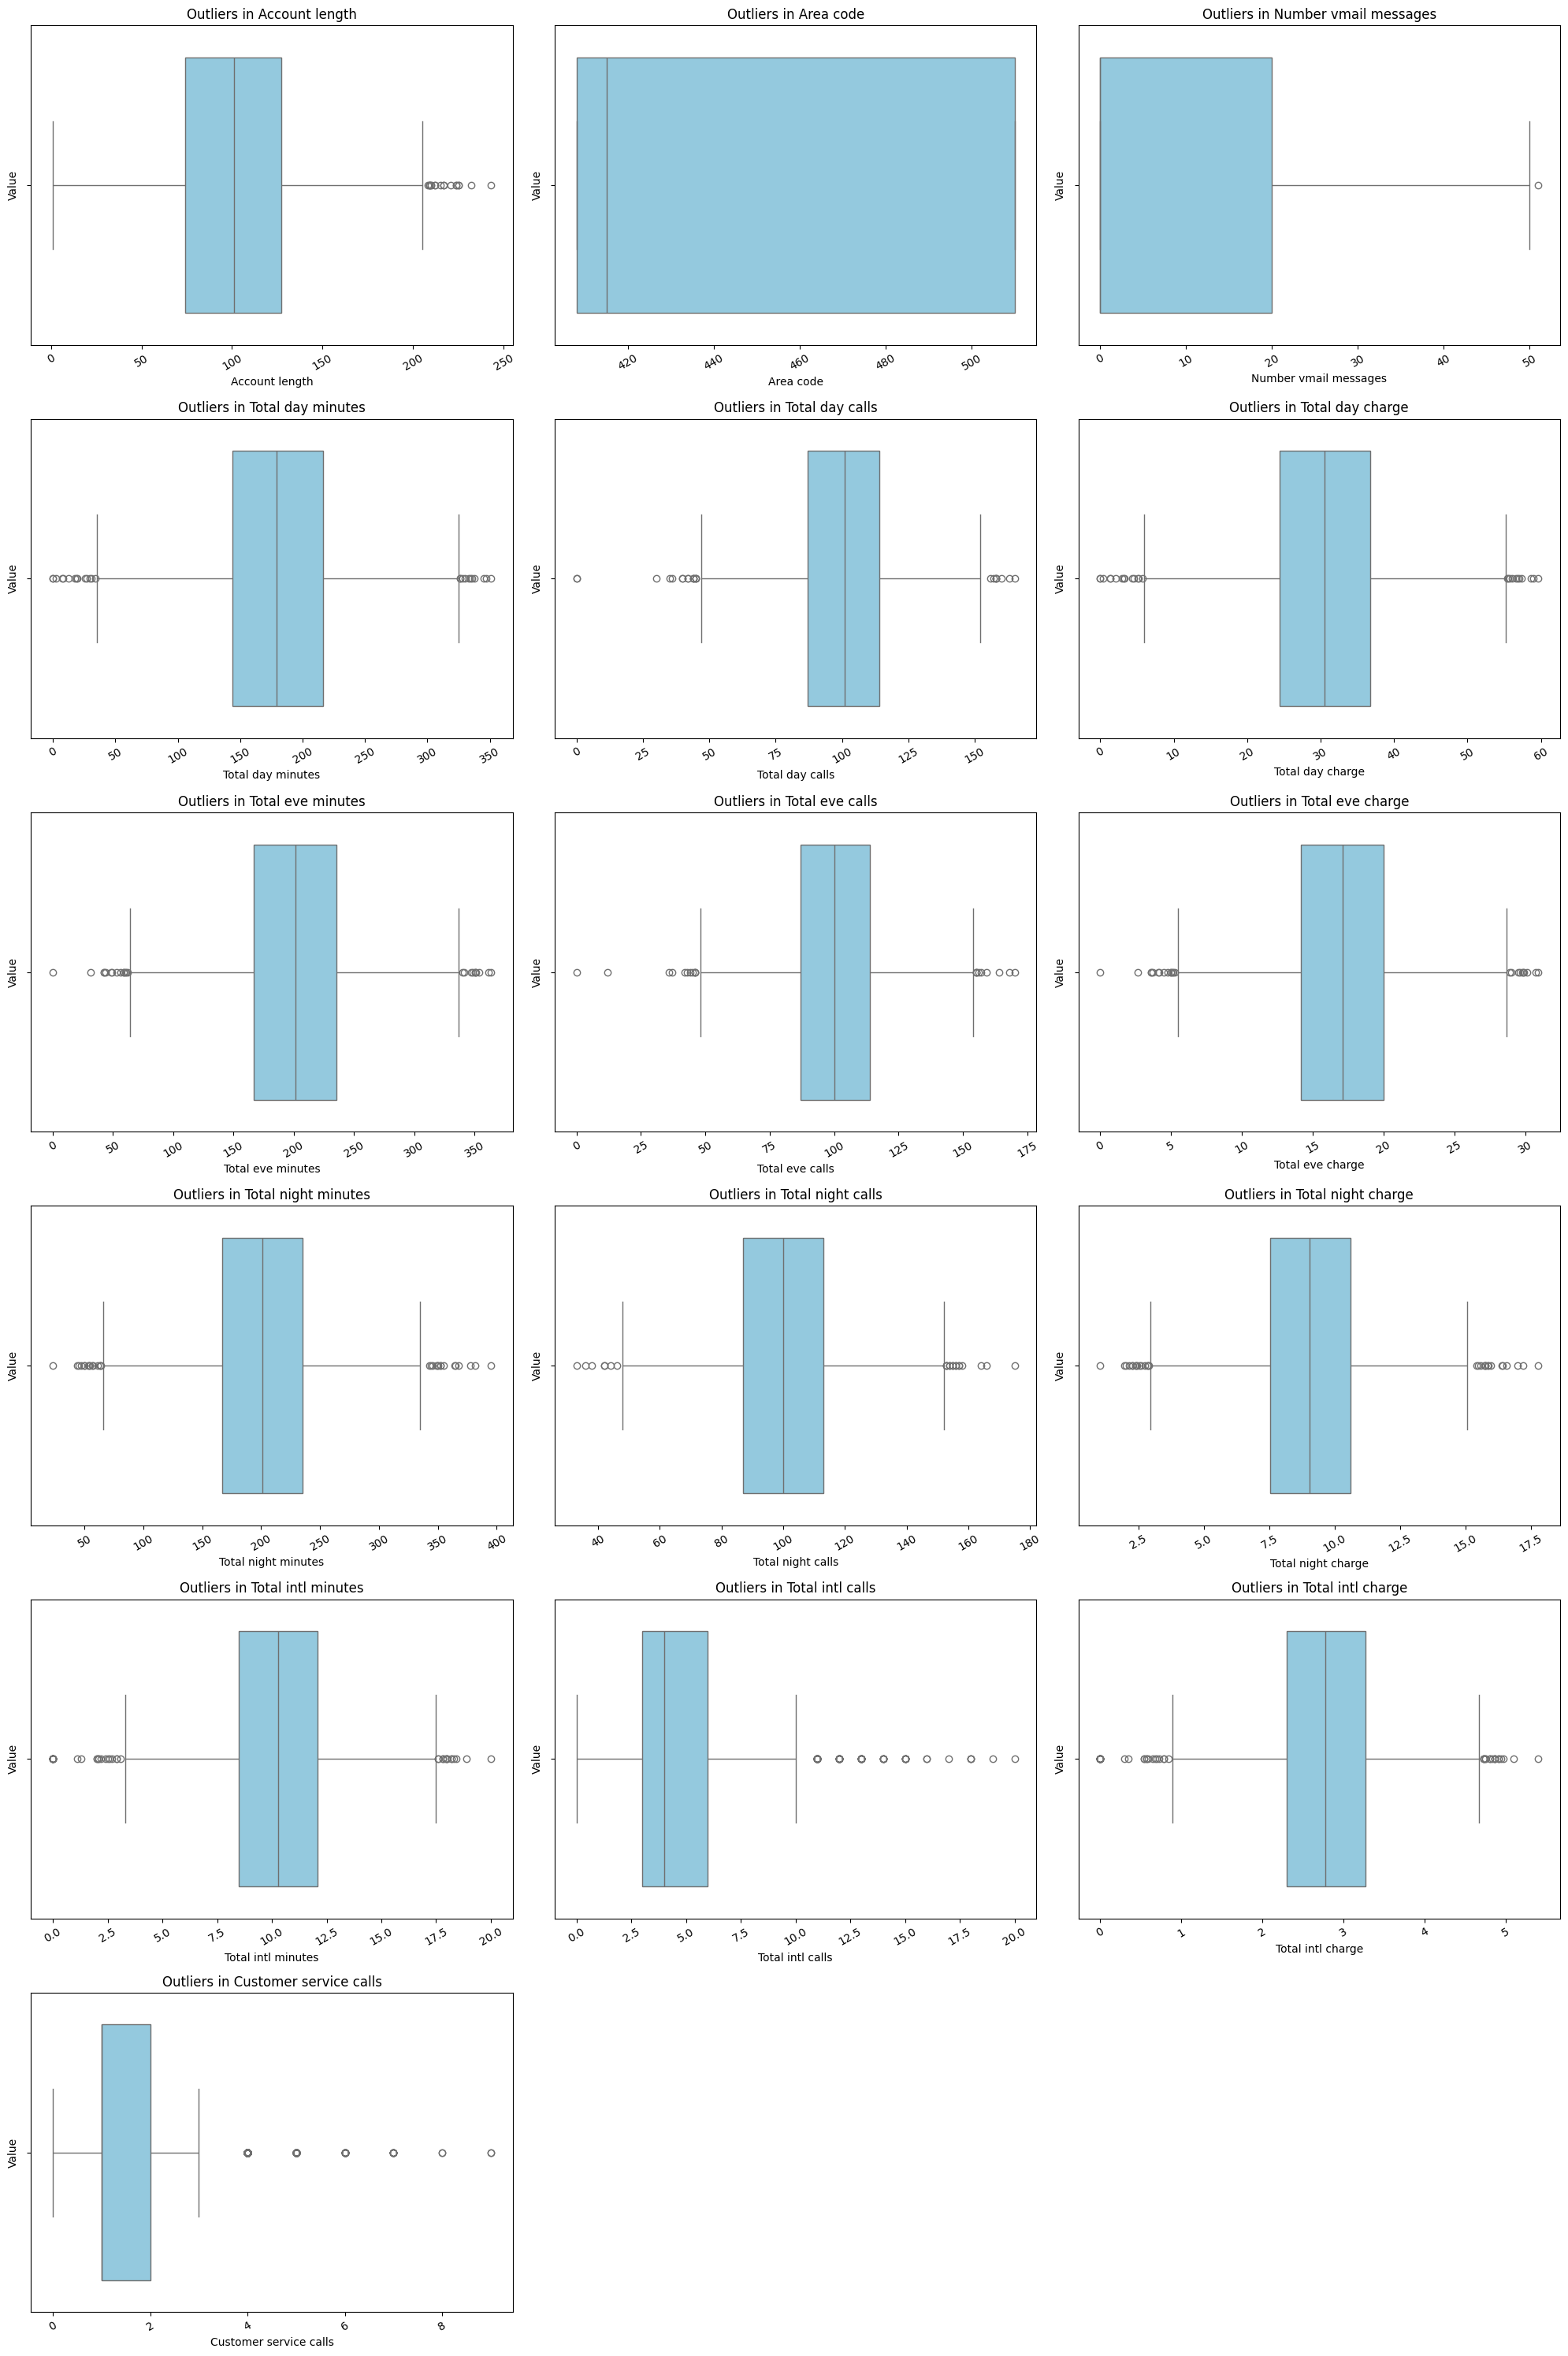

In [ ]:
# Visualiser les outliers pour toutes les colonnes numériques
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculer le nombre de lignes nécessaires (3 graphiques par ligne)
num_cols = 3
num_rows = math.ceil(len(numerical_cols) / num_cols)

plt.figure(figsize=(20, num_rows * 5))  # Ajuster la taille de la figure en fonction des lignes

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)  # Organiser 3 graphiques par ligne
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Outliers in {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Value', fontsize=10)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

"This visualization uses boxplots to identify potential outliers in the numerical variables of the telecom dataset. Outliers can be influential in machine learning models and can affect the accuracy of predictions."

# 🛠️ III. **Data Preparation: Cleaning and Transformation**
**Objective:**  
Prepare the data by cleaning, transforming, and addressing class imbalance to build robust models.

**Actions:**  
- Handle missing values.  
- Encode categorical variables.  
- Normalize or standardize numerical features .  
- Balance the dataset using SMOTE or other techniques.

**Tools:**  
- Scikit-learn, Imbalanced-learn for data pre-processing and balancing.


In [ ]:
## Create a copy of base data for manupulation & processing
df_prep = df.copy()

In [ ]:
df_prep.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

#### 1- Convert 'International plan' and 'Voice mail plan' Variables


In [ ]:
# Convertir les variables 'International plan' et 'Voice mail plan' en valeurs binaires (1 pour 'Yes' et 0 pour 'No')
df_prep['International plan'] = df_prep['International plan'].map({'Yes': 1, 'No': 0})
df_prep['Voice mail plan'] = df_prep['Voice mail plan'].map({'Yes': 1, 'No': 0})

# Vérifier la transformation
print(df_prep[['International plan', 'Voice mail plan']].head())


   International plan  Voice mail plan
0                   0                1
1                   0                1
2                   0                0
3                   1                0
4                   1                0


In [ ]:
df_prep.head()

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415                   0                1   
1    OH             107        415                   0                1   
2    NJ             137        415                   0                0   
3    OH              84        408                   1                0   
4    OK              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

#### 2-Convert Target 'Churn'

In [ ]:
# Convertir la colonne 'Churn' en valeurs binaires (0 pour False et 1 pour True)
df_prep['Churn'] = df_prep['Churn'].astype(int)

# Vérifier la transformation
print(df_prep['Churn'].head())


0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64


In [ ]:
df_prep.head()

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415                   0                1   
1    OH             107        415                   0                1   
2    NJ             137        415                   0                0   
3    OH              84        408                   1                0   
4    OK              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

### 3-Transformation de la colonne 'State'

**a- Transformation de la colonne 'State' par the Mean of the Target**

In [ ]:
# Compter le nombre de valeurs uniques dans la colonne 'State'
unique_states = df_train['State'].nunique()
# Afficher le résultat
print(f'Number of unique values in "State" column: {unique_states}')


Number of unique values in "State" column: 51


In [ ]:
# Target encoding for 'STATE'
target_mean = df_prep.groupby('State')['Churn'].mean()  # Replace 'Churn' with your target column
df_prep['STATE_TargetMean'] = df_prep['State'].map(target_mean)

**a- Transformation de la colonne 'State' par LabelEncoder**

In [ ]:
# Initialisation du LabelEncoder
label_encoder = LabelEncoder()
# Appliquer le LabelEncoder sur la colonne 'State' et créer une nouvelle colonne
df_prep['STATE_Label'] = label_encoder.fit_transform(df_prep['State'])

In [ ]:
df_prep = df_prep.drop(columns=['State'])

In [ ]:
df_prep.head()

Account length  Area code  International plan  Voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  ...  \
0             45.07              197.4               99  ...   
1             27.47              195.5              103  ...   
2             41.38              121.2              110  ...   
3             50.90               61.9               88  ...   
4             28.34              148.3              122  ...   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  STATE_TargetMean  STATE_Label  
0                       1      0          0.185714           16  
1                       1      0          0.128205           35  
2                       0      0          0.264706           31  
3                       2      0          0.128205           35  
4                       3      0          0.147541           36  

[5 rows x 21 columns]

In [ ]:
df_prep.shape

(3333, 21)

In [ ]:
df_prep.dtypes

Account length              int64
Area code                   int64
International plan          int64
Voice mail plan             int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
STATE_TargetMean          float64
STATE_Label                 int64
dtype: object

#### 4-Correlation

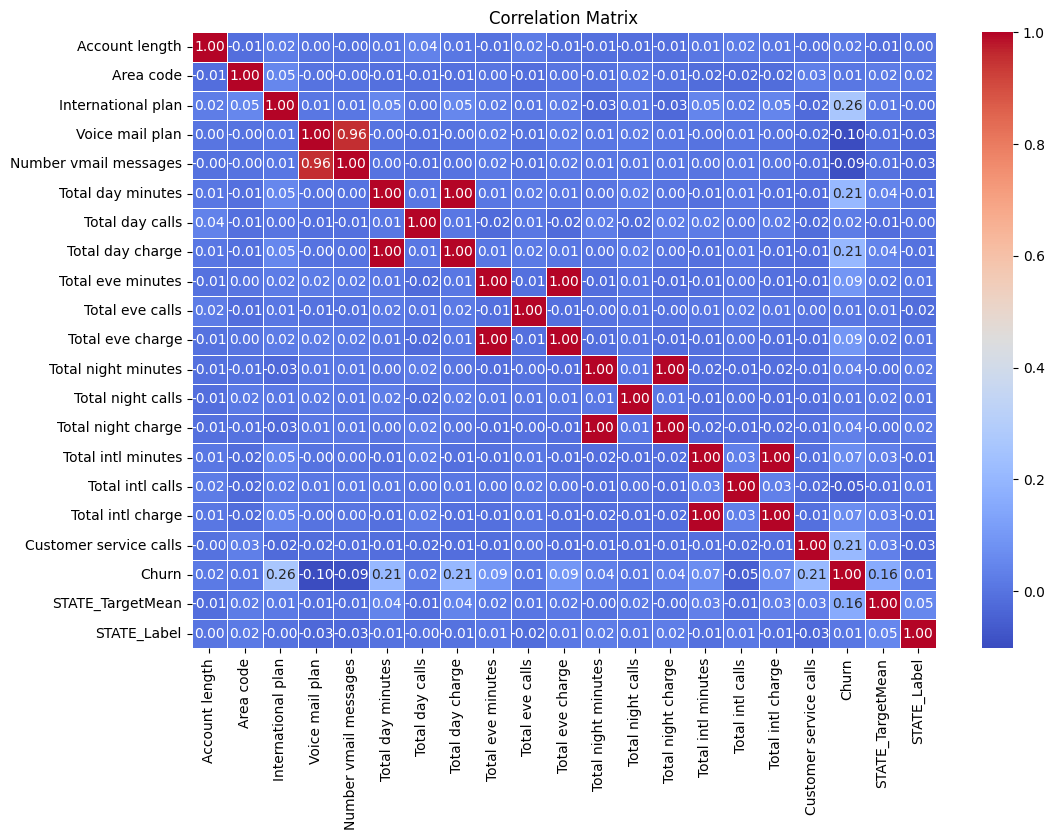

In [ ]:
# 1. Définir les colonnes numériques
numerical_columns = df_prep.select_dtypes(include=['int64', 'float64']).columns

# 2. Étude de la corrélation avant normalisation
# Calculer la matrice de corrélation avant normalisation
corr_data = df_prep[numerical_columns].corr()

# Afficher la heatmap de la corrélation avant normalisation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# 3. Select the upper triangle of the correlation matrix
upper_triangle = corr_data.where(
    np.triu(np.ones(corr_data.shape), k=1).astype(bool)
)

# 4. Identify columns with correlation > 0.8
high_correlation_columns = [
    column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)
]

# 5. Drop highly correlated columns
df_prep_dropped = df_prep.drop(columns=high_correlation_columns)

# 6. Display the dropped columns
print(f"Columns dropped due to high correlation: {high_correlation_columns}")

Columns dropped due to high correlation: ['Number vmail messages', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']


"The initial correlation analysis revealed strong linear relationships between several usage-related features, such as'Number vmail messages', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge'. To address potential multicollinearity and improve model stability, highly correlated features were dropped.

In [ ]:
# Display the dataframe after dropping columns
df_prep_dropped.head()

Account length  Area code  International plan  Voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   Total day minutes  Total day calls  Total eve minutes  Total eve calls  \
0              265.1              110              197.4               99   
1              161.6              123              195.5              103   
2              243.4              114              121.2              110   
3              299.4               71               61.9               88   
4              166.7              113              148.3              122   

   Total night minutes  Total night calls  Total intl minutes  \
0                244.7                 91                10.0   
1                254.4                103                13.7   
2                162.6                104                12.2   
3                196.9                 89                 6.6   
4                186.9                121                10.1   

   Total intl calls  Customer service calls  Churn  STATE_TargetMean  \
0                 3                       1      0          0.185714   
1                 3                       1      0          0.128205   
2                 5                       0      0          0.264706   
3                 7                       2      0          0.128205   
4                 3                       3      0          0.147541   

   STATE_Label  
0           16  
1           35  
2           31  
3           35  
4           36

#### 5- Identify outliers

In [ ]:
lower_limit = df_prep_dropped.quantile(0.05)
upper_limit = df_prep_dropped.quantile(0.95)
print(lower_limit)
print(upper_limit)
# Clip all numerical columns based on the limits
df_prep_clipped = df_prep_dropped.apply(lambda x: x.clip(lower_limit[x.name], upper_limit[x.name]))

Account length             35.0000
Area code                 408.0000
International plan          0.0000
Voice mail plan             0.0000
Total day minutes          89.9200
Total day calls            67.0000
Total eve minutes         118.8000
Total eve calls            67.0000
Total night minutes       118.1800
Total night calls          68.0000
Total intl minutes          5.7000
Total intl calls            1.0000
Customer service calls      0.0000
Churn                       0.0000
STATE_TargetMean            0.0625
STATE_Label                 2.0000
Name: 0.05, dtype: float64
Account length            167.00
Area code                 510.00
International plan          1.00
Voice mail plan             1.00
Total day minutes         270.74
Total day calls           133.00
Total eve minutes         284.30
Total eve calls           133.00
Total night minutes       282.84
Total night calls         132.00
Total intl minutes         14.70
Total intl calls            9.00
Customer service 

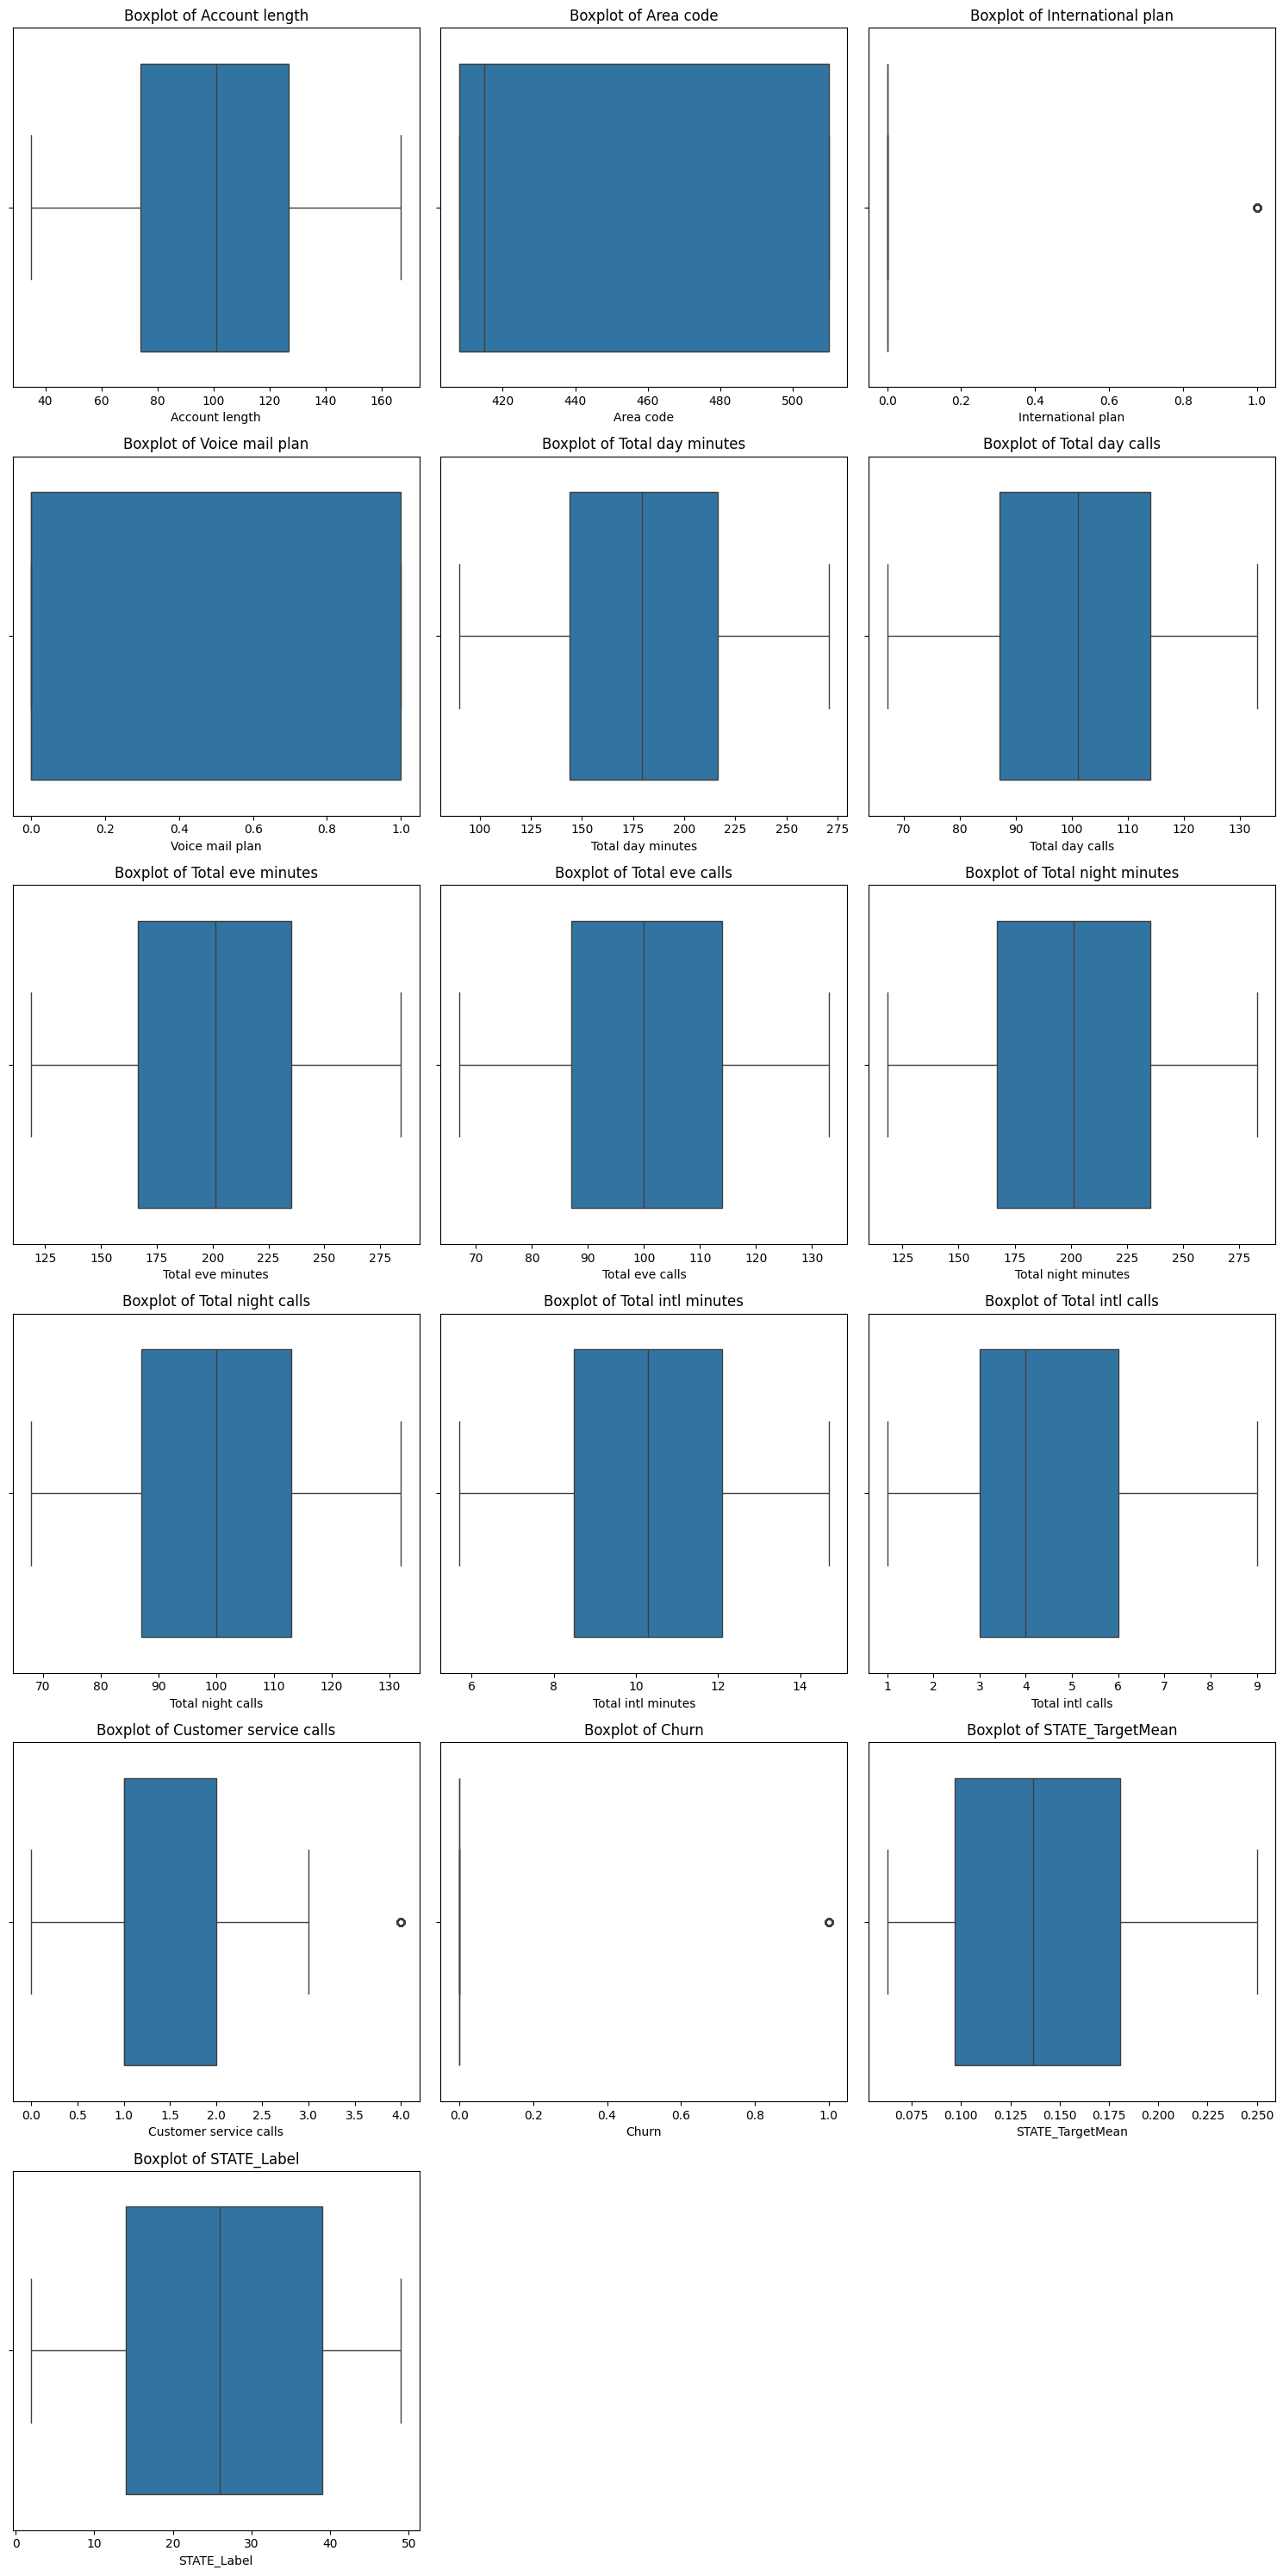

In [ ]:
# Nombre de colonnes par ligne
cols_per_row = 3
# Création des sous-graphiques
fig, axes = plt.subplots(
    nrows=(len(df_prep_clipped.columns) + cols_per_row - 1) // cols_per_row,
    ncols=cols_per_row,
    figsize=(15, 5 * ((len(df_prep_clipped.columns) + cols_per_row - 1) // cols_per_row))
)
# Applatir les axes pour les manipuler facilement
axes = axes.flatten()
# Parcourir les colonnes et tracer les boxplots
for i, col in enumerate(df_prep_clipped.columns):
    sns.boxplot(x=df_prep_clipped[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
# Supprimer les axes inutilisés si nécessaire
for ax in axes[len(df_prep_clipped.columns):]:
    ax.axis("off")
# Ajuster l'espacement
plt.tight_layout()
plt.show()

#### 6- Balance the dataset using SMOTE

In [ ]:
df_classif = df_prep_clipped.copy()

In [ ]:
X = df_classif.drop(columns=['Churn'])  # Features
y = df_classif['Churn']  # Target

In [ ]:
X

Account length  Area code  International plan  Voice mail plan  \
0                128        415                   0                1   
1                107        415                   0                1   
2                137        415                   0                0   
3                 84        408                   1                0   
4                 75        415                   1                0   
...              ...        ...                 ...              ...   
3328             114        415                   0                1   
3329             106        408                   0                1   
3330              60        415                   0                0   
3331             159        415                   0                0   
3332             167        510                   1                0   

      Total day minutes  Total day calls  Total eve minutes  Total eve calls  \
0                265.10              110              197.4               99   
1                161.60              123              195.5              103   
2                243.40              114              121.2              110   
3                270.74               71              118.8               88   
4                166.70              113              148.3              122   
...                 ...              ...                ...              ...   
3328             137.10               88              155.7              125   
3329              89.92              131              203.9              131   
3330             193.90              118              118.8              110   
3331             169.80              114              197.7              105   
3332             213.80              105              159.6               84   

      Total night minutes  Total night calls  Total intl minutes  \
0                   244.7                 91                10.0   
1                   254.4                103                13.7   
2                   162.6                104                12.2   
3                   196.9                 89                 6.6   
4                   186.9                121                10.1   
...                   ...                ...                 ...   
3328                247.6                 94                11.5   
3329                229.5                 73                 8.1   
3330                210.1                132                13.2   
3331                193.7                 82                11.6   
3332                139.2                132                 5.7   

      Total intl calls  Customer service calls  STATE_TargetMean  STATE_Label  
0                    3                       1          0.185714           16  
1                    3                       1          0.128205           35  
2                    5                       0          0.250000           31  
3                    7                       2          0.128205           35  
4                    3                       3          0.147541           36  
...                ...                     ...               ...          ...  
3328                 7                       2          0.089744           48  
3329                 3                       1          0.100000            2  
3330                 8                       3          0.109589           46  
3331                 4                       1          0.094340           49  
3332                 9                       2          0.162162            6  

[3333 rows x 15 columns]

In [ ]:
df_cluster = df_prep_clipped.copy()

In [ ]:
X_cluster = df_cluster.drop(columns=['Churn'])  # Features
y_cluster = df_cluster['Churn']

In [ ]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
X_cluster, y_cluster = smote.fit_resample(X_cluster, y_cluster)

In [ ]:
df_cluster_smote = pd.concat([X_cluster,y_cluster],axis = 1 )

In [ ]:
df_cluster_smote

Account length  Area code  International plan  Voice mail plan  \
0                128        415                   0                1   
1                107        415                   0                1   
2                137        415                   0                0   
3                 84        408                   1                0   
4                 75        415                   1                0   
...              ...        ...                 ...              ...   
5695             112        415                   0                0   
5696              95        408                   0                0   
5697              66        415                   0                0   
5698             129        414                   0                0   
5699              67        415                   0                0   

      Total day minutes  Total day calls  Total eve minutes  Total eve calls  \
0            265.100000              110         197.400000               99   
1            161.600000              123         195.500000              103   
2            243.400000              114         121.200000              110   
3            270.740000               71         118.800000               88   
4            166.700000              113         148.300000              122   
...                 ...              ...                ...              ...   
5695         250.195409               97         257.481886               81   
5696          89.920000              100         278.053885               99   
5697         270.462961              121         159.172157              111   
5698         264.280497              113         184.257170              102   
5699         224.555231               77         284.300000              105   

      Total night minutes  Total night calls  Total intl minutes  \
0              244.700000                 91           10.000000   
1              254.400000                103           13.700000   
2              162.600000                104           12.200000   
3              196.900000                 89            6.600000   
4              186.900000                121           10.100000   
...                   ...                ...                 ...   
5695           269.977974                124           12.105450   
5696           172.177309                 80            9.345382   
5697           257.774263                 72            8.870732   
5698           197.072825                 97           14.634034   
5699           212.110492                107            9.188815   

      Total intl calls  Customer service calls  STATE_TargetMean  STATE_Label  \
0                    3                       1          0.185714           16   
1                    3                       1          0.128205           35   
2                    5                       0          0.250000           31   
3                    7                       2          0.128205           35   
4                    3                       3          0.147541           36   
...                ...                     ...               ...          ...   
5695                 6                       1          0.155062            6   
5696                 3                       1          0.195453           33   
5697                 8                       0          0.211115           26   
5698                 5                       1          0.127781           15   
5699                 7                       1          0.215955           40   

      Churn  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
5695      1  
5696      1  
5697      1  
5698      1  
5699      1  

[5700 rows x 16 columns]

### 7-Selected Features

In [ ]:
# Calcul des F-scores et p-values
F_scores, p_values = f_classif(X, y)

# Afficher les résultats dans un DataFrame
scores_df = pd.DataFrame({'Feature': X.columns, 'F-Score': F_scores, 'P-Value': p_values})
scores_df = scores_df.sort_values(by='F-Score', ascending=False)
print(scores_df)
# Filtrer les variables avec une p-value < 0.05
significant_features = scores_df[scores_df['P-Value'] < 0.05]['Feature']
print("Significant Features:", significant_features.tolist())

                   Feature     F-Score        P-Value
3          Voice mail plan  519.909418  3.330141e-110
13        STATE_TargetMean  356.536078   3.488848e-77
4        Total day minutes  349.194428   1.117278e-75
11        Total intl calls  188.864456   2.644135e-42
12  Customer service calls  112.698771   4.396288e-26
6        Total eve minutes   82.381718   1.517495e-19
2       International plan   63.209535   2.223857e-15
10      Total intl minutes   53.126363   3.553589e-13
8      Total night minutes   20.050396   7.689955e-06
5          Total day calls    1.856419   1.730925e-01
0           Account length    0.909325   3.403340e-01
14             STATE_Label    0.334679   5.629400e-01
7          Total eve calls    0.181947   6.697212e-01
1                Area code    0.029312   8.640659e-01
9        Total night calls    0.009975   9.204470e-01
Significant Features: ['Voice mail plan', 'STATE_TargetMean', 'Total day minutes', 'Total intl calls', 'Customer service calls', 'Total 

**Initially, we used target encoding and label encoding for the "State" feature, which contains 51 unique categories. During feature selection, we observed that "STATE_TargetMean" was highly significant, as target encoding links the feature directly to the target (churn), making it a valuable predictor. On the other hand, "STATE_Label" showed no significant impact, as label encoding does not capture the relationship with churn effectively. Therefore, we decided to remove "STATE_Label", "STATE_TargetMean"  from the model.**

In [ ]:
X = X.drop(['STATE_TargetMean', 'STATE_Label', 'Account length',
            'Total night calls', 'Area code', 'Total day calls',
            'Total eve calls'], axis=1)

"We dropped  'Account length', and certain call-related features ('Total night calls', 'Area code', 'Total day calls', 'Total eve calls') due to their low significance in predicting churn, based on high p-values and low F-scores using selectKbest Algorithm."

In [ ]:
X

International plan  Voice mail plan  Total day minutes  \
0                      0                1         265.100000   
1                      0                1         161.600000   
2                      0                0         243.400000   
3                      1                0         270.740000   
4                      1                0         166.700000   
...                  ...              ...                ...   
5695                   0                0         250.195409   
5696                   0                0          89.920000   
5697                   0                0         270.462961   
5698                   0                0         264.280497   
5699                   0                0         224.555231   

      Total eve minutes  Total night minutes  Total intl minutes  \
0            197.400000           244.700000           10.000000   
1            195.500000           254.400000           13.700000   
2            121.200000           162.600000           12.200000   
3            118.800000           196.900000            6.600000   
4            148.300000           186.900000           10.100000   
...                 ...                  ...                 ...   
5695         257.481886           269.977974           12.105450   
5696         278.053885           172.177309            9.345382   
5697         159.172157           257.774263            8.870732   
5698         184.257170           197.072825           14.634034   
5699         284.300000           212.110492            9.188815   

      Total intl calls  Customer service calls  
0                    3                       1  
1                    3                       1  
2                    5                       0  
3                    7                       2  
4                    3                       3  
...                ...                     ...  
5695                 6                       1  
5696                 3                       1  
5697                 8                       0  
5698                 5                       1  
5699                 7                       1  

[5700 rows x 8 columns]

In [ ]:
X_cluster = X_cluster.drop(['STATE_TargetMean', 'STATE_Label', 'Account length',
                            'Total night calls', 'Area code', 'Total day calls',
                            'Total eve calls'], axis=1)

In [ ]:
X_cluster

International plan  Voice mail plan  Total day minutes  \
0                      0                1         265.100000   
1                      0                1         161.600000   
2                      0                0         243.400000   
3                      1                0         270.740000   
4                      1                0         166.700000   
...                  ...              ...                ...   
5695                   0                0         250.195409   
5696                   0                0          89.920000   
5697                   0                0         270.462961   
5698                   0                0         264.280497   
5699                   0                0         224.555231   

      Total eve minutes  Total night minutes  Total intl minutes  \
0            197.400000           244.700000           10.000000   
1            195.500000           254.400000           13.700000   
2            121.200000           162.600000           12.200000   
3            118.800000           196.900000            6.600000   
4            148.300000           186.900000           10.100000   
...                 ...                  ...                 ...   
5695         257.481886           269.977974           12.105450   
5696         278.053885           172.177309            9.345382   
5697         159.172157           257.774263            8.870732   
5698         184.257170           197.072825           14.634034   
5699         284.300000           212.110492            9.188815   

      Total intl calls  Customer service calls  
0                    3                       1  
1                    3                       1  
2                    5                       0  
3                    7                       2  
4                    3                       3  
...                ...                     ...  
5695                 6                       1  
5696                 3                       1  
5697                 8                       0  
5698                 5                       1  
5699                 7                       1  

[5700 rows x 8 columns]

#### 8- Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(4560, 8)

In [ ]:
X_test.shape

(1140, 8)

#### 9- Scaling

**a-Classification**

In [ ]:
# Initialiser le scaler
scaler = StandardScaler()
# Ajuster le scaler sur X_train et transformer X_train et X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Vérification des dimensions
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (4560, 8)
X_test_scaled shape: (1140, 8)


In [ ]:
# Afficher les 5 premières lignes de X_train après normalisation
print("X_train_scaled (après normalisation) :")
print(X_train_scaled[:5])

# Afficher les 5 premières lignes de X_test après normalisation
print("\nX_test_scaled (après normalisation) :")
print(X_test_scaled[:5])

X_train_scaled (après normalisation) :
[[-0.32638557 -0.47692374  0.57030337  0.14137783  1.05365847 -1.57168613
  -0.53956438 -0.47278106]
 [-0.32638557 -0.47692374 -0.36392783 -1.20805398 -0.13010499 -2.04862695
  -0.04341323  0.32040571]
 [-0.32638557 -0.47692374  1.48163319 -0.53333808  0.33794736 -0.4010132
   2.43734256  0.32040571]
 [-0.32638557 -0.47692374  1.46546927  0.3749919   0.84212963  1.183525
   1.44504025  0.32040571]
 [-0.32638557 -0.47692374  0.28578958 -0.15905392  0.76772272  1.08648116
   0.45273793 -0.47278106]]

X_test_scaled (après normalisation) :
[[-0.32638557 -0.47692374  0.16680273  0.26926515 -1.91870112  1.15988405
  -0.04341323 -1.26596782]
 [-0.32638557 -0.47692374  0.67208732 -1.41972956  0.14254687 -1.74511915
  -1.03571554 -1.26596782]
 [ 3.06386092 -0.47692374 -0.84393009 -1.76234338  1.02086672 -0.5271213
  -0.53956438  1.11359247]
 [-0.32638557  2.09677126 -0.67109724  1.38497184  1.46036414  0.37943543
   0.45273793  1.90677923]
 [-0.32638557 -0

**b-Clustring**

In [ ]:
X_cluster

International plan  Voice mail plan  Total day minutes  \
0                      0                1         265.100000   
1                      0                1         161.600000   
2                      0                0         243.400000   
3                      1                0         270.740000   
4                      1                0         166.700000   
...                  ...              ...                ...   
5695                   0                0         250.195409   
5696                   0                0          89.920000   
5697                   0                0         270.462961   
5698                   0                0         264.280497   
5699                   0                0         224.555231   

      Total eve minutes  Total night minutes  Total intl minutes  \
0            197.400000           244.700000           10.000000   
1            195.500000           254.400000           13.700000   
2            121.200000           162.600000           12.200000   
3            118.800000           196.900000            6.600000   
4            148.300000           186.900000           10.100000   
...                 ...                  ...                 ...   
5695         257.481886           269.977974           12.105450   
5696         278.053885           172.177309            9.345382   
5697         159.172157           257.774263            8.870732   
5698         184.257170           197.072825           14.634034   
5699         284.300000           212.110492            9.188815   

      Total intl calls  Customer service calls  
0                    3                       1  
1                    3                       1  
2                    5                       0  
3                    7                       2  
4                    3                       3  
...                ...                     ...  
5695                 6                       1  
5696                 3                       1  
5697                 8                       0  
5698                 5                       1  
5699                 7                       1  

[5700 rows x 8 columns]

In [ ]:
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

In [ ]:
X_cluster_scaled.shape

(5700, 8)

## Preparation for Cox proportional hazard model

In [ ]:
df_cox = df_classif.copy()

In [ ]:
df_cox = df_cox.drop(columns=["STATE_TargetMean", "Area code","STATE_Label"])

In [ ]:
X_cox = df_cox.drop(columns=["Account length", "Churn"])  # Drop time and event columns
y_cox = df_cox[["Account length", "Churn"]]

In [ ]:
scaler = StandardScaler()
X_cox_scaled = scaler.fit_transform(X_cox)

In [ ]:
X_scaled_df = pd.DataFrame(X_cox_scaled, columns=X_cox.columns)  # Convert scaled X back to DataFrame
scaled_data = pd.concat([X_scaled_df, y_cox], axis=1)

## 🤖 4. **Modeling: Predicting and Classifying Churn**
**Objective:**
Develop machine learning models to predict customer churn and classify customers into at-risk and not-at-risk categories.

**Actions:**
- Train multiple classification models: Logistic Regression, Support Vector Machine (SVM), Random Forest, Gradient Boosting, and Neural Networks.
- Fine-tune hyperparameters using Grid Search or Random Search.
- Evaluate the models’ performance in predicting churn and classify customers accurately.

**Tools:**
- Scikit-learn, XGBoost, TensorFlow or PyTorch for model training.

---

# Article 1

**1- Unsupervised algorithm-Dimensionality Reduction**

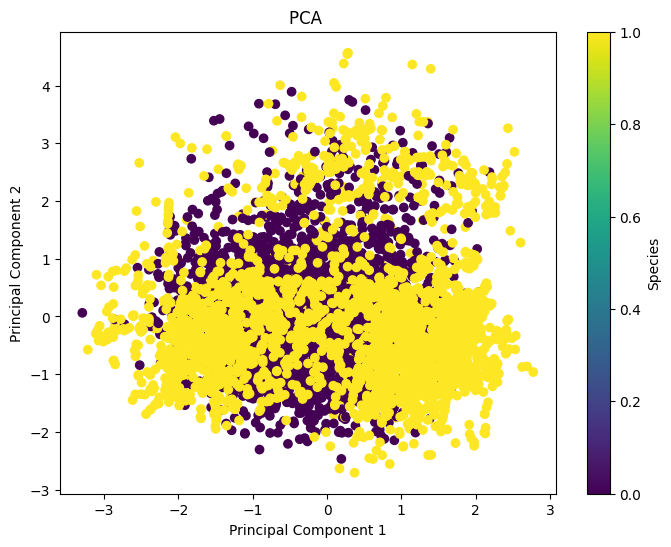

Explained variance ratio: [0.17340353 0.14493656]
Total explained variance: 0.31834009439643945


In [ ]:

pca = PCA(n_components=2)  # You can change this number based on your needs
X_pca = pca.fit_transform(X_cluster_scaled)

# 4. Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_cluster, cmap='viridis')
plt.title('PCA ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Species')
plt.show()

# 5. Explained Variance (optional, to check how much variance is explained by the components)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {np.sum(pca.explained_variance_ratio_)}")

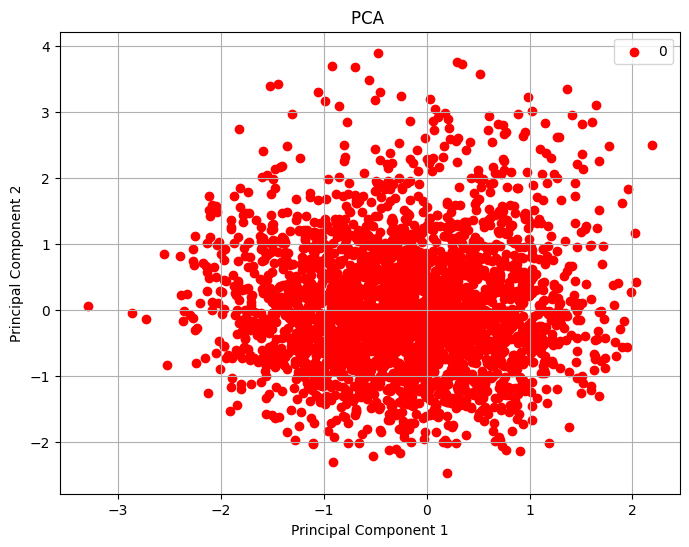

In [ ]:
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_cluster_scaled)

# Create a DataFrame with the PCA results
df_pca_results = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca_results['Churn'] = df_cluster_smote["Churn"]

# Plot the PCA results
plt.figure(figsize=(8, 6))
for i, color in zip([0], ['red']):
    subset = df_pca_results[df_pca_results['Churn'] == i]
    plt.scatter(subset['PC1'], subset['PC2'], label=i, color=color)

plt.title('PCA ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

## Detailed Profiling

In [ ]:
X_cluster_scaled_1=X_cluster_scaled[y_cluster == 1]

In [ ]:
X_cluster_scaled_df = pd.DataFrame(X_cluster_scaled_1, columns=X_cluster.columns)

In [ ]:
X_cluster_scaled_df.shape

(2850, 8)

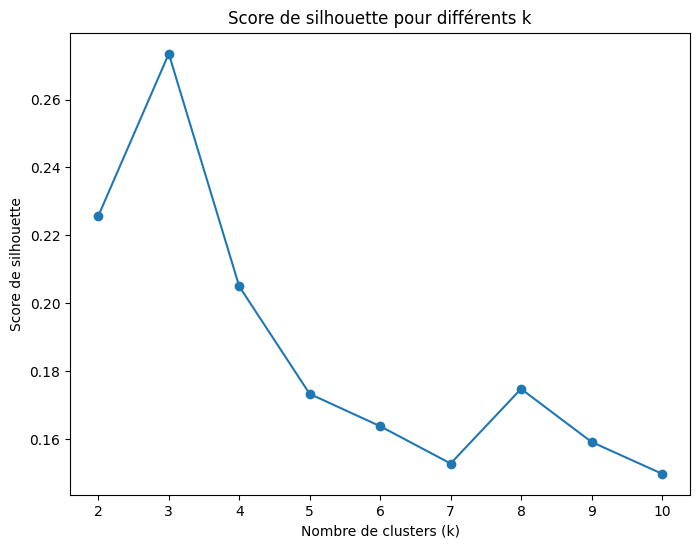

Le nombre optimal de clusters est: 3


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


silhouette_scores = []
k_range = range(2, 11)  # Tester de 2 à 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_cluster_scaled_df)
    silhouette_avg = silhouette_score(X_cluster_scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Afficher le score de silhouette
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette pour différents k')
plt.show()

# Choisir le k optimal (basé sur le score de silhouette)
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Le nombre optimal de clusters est: {optimal_k}")

Moyennes des composantes principales pour chaque cluster :
             PCA1      PCA2
Cluster                    
0       -1.051419 -0.497134
1        1.615851 -0.320277
2       -0.193400  2.924791


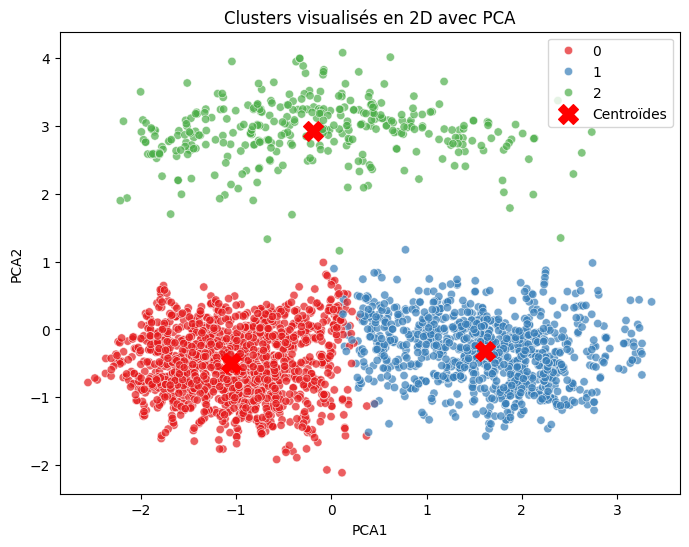

In [ ]:


# Étape 2 : Appliquer K-Means avec k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_cluster_scaled_df['Cluster'] = kmeans.fit_predict(X_cluster_scaled_df)

# Étape 3 : Réduction de la dimensionnalité à 2D avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled_df.drop(columns=['Cluster']))

# Créer un DataFrame pour la visualisation
X_vis = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
X_vis['Cluster'] = X_cluster_scaled_df['Cluster']

# Étape 4 : Calculer les moyennes des composantes principales pour chaque cluster
cluster_means_pca = X_vis.groupby('Cluster').mean()
print("Moyennes des composantes principales pour chaque cluster :")
print(cluster_means_pca)

# Étape 5 : Visualisation des clusters avec les centroïdes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_vis, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', alpha=0.7)
plt.scatter(cluster_means_pca['PCA1'], cluster_means_pca['PCA2'], c='red', marker='X', s=200, label='Centroïdes')
plt.title('Clusters visualisés en 2D avec PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


In [ ]:
# Calculer les moyennes des features d'origine pour chaque cluster
cluster_features_mean = X_cluster.groupby(X_cluster_scaled_df['Cluster']).mean()
print("Moyennes des features pour chaque cluster :")
print(cluster_features_mean)


Moyennes des features pour chaque cluster :
         International plan  Voice mail plan  Total day minutes  \
Cluster                                                           
0.0                0.090479         0.270763         180.692721   
1.0                0.120159         0.295929         178.038967   
2.0                0.096685         0.254144         181.779890   

         Total eve minutes  Total night minutes  Total intl minutes  \
Cluster                                                               
0.0             201.577583           201.552221           10.222147   
1.0             198.891261           200.003714           10.258391   
2.0             202.205801           202.354917           10.446961   

         Total intl calls  Customer service calls  
Cluster                                            
0.0              4.378123                1.518569  
1.0              4.347567                1.539225  
2.0              4.455801                1.472376  


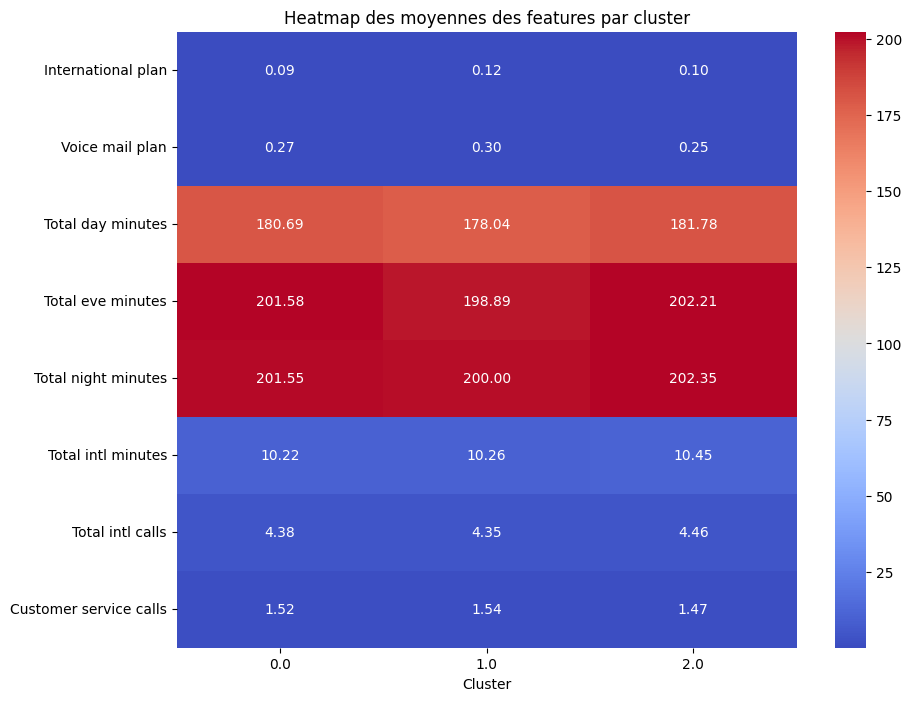

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_features_mean.T, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap des moyennes des features par cluster')
plt.show()

In [ ]:
# Compter les éléments dans chaque cluster
cluster_counts = X_cluster_scaled_df['Cluster'].value_counts()
print("Distribution des éléments dans chaque cluster :")
print(cluster_counts)


Distribution des éléments dans chaque cluster :
Cluster
0    1481
1    1007
2     362
Name: count, dtype: int64


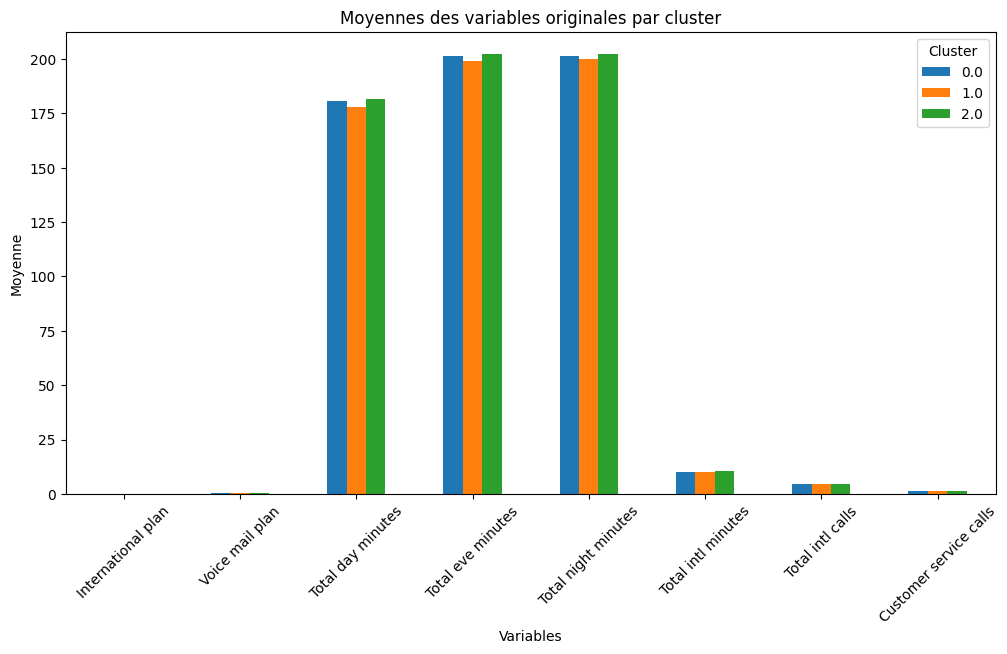

In [ ]:
cluster_features_mean.T.plot(kind='bar', figsize=(12, 6))
plt.title('Moyennes des variables originales par cluster')
plt.ylabel('Moyenne')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.legend(title='Cluster', loc='upper right')
plt.show()

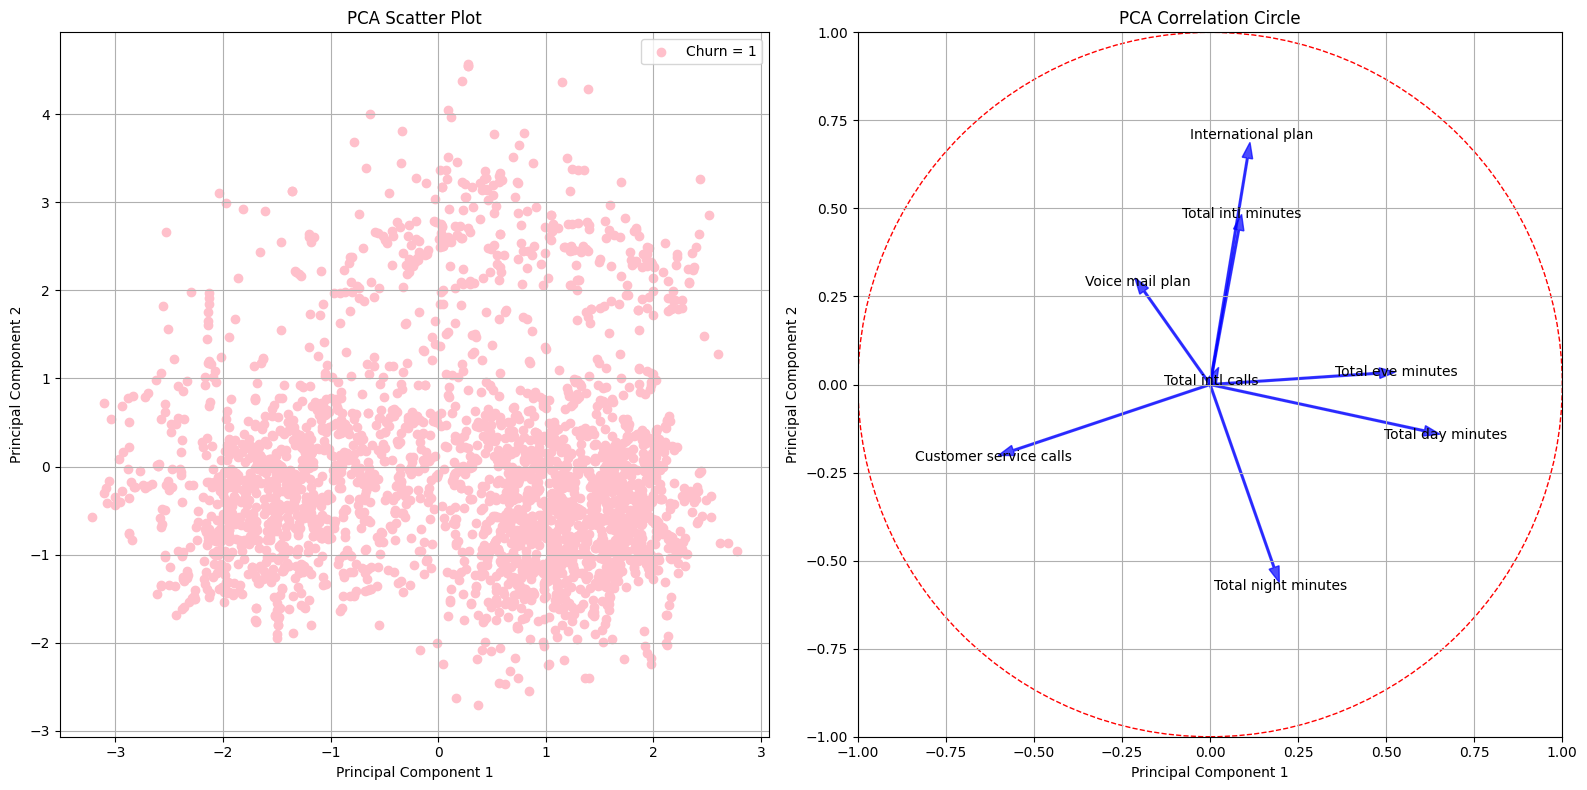

In [ ]:
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_cluster_scaled)

# Create a DataFrame with the PCA results
df_pca_results = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca_results['Churn'] = df_cluster_smote["Churn"]

# Create the figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the PCA results (Scatter plot of PC1 and PC2) in the first subplot
for i, color in zip([1], ['pink']):
    subset = df_pca_results[df_pca_results['Churn'] == i]
    axes[0].scatter(subset['PC1'], subset['PC2'], label=f'Churn = {i}', color=color)

# Set labels, title, and grid for the first plot (PCA scatter plot)
axes[0].set_title('PCA Scatter Plot')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend()
axes[0].grid(True)

# Correlation Circle Plot in the second subplot
loadings = pca.components_

# Plot the arrows (loadings) for the features in the second plot
for i in range(loadings.shape[1]):
    axes[1].arrow(0, 0, loadings[0, i], loadings[1, i], color='b', alpha=0.7, width=0.005, head_width=0.03)
    axes[1].text(loadings[0, i] * 1.1, loadings[1, i] * 1.1, X.columns[i], color='black', ha='center', va='center')

# Set the axis limits and add the unit circle
axes[1].set_xlim(-1, 1)
axes[1].set_ylim(-1, 1)
circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle='--')
axes[1].add_artist(circle)

# Set labels, title, and grid for the second plot (Correlation Circle)
axes[1].set_title('PCA Correlation Circle')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].grid(True)
axes[1].set_aspect('equal', adjustable='box')

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**Cluster 0: High Usage Customers**

Features: High Total Day Minutes, Total Evening Minutes, and moderate Total Night Minutes.


---


Description: This cluster represents customers with consistently high call usage during the day and evening. They are heavy users of regular call services but show no significant emphasis on international calls.


---


Behavior: Likely working professionals or individuals with high communication needs during peak hours.


---

---




**Cluster 1: International Call Users**

Features: High values for International Plan and Total International Minutes.


---


Description: These customers utilize international calling plans extensively, reflecting a strong focus on global communication. Their overall usage of local call minutes is moderate compared to Cluster 0.


---


Behavior: Likely customers with friends, family, or business partners abroad who require frequent international communication.


---

---




**Cluster 2: Customer Service-Oriented Users**

Features: Higher values for Customer Service Calls and lower overall call usage (day, evening, and international).


---


Description: This group stands out for its frequent interactions with customer service, potentially indicating dissatisfaction or service-related issues. Their total call usage remains relatively low.


---


Behavior: These users may require support for billing, technical issues, or plan adjustments, reflecting concerns or unique needs.



**2-Supervised algorithm**

### Model1 : Logistic Regression

In [ ]:
# 1. Création et entraînement du modèle
model_RegLog = LogisticRegression(random_state=42)
model_RegLog.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
# 2. Obtenir les coefficients et l'intercept
coefficients = model_RegLog.coef_[0]  # Coefficients de chaque caractéristique
intercept = model_RegLog.intercept_[0]  # Intercept du modèle

In [ ]:
coefficients

array([ 0.32178014, -0.67161496,  0.61973749,  0.22685659,  0.13134332,
        0.20778076, -0.42324295,  0.55960897])

In [ ]:
intercept

-0.04191240586756479

In [ ]:
# Récupérer les noms des caractéristiques réels (depuis X)
features_real = X.columns  # Cela donne les noms réels des colonnes

#Créer un DataFrame avec les caractéristiques et leurs coefficients
coeff_df = pd.DataFrame({'Feature': features_real, 'Coefficient': coefficients})
# Ajouter l'intercept au DataFrame
intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept]})
coeff_df = pd.concat([coeff_df, intercept_df], ignore_index=True)

# Trier les caractéristiques par l'importance (en valeur absolue des coefficients)
coeff_df['Absolute Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values('Absolute Coefficient', ascending=False)

coeff_df

Feature  Coefficient  Absolute Coefficient
1         Voice mail plan    -0.671615              0.671615
2       Total day minutes     0.619737              0.619737
7  Customer service calls     0.559609              0.559609
6        Total intl calls    -0.423243              0.423243
0      International plan     0.321780              0.321780
3       Total eve minutes     0.226857              0.226857
5      Total intl minutes     0.207781              0.207781
4     Total night minutes     0.131343              0.131343
8               Intercept    -0.041912              0.041912

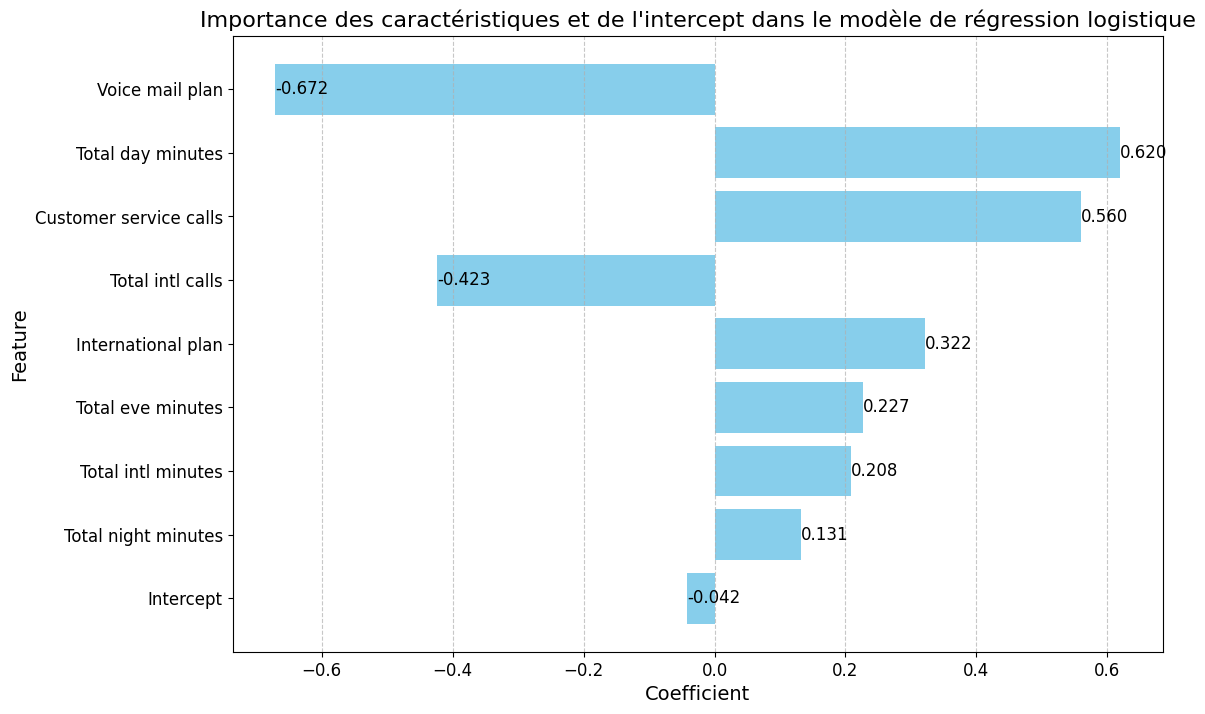

In [ ]:
# Visualisation des coefficients et de l'intercept
plt.figure(figsize=(12, 8))  # Augmenter la taille du graphique
bars = plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], color='skyblue')
# Ajouter des valeurs sur les barres
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.3f}',
             va='center', ha='left', color='black', fontsize=12)

# Ajouter des titres et labels plus détaillés
plt.xlabel("Coefficient", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.title("Importance des caractéristiques et de l'intercept dans le modèle de régression logistique", fontsize=16)
plt.gca().invert_yaxis()  # Inverser l'axe pour que la caractéristique la plus importante soit en haut

# Personnaliser les axes pour un meilleur rendu
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Afficher la grille pour mieux visualiser les valeurs
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.show()

## Model 2 : Decision Tree

In [ ]:
# Vérification des noms des colonnes
if isinstance(X_train, pd.DataFrame):
    feature_names = X.columns.tolist()
else:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]
# Optimisation des hyperparamètres avec GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Meilleur modèle
model_dt = grid_search.best_estimator_
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")

# Entraînement du modèle avec les meilleurs hyperparamètres
model_dt.fit(X_train, y_train)

Meilleurs hyperparamètres : {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
tree_depth = model_dt.get_depth()
print(f"La profondeur maximale de l'arbre est de {tree_depth}.")

La profondeur maximale de l'arbre est de 33.


In [ ]:
leaf_count = model_dt.get_n_leaves()
print(f"L'arbre contient {leaf_count} feuilles.")

L'arbre contient 524 feuilles.


Importance des caractéristiques :
                  Feature  Importance
2       Total day minutes    0.262546
3       Total eve minutes    0.194020
4     Total night minutes    0.137144
5      Total intl minutes    0.136373
7  Customer service calls    0.090008
6        Total intl calls    0.069878
1         Voice mail plan    0.069490
0      International plan    0.040541


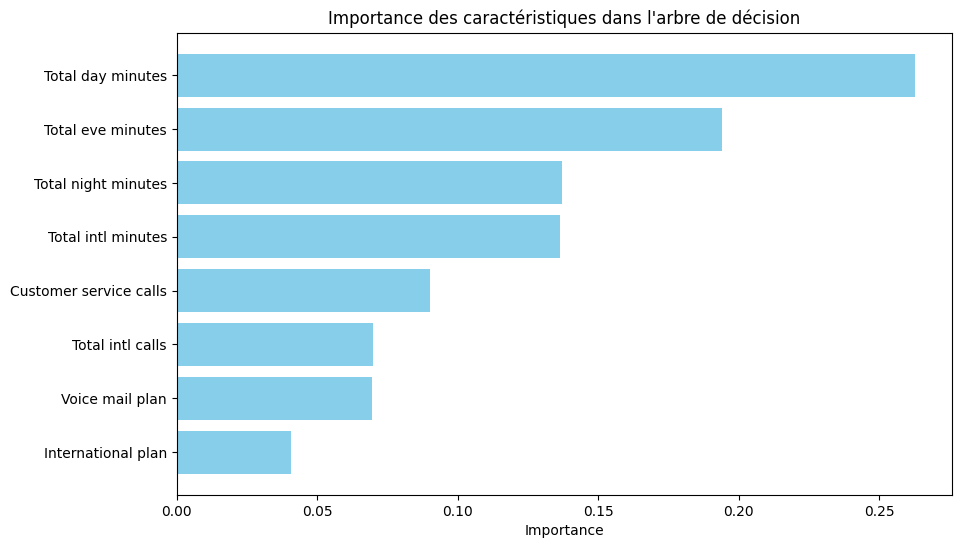

In [ ]:
# Importance des caractéristiques
importances = model_dt.feature_importances_

# Création d'un DataFrame pour un affichage clair
importance_df = pd.DataFrame({'Feature': features_real, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Affichage
print("Importance des caractéristiques :")
print(importance_df)

# Visualisation
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Importance des caractéristiques dans l'arbre de décision")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Exemple pour la première instance de X_test
instance = X_test_scaled[0]
# Obtenir le chemin pour cette instance
node_indicator = model_dt.decision_path([instance])
feature_indices = model_dt.tree_.feature

print("Chemin de décision :")
for node_id in node_indicator.indices:
    if feature_indices[node_id] != -2:
        feature = feature_names[feature_indices[node_id]]
        threshold = model_dt.tree_.threshold[node_id]
        print(f"Node {node_id}: {feature} <= {threshold:.2f}")


Chemin de décision :
Node 0: Total day minutes <= 246.51
Node 1: Customer service calls <= 3.50
Node 2: Total intl calls <= 3.50
Node 3: Voice mail plan <= 0.50
Node 4: International plan <= 0.50
Node 5: Total day minutes <= 217.75
Node 6: Customer service calls <= 1.50
Node 7: Total night minutes <= 243.06
Node 8: Total night minutes <= 136.56


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


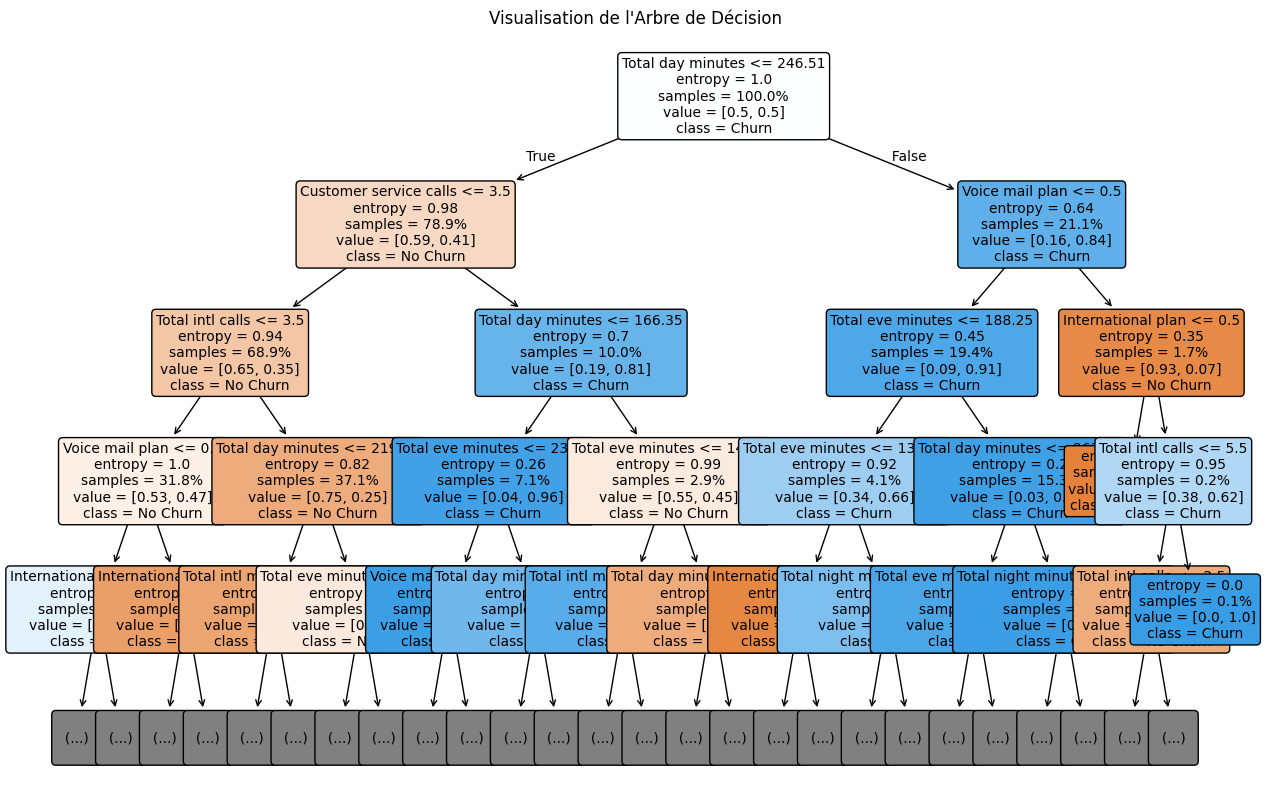

In [ ]:

# Visualisation de l'arbre de décision avec amélioration
plt.figure(figsize=(15, 10))  # Taille de la figure plus adaptée
tree.plot_tree(
    model_dt,
    filled=True,
    feature_names=X.columns,
    class_names=["No Churn", "Churn"],
    rounded=True,
    fontsize=10,  # Taille de la police réduite pour plus de lisibilité
    precision=2,  # Affichage avec précision pour les valeurs
    max_depth=4,  # Limiter la profondeur pour une vue plus claire
    proportion=True  # Les tailles des noeuds seront proportionnelles aux échantillons
)

# Ajouter un titre et afficher l'arbre
plt.title("Visualisation de l'Arbre de Décision")
plt.show()


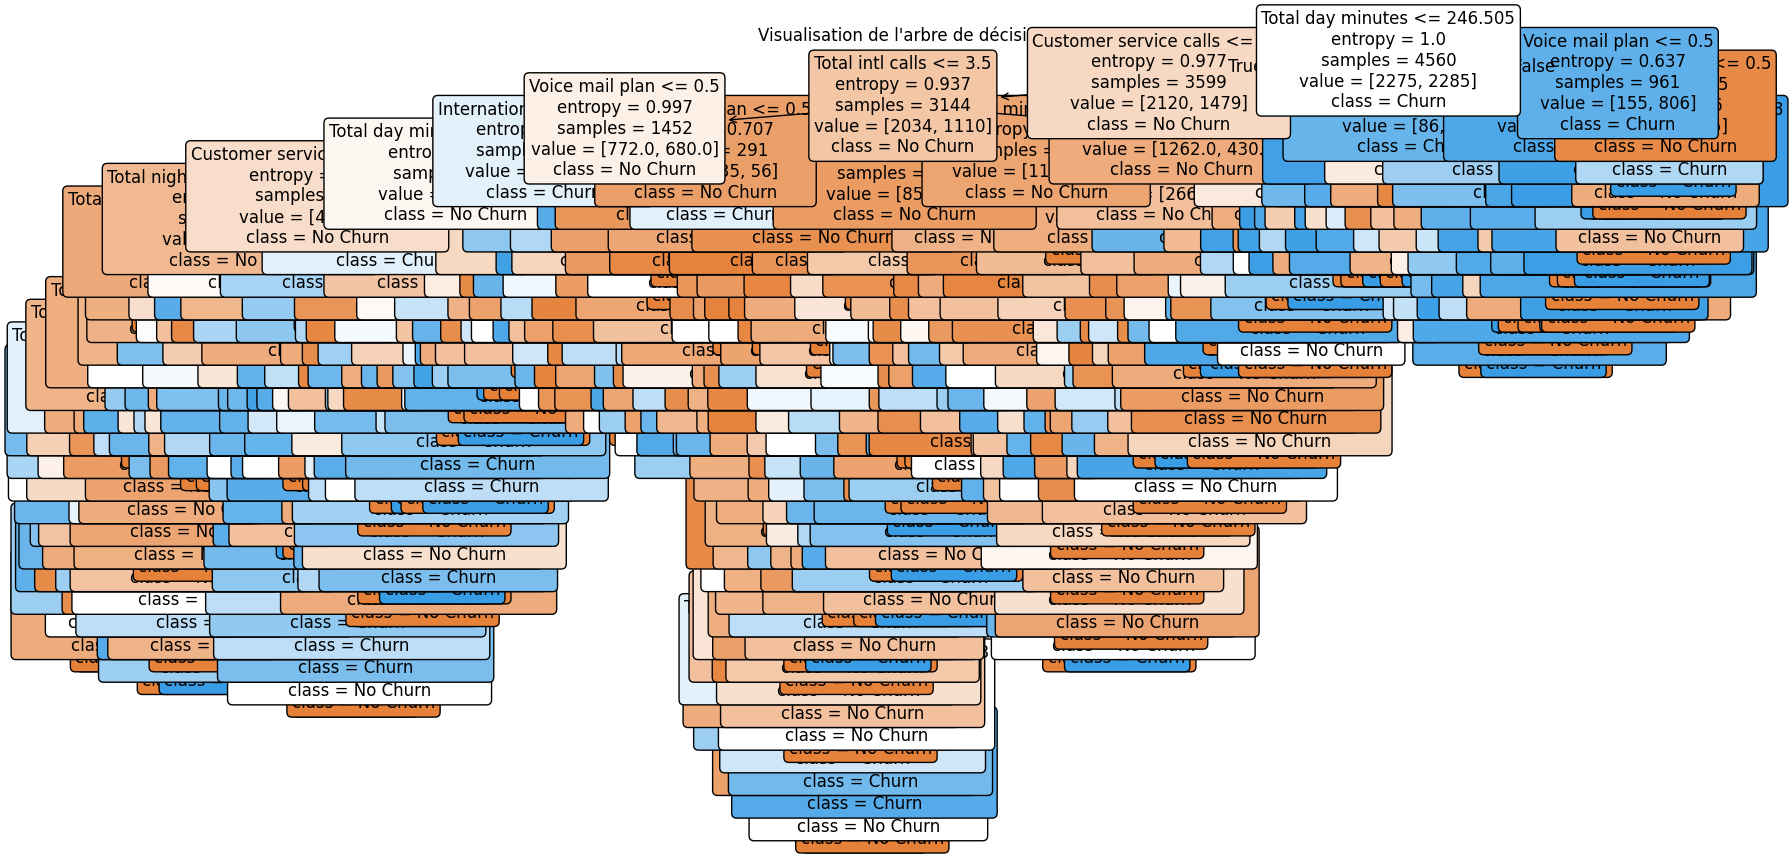

In [ ]:
# Visualisation de l'arbre de décision
plt.figure(figsize=(20, 10))
tree.plot_tree(model_dt, filled=True, feature_names=X.columns, class_names=["No Churn", "Churn"], rounded=True, fontsize=12)
plt.title("Visualisation de l'arbre de décision")
plt.show()


## Model 3 : Random Forest

In [ ]:
# Optimisation des hyperparamètres avec GridSearchCV
param_grid = {
    'n_estimators': [50, 100],  # Réduire le nombre d'arbres
    'max_depth': [None, 10],     # Limiter les valeurs de profondeur
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}


grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Utiliser tous les cœurs disponibles pour accélérer
)

# Entraînement avec GridSearchCV
grid_search.fit(X_train, y_train)

# Meilleur modèle
model_rf = grid_search.best_estimator_
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")

# Entraînement du modèle avec les meilleurs hyperparamètres
model_rf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Meilleurs hyperparamètres : {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestClassifier(random_state=42)

## Model 4 : SVM

In [ ]:
# 1. Tester différents kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_scores = {}

for kernel in kernels:
    model = SVC(kernel=kernel, probability=True, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')  # Validation croisée
    kernel_scores[kernel] = scores.mean()

In [ ]:
# 2. Afficher les précisions de chaque kernel
kernel_df = pd.DataFrame(list(kernel_scores.items()), columns=['Kernel', 'Accuracy'])
kernel_df = kernel_df.sort_values('Accuracy', ascending=False)
print("Précisions des kernels :\n", kernel_df)

Précisions des kernels :
     Kernel  Accuracy
2      rbf  0.835746
1     poly  0.819298
0   linear  0.722149
3  sigmoid  0.552851


In [ ]:
# 4. Sélectionner le meilleur kernel
best_kernel = kernel_df.iloc[0]['Kernel']
print(f"Meilleur kernel : {best_kernel} avec une précision moyenne de {kernel_df.iloc[0]['Accuracy']:.2f}")

Meilleur kernel : rbf avec une précision moyenne de 0.84


In [ ]:
# 5. Entraîner le modèle final avec le meilleur kernel
model_svm1 = SVC(kernel=best_kernel, probability=True, random_state=42)
model_svm1.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

## Modele5 : Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 1. Définition de la grille de paramètres pour l'optimisation
param_dist = {
    'n_estimators': randint(50, 200),  # Plage aléatoire pour n_estimators
    'learning_rate': uniform(0.01, 0.2),  # Plage aléatoire pour learning_rate
    'max_depth': [3, 5, 7],  # Profondeur des arbres
    'subsample': [0.8, 1.0]  # Fraction des échantillons utilisés
}

# 2. Initialisation du modèle Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# 3. Optimisation des hyperparamètres avec RandomizedSearchCV
random_search = RandomizedSearchCV(
    gb_model,
    param_distributions=param_dist,
    n_iter=20,  # Limiter à 20 itérations pour un compromis entre performance et temps
    cv=3,  # Utiliser 3 folds pour la validation croisée
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Utiliser tous les cœurs disponibles
)

# 4. Entraînement avec RandomizedSearchCV
random_search.fit(X_train, y_train)  # Utiliser X_train_scaled si les données sont déjà mises à l'échelle

# 5. Meilleur modèle trouvé
model_gb = random_search.best_estimator_

# 6. Afficher les meilleurs paramètres
print("Meilleurs hyperparamètres trouvés :")
print(random_search.best_params_)

# 7. Entraîner le modèle avec les meilleurs paramètres sur les données d'entraînement
model_gb.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Meilleurs hyperparamètres trouvés :
{'learning_rate': 0.1964068904468752, 'max_depth': 7, 'n_estimators': 181, 'subsample': 1.0}


GradientBoostingClassifier(learning_rate=0.1964068904468752, max_depth=7,
                           n_estimators=181, random_state=42)

## Article2

## Model 1 : Logistic Regression

In [ ]:
# Entraînement du modèle
model_lr2 = LogisticRegression(C=4534347.358, max_iter=10000, random_state=42)
model_lr2.fit(X_train_scaled, y_train)

LogisticRegression(C=4534347.358, max_iter=10000, random_state=42)

In [ ]:
# 2. Obtenir les coefficients et l'intercept
coefficients1 = model_lr2.coef_[0]  # Coefficients de chaque caractéristique
intercept1 = model_lr2.intercept_[0]  # Intercept du modèle

In [ ]:
# Récupérer les noms des caractéristiques réels (depuis X)
features_real = X.columns  # Cela donne les noms réels des colonnes

#Créer un DataFrame avec les caractéristiques et leurs coefficients
coeff_df = pd.DataFrame({'Feature': features_real, 'Coefficient': coefficients1})
# Ajouter l'intercept au DataFrame
intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept1]})
coeff_df = pd.concat([coeff_df, intercept_df], ignore_index=True)

# Trier les caractéristiques par l'importance (en valeur absolue des coefficients)
coeff_df['Absolute Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values('Absolute Coefficient', ascending=False)

coeff_df

Feature  Coefficient  Absolute Coefficient
1         Voice mail plan    -0.672828              0.672828
2       Total day minutes     0.620916              0.620916
7  Customer service calls     0.560863              0.560863
6        Total intl calls    -0.423945              0.423945
0      International plan     0.322474              0.322474
3       Total eve minutes     0.227236              0.227236
5      Total intl minutes     0.208148              0.208148
4     Total night minutes     0.131563              0.131563
8               Intercept    -0.042098              0.042098

"The analysis reveals that higher 'Total day minutes' and 'Customer service calls' significantly increase the likelihood of churn, while having a 'Voice mail plan'  tends to decrease churn risk. These insights can be used to identify and target customer segments at risk of churn and implement retention strategies accordingly."

In [ ]:
# 2. Obtenir les coefficients et l'intercept
coefficients1 = model_lr2.coef_[0]  # Coefficients de chaque caractéristique
intercept1 = model_lr2.intercept_[0]  # Intercept du modèle

In [ ]:
# Récupérer les noms des caractéristiques réels (depuis X)
features_real1 = X.columns  # Cela donne les noms réels des colonnes

#Créer un DataFrame avec les caractéristiques et leurs coefficients
coeff_df1 = pd.DataFrame({'Feature': features_real1, 'Coefficient': coefficients1})
# Ajouter l'intercept au DataFrame
intercept_df1 = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept1]})
coeff_df1 = pd.concat([coeff_df1, intercept_df1], ignore_index=True)

# Trier les caractéristiques par l'importance (en valeur absolue des coefficients)
coeff_df1['Absolute Coefficient'] = coeff_df1['Coefficient'].abs()
coeff_df1 = coeff_df1.sort_values('Absolute Coefficient', ascending=False)

coeff_df1

Feature  Coefficient  Absolute Coefficient
1         Voice mail plan    -0.672828              0.672828
2       Total day minutes     0.620916              0.620916
7  Customer service calls     0.560863              0.560863
6        Total intl calls    -0.423945              0.423945
0      International plan     0.322474              0.322474
3       Total eve minutes     0.227236              0.227236
5      Total intl minutes     0.208148              0.208148
4     Total night minutes     0.131563              0.131563
8               Intercept    -0.042098              0.042098

## Modele2 : Random Forest

In [ ]:
# Optimisation des hyperparamètres avec GridSearchCV
param_grid = {
     'n_estimators': list(range(14, 21)),  # Nombre d'arbres entre 14 et 20
    'max_depth': list(range(9, 21)),     # Profondeur entre 9 et 20
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}


grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Utiliser tous les cœurs disponibles pour accélérer
)

# Entraînement avec GridSearchCV
grid_search.fit(X_train, y_train)

# Meilleur modèle
model_rf3 = grid_search.best_estimator_
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")

# Entraînement du modèle avec les meilleurs hyperparamètres
model_rf3.fit(X_train, y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits
Meilleurs hyperparamètres : {'bootstrap': True, 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


RandomForestClassifier(max_depth=18, n_estimators=20, random_state=42)

In [ ]:
# Meilleur modèle trouvé
model_rf3 = grid_search.best_estimator_
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")

Meilleurs hyperparamètres : {'bootstrap': True, 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


## Model 3 : SVM

In [ ]:
# Entraînement du modèle avec SVM linéaire
model_svm = SVC(kernel='linear', probability=True, random_state=42)  # Activation de `probability` pour la courbe ROC
model_svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True, random_state=42)

## Model 4 : GBM

In [ ]:
# 1. Initialize the GBM model with selected hyperparameters
model_gb2 = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=10,
    min_samples_leaf=7,
    max_features='sqrt',
    max_leaf_nodes=5,
    subsample=0.9,
    random_state=42
)

# 2. Train the model on the training data
model_gb2.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, max_features='sqrt', max_leaf_nodes=5,
                           min_samples_leaf=7, n_estimators=150,
                           random_state=42, subsample=0.9)

# Model 5 : AdaBoost

In [ ]:
# Définir une grille de recherche pour AdaBoost (Article)
param_grid_ada = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.5, 0.8, 1.0]
}

# Recherche d'hyperparamètres avec GridSearchCV
grid_search_ada = GridSearchCV(
    AdaBoostClassifier(random_state=42),
    param_grid_ada,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Entraîner le modèle avec la recherche d'hyperparamètres
grid_search_ada.fit(X_train_scaled, y_train)

# Meilleurs hyperparamètres
model_ada1 = grid_search_ada.best_estimator_
print(f"Meilleurs hyperparamètres AdaBoost : {grid_search_ada.best_params_}")

# Réentraînement du modèle avec les meilleurs paramètres
model_ada1.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Meilleurs hyperparamètres AdaBoost : {'learning_rate': 1.0, 'n_estimators': 500}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=500, random_state=42)

In [ ]:
# Define the hyperparameter grid for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.5, 0.8, 1.0]
}

# Hyperparameter search using GridSearchCV with SAMME algorithm
grid_search_ada = GridSearchCV(
    AdaBoostClassifier(random_state=42, algorithm='SAMME'),  # Explicitly specify the SAMME algorithm
    param_grid_ada,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Train the model with hyperparameter search
grid_search_ada.fit(X_train_scaled, y_train)

# Best hyperparameters
model_ada2 = grid_search_ada.best_estimator_
print(f"Best hyperparameters AdaBoost: {grid_search_ada.best_params_}")

# Re-train the model with the best parameters
model_ada2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters AdaBoost: {'learning_rate': 1.0, 'n_estimators': 400}


AdaBoostClassifier(algorithm='SAMME', n_estimators=400, random_state=42)

# Model 6 : XGBoost

In [ ]:
# Manually set hyperparameters by choosing values from the specified range by Article
# Définir la grille des hyperparamètres pour RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 1000),  # Valeur mise à jour pour n_estimators
    'learning_rate': uniform(0.01, 0.29),  # Valeur mise à jour pour learning_rate (0.01 à 0.3)
    'max_depth': randint(3, 11),  # Valeur mise à jour pour max_depth (3 à 10)
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialisation et optimisation des hyperparamètres
random_search = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Entraîner le modèle avec RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Meilleur modèle trouvé
model_xgb2 = random_search.best_estimator_
print(f"Meilleurs hyperparamètres : {random_search.best_params_}")

# Entraînement final avec les meilleurs hyperparamètres
model_xgb2.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:45:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Meilleurs hyperparamètres : {'colsample_bytree': 0.8, 'learning_rate': 0.11525874601197757, 'max_depth': 7, 'n_estimators': 666, 'subsample': 0.8}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:45:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.11525874601197757, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=666, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Définir la grille des hyperparamètres pour RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialisation et optimisation des hyperparamètres
random_search = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Entraîner le modèle avec RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Meilleur modèle trouvé
model_xgb = random_search.best_estimator_
print(f"Meilleurs hyperparamètres : {random_search.best_params_}")

# Entraînement final avec les meilleurs hyperparamètres
model_xgb.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:45:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Meilleurs hyperparamètres : {'colsample_bytree': 1.0, 'learning_rate': 0.16600161732765825, 'max_depth': 7, 'n_estimators': 183, 'subsample': 0.8}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:45:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.16600161732765825, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=183, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# Model 7 : Neural Networks

**Model 1 (Article)**

In [ ]:
# Initialisation du modèle avec 5-9 couches cachées
model_nn2 = Sequential()

# Ajouter la première couche d'entrée et cachée (en fonction de la taille d'entrée)
model_nn2.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Première couche

# Ajouter les couches cachées supplémentaires (entre 4 et 8 couches cachées supplémentaires)
num_hidden_layers = 9  # Vous pouvez changer ce nombre entre 5 et 9 (ici, je choisis 6)

for _ in range(num_hidden_layers - 1):
    model_nn2.add(Dense(64, activation='relu'))  # Couches cachées supplémentaires

# Ajouter la couche de sortie pour la classification binaire
model_nn2.add(Dense(1, activation='sigmoid'))

# Ajouter du Dropout après chaque couche cachée
for _ in range(num_hidden_layers - 1):
    model_nn2.add(Dropout(0.2))  # Dropout pour éviter le surapprentissage

# Compilation du modèle
model_nn2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model_nn2.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=20, batch_size=32, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4977 - loss: 8.0808 - val_accuracy: 0.5228 - val_loss: 0.6931
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5005 - loss: 8.0356 - val_accuracy: 0.5228 - val_loss: 0.6931
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5070 - loss: 7.9331 - val_accuracy: 0.5228 - val_loss: 0.6931
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4945 - loss: 8.1334 - val_accuracy: 0.5228 - val_loss: 0.6931
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4944 - loss: 8.1348 - val_accuracy: 0.5228 - val_loss: 0.6931
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4903 - loss: 8.1994 - val_accuracy: 0.5228 - val_loss: 0.6931
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5020 - loss: 8.0132 - val_accuracy: 0.5228 - val_loss: 0.6931
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4879 - loss: 8.2393 - val_accuracy: 0.

**Model 2**

In [ ]:
model_nn = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),  # Couche d'entrée et cachée
    Dropout(0.2),  # Dropout pour éviter le surapprentissage
    Dense(32, activation='relu'),  # Deuxième couche cachée
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Couche de sortie pour classification binaire
])

# Compilation du modèle
model_nn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model_nn.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=20, batch_size=32, verbose=1)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6055 - loss: 0.6454 - val_accuracy: 0.7518 - val_loss: 0.5054
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7570 - loss: 0.5109 - val_accuracy: 0.7807 - val_loss: 0.4571
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7740 - loss: 0.4655 - val_accuracy: 0.8026 - val_loss: 0.4329
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7949 - loss: 0.4449 - val_accuracy: 0.8105 - val_loss: 0.4164
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7977 - loss: 0.4240 - val_accuracy: 0.8132 - val_loss: 0.4065
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8100 - loss: 0.4112 - val_accuracy: 0.8228 - val_loss: 0.3995
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8056 - loss: 0.4191 - val_accuracy: 0.8246 - val_loss: 0.3899
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8087 - loss: 0.4274 - val_accuracy: 0.

# Article 3

## Edited Nearest Neighbours

In [ ]:
# Step 1: Apply up-sampling to the minority class using RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
X_res_test, y_res_test = ros.fit_resample(X_test, y_test)

# Show class distribution after up-sampling
print("After up-sampling:", Counter(y_res))
enn = EditedNearestNeighbours()
# Step 2: Apply ENN for cleaning the dataset
X_res_clean, y_res_clean = enn.fit_resample(X_res, y_res)
X_res_clean_test, y_res_clean_test = enn.fit_resample(X_res_test, y_res_test)
# Show class distribution after applying ENN
print("After ENN cleaning:", Counter(y_res_clean))
print("After ENN cleaning:", Counter(y_res_clean_test))

After up-sampling: Counter({0: 2285, 1: 2285})
After ENN cleaning: Counter({0: 2285, 1: 1378})
After ENN cleaning: Counter({0: 575, 1: 283})


## Decision Tree Classifier

In [ ]:
# Vérification des noms des colonnes
if isinstance(X_res_clean, pd.DataFrame):
    feature_names = X.columns.tolist()
else:
    feature_names = [f"Feature {i}" for i in range(X_res_clean.shape[1])]
# Optimisation des hyperparamètres avec GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_res_clean, y_res_clean)

# Meilleur modèle
model_dt_enn = grid_search.best_estimator_
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")

# Entraînement du modèle avec les meilleurs hyperparamètres
model_dt_enn.fit(X_res_clean, y_res_clean)

Meilleurs hyperparamètres : {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2, random_state=42)

## Random Forest Classifier

In [ ]:
# Optimisation des hyperparamètres avec GridSearchCV
param_grid = {
    'n_estimators': [50, 100],  # Réduire le nombre d'arbres
    'max_depth': [None, 10],     # Limiter les valeurs de profondeur
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}


grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Utiliser tous les cœurs disponibles pour accélérer
)

# Entraînement avec GridSearchCV
grid_search.fit(X_res_clean, y_res_clean)

# Meilleur modèle
model_rf_res = grid_search.best_estimator_
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")

# Entraînement du modèle avec les meilleurs hyperparamètres
model_rf_res.fit(X_res_clean, y_res_clean)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Meilleurs hyperparamètres : {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestClassifier(n_estimators=50, random_state=42)

## Cox proportional hazard model

In [ ]:
cph = CoxPHFitter()
cph.fit(scaled_data, duration_col="Account length", event_col="Churn")


<lifelines.CoxPHFitter: fitted with 3333 total observations, 2850 right-censored observations>

## 🤖 4. **Evaluation: Predicting and Classifying Churn**
**Objective:**
Develop machine learning models to predict customer churn and classify customers into at-risk and not-at-risk categories.

**Actions:**
- Train multiple classification models: Logistic Regression, Support Vector Machine (SVM), Random Forest, Gradient Boosting, and Neural Networks.
- Fine-tune hyperparameters using Grid Search or Random Search.
- Evaluate the models’ performance in predicting churn and classify customers accurately.

**Tools:**
- Scikit-learn, XGBoost, TensorFlow or PyTorch for model training.

---

##  Article 1

## Model 1 : Logistic Regression

In [ ]:
#  Prédictions
y_pred_lr = model_RegLog.predict(X_test_scaled)
y_proba_lr = model_RegLog.predict_proba(X_test_scaled)[:, 1]  # Probabilités pour la classe positive (Churn=1)

**1- The Classification Report**

In [ ]:
# 1. Générer le rapport de classification sous forme de dictionnaire
report = classification_report(y_test, y_pred_lr, output_dict=True)

# 2. Convertir le rapport en DataFrame
report_test_df = pd.DataFrame(report).transpose()

# 3. Styliser le DataFrame avec Pandas
styled_report = report_test_df.style.background_gradient(cmap="Blues").format("{:.2f}").set_caption("Rapport de Classification")

# 4. Afficher le tableau stylisé
print("Rapport de Classification (détaillé) :")
display(styled_report)  # Utilise cette ligne dans Jupyter Notebook

Rapport de Classification (détaillé) :


**2- The Confusion Matrix**

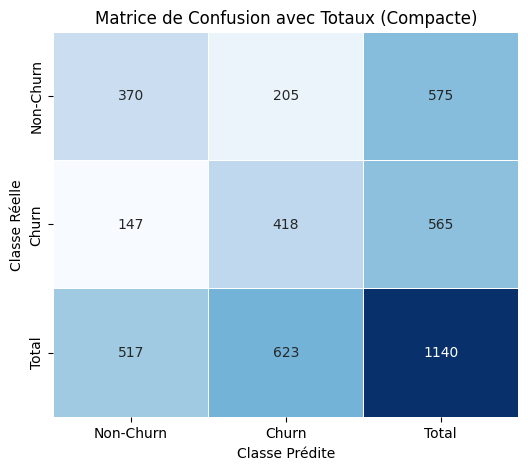

In [ ]:
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_lr)
labels = ["Non-Churn", "Churn"]

# Ajouter les totaux par ligne et colonne
conf_matrix_extended = np.c_[conf_matrix, conf_matrix.sum(axis=1)]  # Totaux par ligne
conf_matrix_extended = np.r_[conf_matrix_extended, [conf_matrix.sum(axis=0).tolist() + [conf_matrix.sum()]]]  # Totaux globaux

# Créer un DataFrame avec les totaux
labels_extended = labels + ["Total"]
conf_matrix_df = pd.DataFrame(conf_matrix_extended, index=labels_extended, columns=labels_extended)

# Visualisation avec Seaborn (en réduisant la taille)
plt.figure(figsize=(6, 5))  # Taille réduite de la figure
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=0.5,
            xticklabels=labels_extended, yticklabels=labels_extended, annot_kws={"size": 10})

# Ajouter un titre et des labels
plt.title("Matrice de Confusion avec Totaux (Compacte)")
plt.xlabel("Classe Prédite")
plt.ylabel("Classe Réelle")
plt.show()

The confusion matrix provides a detailed view of our churn prediction model's performance. It shows that the model correctly identified 370 non-churners (true negatives) and 418 churners (true positives). However, it misclassified 205 churners as non-churners (false negatives) and 147 non-churners as churners (false positives). These errors impact decision-making

**3-Courbe ROC**

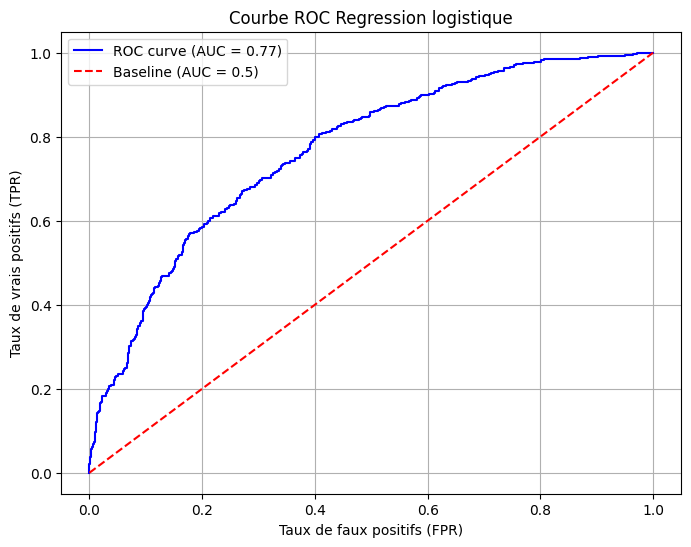

In [ ]:
# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)  # Calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Baseline (AUC = 0.5)")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC Regression logistique")
plt.legend()
plt.grid()
plt.show()

**4- Feature Importance - Logistic Regression**

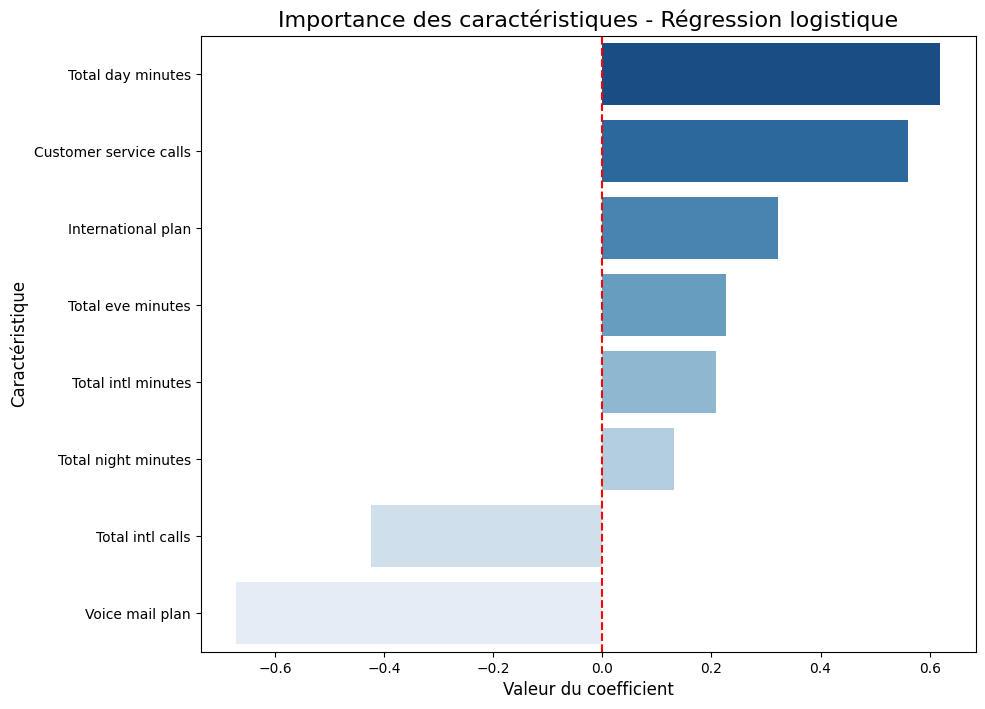

In [ ]:
# Préparer les noms des caractéristiques et les coefficients
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]
coef = model_RegLog.coef_[0]  # Coefficients du modèle
coef_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})
coef_importance = coef_importance.sort_values(by='Coefficient', ascending=False)

# Définir une palette avec le bon nombre de couleurs
num_features = len(coef_importance)
palette = sns.color_palette("Blues_r", n_colors=num_features)

# Visualisation des coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_importance, palette=palette, hue='Feature', legend=False)
plt.title("Importance des caractéristiques - Régression logistique", fontsize=16)
plt.xlabel("Valeur du coefficient", fontsize=12)
plt.ylabel("Caractéristique", fontsize=12)
plt.axvline(0, color='red', linestyle='--')  # Ligne pour zéro
plt.show()

The graph reveals that high usage (especially during the day), frequent customer service calls, and having an international plan are the most influential factors in predicting customer churn according to this logistic regression model.

## Model 2 : Decision Tree

In [ ]:
# Prédictions sur l'ensemble de test
y_pred_dt = model_dt.predict(X_test)
y_pred_proba_dt = model_dt.predict_proba(X_test)[:, 1]

**1- The Classification Report**

In [ ]:

# 1. Générer le rapport de classification sous forme de dictionnaire
report = classification_report(y_test, y_pred_dt, output_dict=True)

# 2. Convertir le rapport en DataFrame
report_df = pd.DataFrame(report).transpose()

# 3. Styliser le DataFrame avec Pandas
styled_report = report_df.style.background_gradient(cmap="Blues") \
    .format("{:.2f}") \
    .set_caption("Rapport de Classification") \
    .set_table_styles([{
        'selector': 'th',
        'props': [ ('font-weight', 'bold')]
    }])

# 4. Afficher le tableau stylisé
print("Rapport de Classification (détaillé) :")
display(styled_report)  # Utilise cette ligne dans Jupyter Notebook


Rapport de Classification (détaillé) :


**2-The Confusion Matrix**

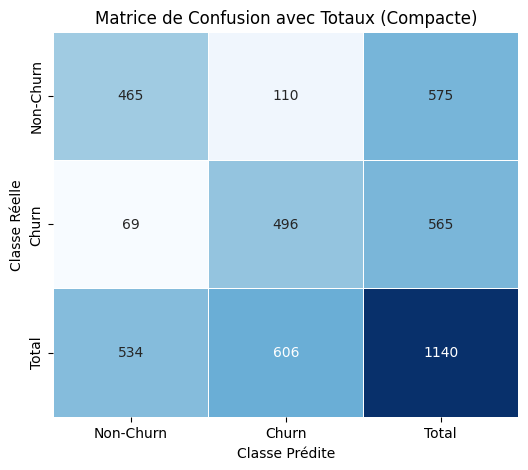

In [ ]:
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_dt)
labels = ["Non-Churn", "Churn"]

# Ajouter les totaux par ligne et colonne
conf_matrix_extended = np.c_[conf_matrix, conf_matrix.sum(axis=1)]  # Totaux par ligne
conf_matrix_extended = np.r_[conf_matrix_extended, [conf_matrix.sum(axis=0).tolist() + [conf_matrix.sum()]]]  # Totaux globaux

# Créer un DataFrame avec les totaux
labels_extended = labels + ["Total"]
conf_matrix_df = pd.DataFrame(conf_matrix_extended, index=labels_extended, columns=labels_extended)

# Visualisation avec Seaborn (en réduisant la taille)
plt.figure(figsize=(6, 5))  # Taille réduite de la figure
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=0.5,
            xticklabels=labels_extended, yticklabels=labels_extended, annot_kws={"size": 10})

# Ajouter un titre et des labels
plt.title("Matrice de Confusion avec Totaux (Compacte)")
plt.xlabel("Classe Prédite")
plt.ylabel("Classe Réelle")
plt.show()

The confusion matrix reveals that the model correctly predicted 496 out of 565 actual churn cases (true positives) and 465 out of 575 non-churn cases (true negatives). However, it also made 110 false positive predictions and 69 false negative predictions. While the model shows reasonable accuracy

**3-Courbe ROC**

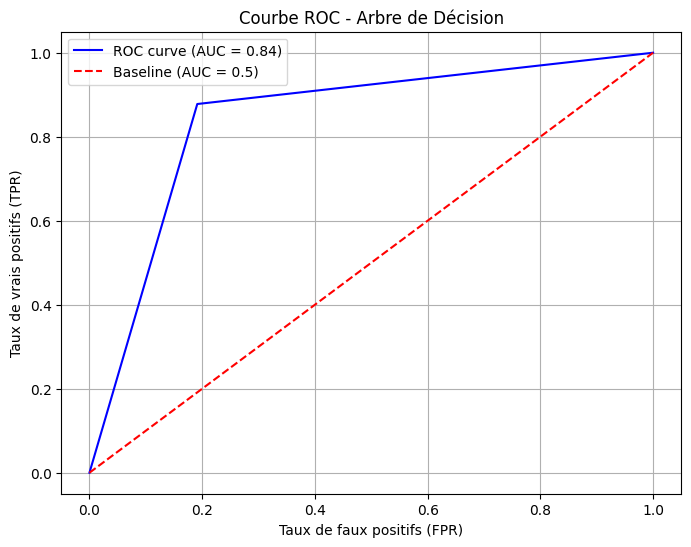

In [ ]:
# 3. Calcul des taux FPR et TPR pour la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_dt)
roc_auc = auc(fpr, tpr)

# 4. Visualisation de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Baseline (AUC = 0.5)")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - Arbre de Décision")
plt.legend()
plt.grid()
plt.show()

**4-Feature Importance - Logistic Regression**

<ipython-input-126-479fc39ae629>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues')  # Utilisation de la palette 'Blues'


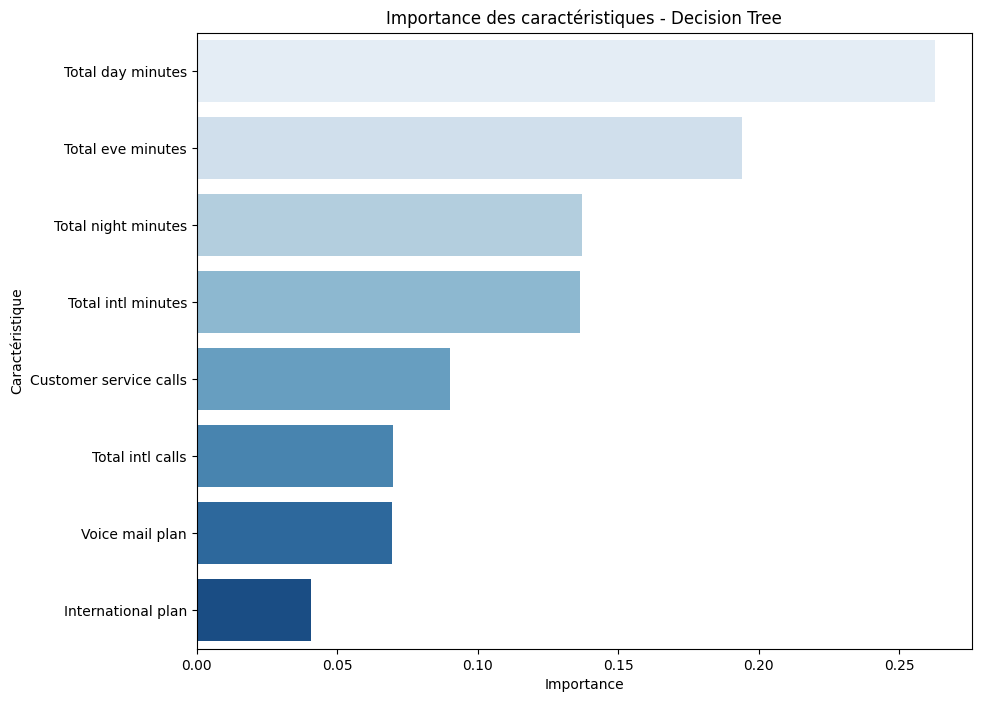

In [ ]:
importances = model_dt.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues')  # Utilisation de la palette 'Blues'
plt.title("Importance des caractéristiques - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Caractéristique")
plt.show()

This analysis reveals that "Total day minutes," "Total eve minutes," and "Total night minutes" are the most critical factors in predicting customer churn according to the decision tree model.

## Modele3 : Random Forest

In [ ]:
# Prédictions
y_pred_rf = model_rf.predict(X_test)
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

**1- The Classification Report**

In [ ]:

# 1. Générer le rapport de classification sous forme de dictionnaire
report1 = classification_report(y_test, y_pred_rf, output_dict=True)

# 2. Convertir le rapport en DataFrame
report_df1 = pd.DataFrame(report1).transpose()

# 3. Styliser le DataFrame avec Pandas
styled_report1 = report_df1.style.background_gradient(cmap="Blues") \
    .format("{:.2f}") \
    .set_caption("Rapport de Classification") \
    .set_table_styles([{
        'selector': 'th',
        'props': [ ('font-weight', 'bold')]
    }])

# 4. Afficher le tableau stylisé
print("Rapport de Classification (détaillé) :")
display(styled_report1)  # Utilise cette ligne dans Jupyter Notebook


Rapport de Classification (détaillé) :


**2-The Confusion Matrix**

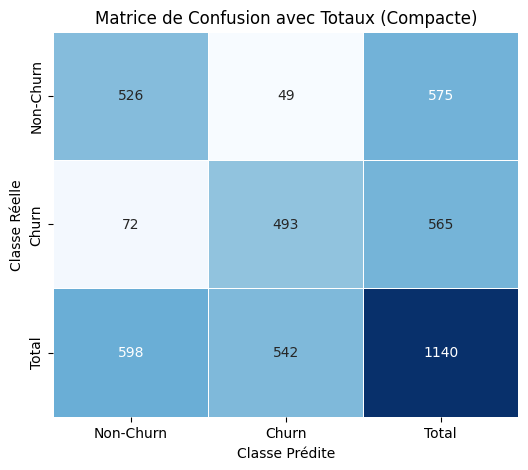

In [ ]:
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test,  y_pred_rf)
labels = ["Non-Churn", "Churn"]

# Ajouter les totaux par ligne et colonne
conf_matrix_extended = np.c_[conf_matrix, conf_matrix.sum(axis=1)]  # Totaux par ligne
conf_matrix_extended = np.r_[conf_matrix_extended, [conf_matrix.sum(axis=0).tolist() + [conf_matrix.sum()]]]  # Totaux globaux

# Créer un DataFrame avec les totaux
labels_extended = labels + ["Total"]
conf_matrix_df = pd.DataFrame(conf_matrix_extended, index=labels_extended, columns=labels_extended)

# Visualisation avec Seaborn (en réduisant la taille)
plt.figure(figsize=(6, 5))  # Taille réduite de la figure
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=0.5,
            xticklabels=labels_extended, yticklabels=labels_extended, annot_kws={"size": 10})

# Ajouter un titre et des labels
plt.title("Matrice de Confusion avec Totaux (Compacte)")
plt.xlabel("Classe Prédite")
plt.ylabel("Classe Réelle")
plt.show()


"The model demonstrates good performance with 542 out of 565 churn cases correctly predicted. However, it exhibits a relatively low false positive rate (49) but a slightly higher false negative rate (72). This suggests the model is effective at identifying customers who will churn but might miss some cases, potentially leading to churn-related revenue losses."

**4- Courbe ROC**

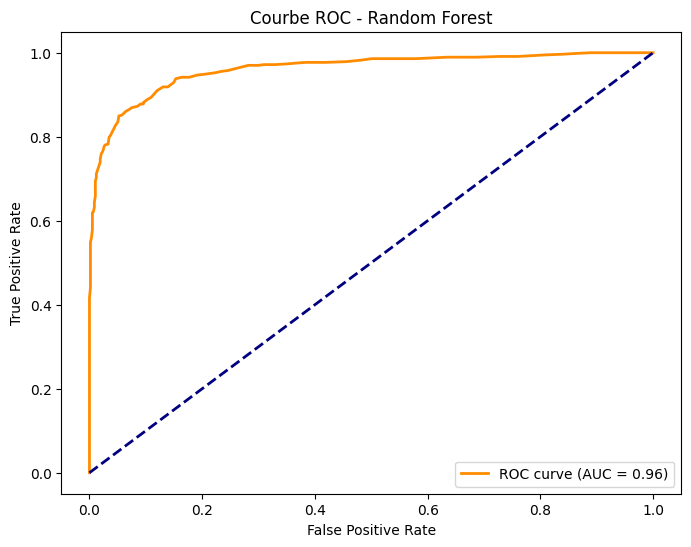

In [ ]:
# Visualisation 2 : Courbe ROC et AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne de hasard
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()

**5-Feature Importance - Random Forest**

<ipython-input-131-fd4f803fec12>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues')  # Utilisation de la palette 'Blues'


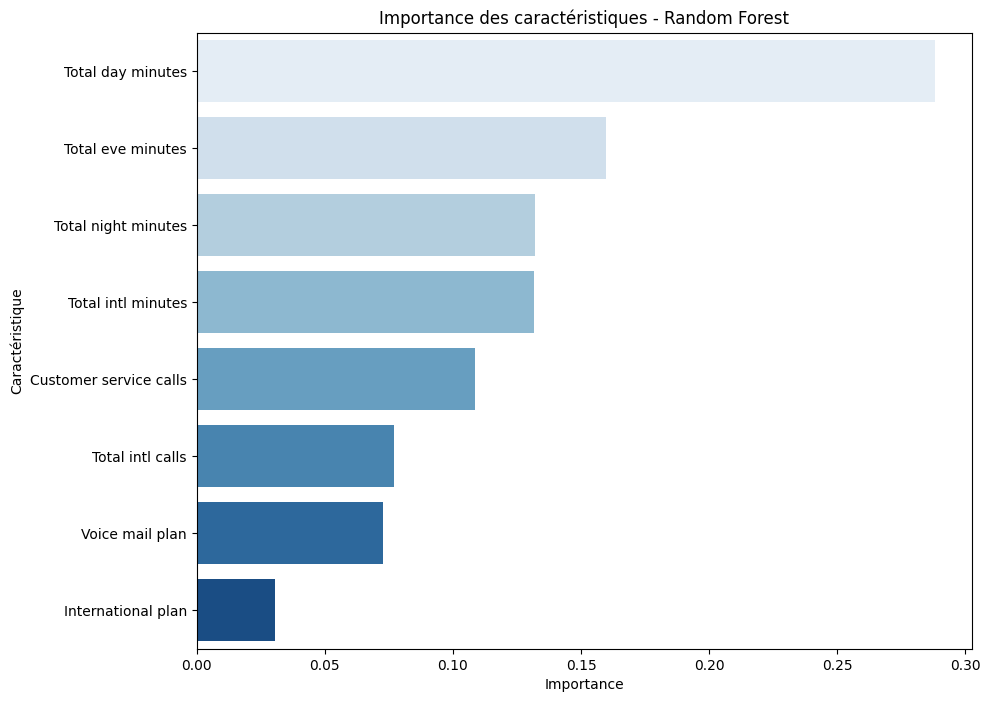

In [ ]:
importances = model_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues')  # Utilisation de la palette 'Blues'
plt.title("Importance des caractéristiques - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Caractéristique")
plt.show()

The chart highlights that "Total day minutes" "Total eve minutes" and "Customer service calls" are the most critical factors in predicting customer churn according to the Random Forest model.

## Model 4 : SVM

In [ ]:
# 1. Prédictions
y_pred_svm1 = model_svm1.predict(X_test_scaled)
y_proba_svm1 = model_svm1.predict_proba(X_test_scaled)[:, 1]  # Probabilités pour la classe positive

**1- The Classification Report**

In [ ]:
report = classification_report(y_test, y_pred_svm1, output_dict=True)
report_df = pd.DataFrame(report).transpose()

styled_report = (
    report_df.style
    .background_gradient(cmap="Blues")
    .format("{:.2f}")
    .set_caption(f"Rapport de Classification - SVM (Kernel: {best_kernel})")
)
display(styled_report)

**2-The Confusion Matrix**

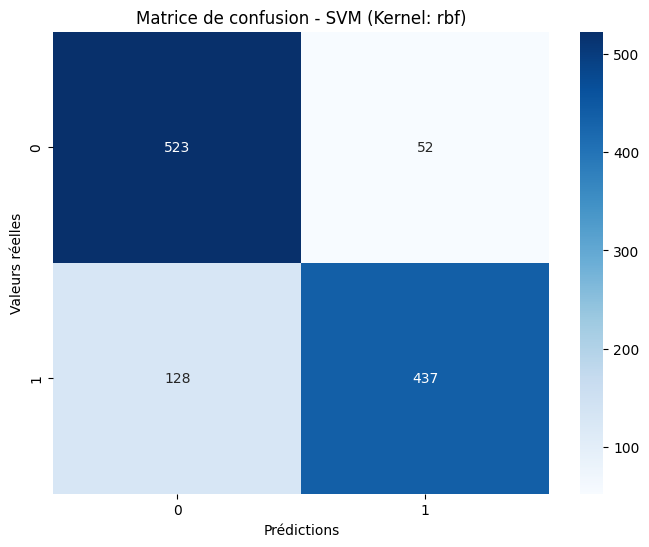

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_svm1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model_svm.classes_, yticklabels=model_svm.classes_)
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.title(f"Matrice de confusion - SVM (Kernel: {best_kernel})")
plt.show()

The SVM model with an RBF kernel exhibits strong performance, correctly classifying 437 out of 565 instances of class 1 and 523 out of 575 instances of class 0. While there are 52 false positives and 128 false negatives, the model demonstrates high overall accuracy in distinguishing between the two classes."


**4-Courbe ROC**

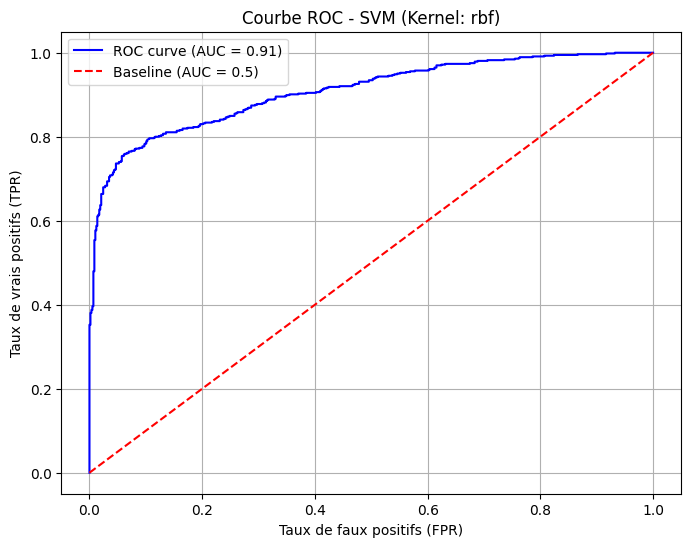

In [ ]:
# 7. Courbe ROC stylisée
fpr, tpr, thresholds = roc_curve(y_test, y_proba_svm1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Baseline (AUC = 0.5)")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title(f"Courbe ROC - SVM (Kernel: {best_kernel})")
plt.legend()
plt.grid()
plt.show()

## Modele5 : Gradient Boosting

In [ ]:
# 2. Prédictions et Évaluation
y_pred_gb = model_gb.predict(X_test)
y_proba_gb = model_gb.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

**1- The Classification Report**

In [ ]:
# Rapport de classification
print("Rapport de Classification :")
report = classification_report(y_test, y_pred_gb, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# 3. Affichage stylisé du rapport de classification
styled_report = report_df.style.background_gradient(cmap="Blues").format("{:.2f}").set_caption("Rapport de Classification")
display(styled_report)

Rapport de Classification :


**2-The Confusion Matrix**

In [ ]:
# 4. Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_gb)
# Affichage de la matrice de confusion avec des couleurs bleues
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Matrice de Confusion - Gradient Boosting")
plt.xlabel("Prédictions")
plt.ylabel("Vrais Labels")
plt.show()

The confusion matrix for the Gradient Boosting model shows strong performance in predicting "Churn" and "No Churn" cases. Out of 1,140 samples, 528 true negatives and 510 true positives were correctly identified, while there were 55 false negatives (churners predicted as "No Churn") and 47 false positives (non-churners predicted as "Churn"). Overall, the model demonstrates a good balance between precision and recall, making it reliable for churn prediction.

**3- Courbe ROC**

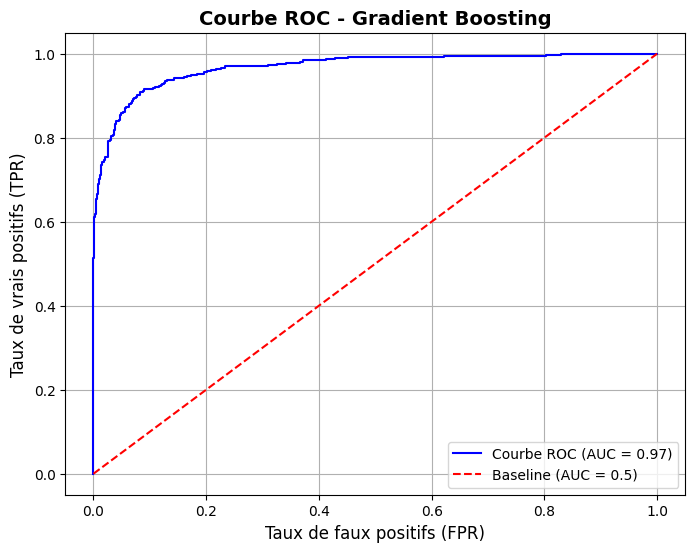

In [ ]:
# 1. Calcul des taux de faux positifs et vrais positifs
fpr, tpr, thresholds = roc_curve(y_test, y_proba_gb)  # Calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr)  # Calcul de l'AUC

# 2. Visualisation de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"Courbe ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Baseline (AUC = 0.5)")
plt.xlabel("Taux de faux positifs (FPR)", fontsize=12)
plt.ylabel("Taux de vrais positifs (TPR)", fontsize=12)
plt.title("Courbe ROC - Gradient Boosting", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
feature_importances = model_gb.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="Blues_d")  # Palette bleue
plt.title("Importance des caractéristiques - Gradient Boosting", fontsize=14, fontweight='bold')
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Caractéristiques", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

<ipython-input-140-2bfbbc8a3ec9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="Blues_d")  # Palette bleue



The chart highlights that "Total day minutes" is the most critical factor in predicting customer churn according to the Gradient Boosting model, followed by "Total eve minutes" and "Total night minutes." "Customer service calls" also plays a significant role.

## Plotting All ROC Curves

In [ ]:
# Compute ROC and AUC for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm1)
auc_svm = auc(fpr_svm, tpr_svm)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
auc_gb = auc(fpr_gb, tpr_gb)

# Plot all ROC curves on the same figure
plt.figure(figsize=(10, 8))

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='green')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='purple')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', color='orange')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})', color='red')

# Plot the diagonal line (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Baseline (AUC = 0.5)')

# Add labels, title, and legend
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Multiple Models')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()


**The ROC curves demonstrate that Gradient Boosting exhibits the highest performance with an AUC of 0.97, followed closely by Random Forest with an AUC of 0.96. SVM shows good performance with an AUC of 0.91, while Decision Tree and Logistic Regression have lower AUC scores of 0.84 and 0.77, respectively. This analysis suggests that Gradient Boosting and Random Forest are the most effective models for this classification task."**

# Article 2

## Model 1 : Logistic Regression

In [ ]:
# Prédictions
y_pred_lr2 = model_lr2.predict(X_test_scaled)
y_pred_proba_lr2 = model_lr2.predict_proba(X_test_scaled)[:, 1]  # Probabilités pour la classe positive

In [ ]:
# Prédictions sur l'ensemble d'entraînement
y_train_pred_lr2 = model_RegLog.predict(X_train_scaled)
y_train_proba_lr2 = model_RegLog.predict_proba(X_train_scaled)[:, 1]

**1- The Classification Report**

In [ ]:
# Rapport de classification
report_lr2 = classification_report(y_test, y_pred_lr2, output_dict=True)
report_lr_df2 = pd.DataFrame(report_lr2).transpose()

# Affichage stylisé
styled_report_lr2 = report_lr_df2.style.background_gradient(cmap="Blues").format("{:.2f}").set_caption("Rapport de Classification - AdaBoost")
display(styled_report_lr2)


**2-The Confusion Matrix**

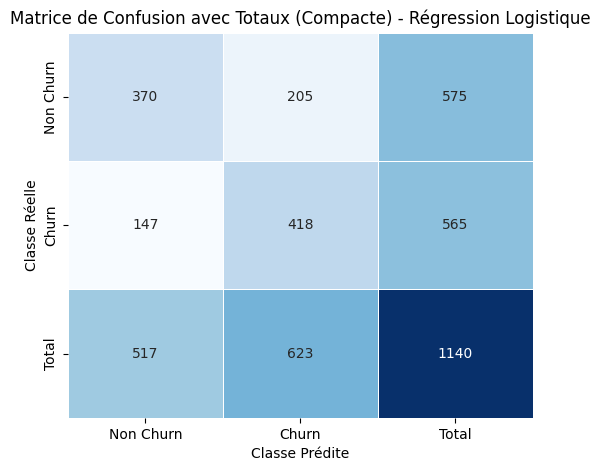

In [ ]:
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_lr2)
labels = ["Non Churn", "Churn"]

# Ajouter les totaux par ligne et colonne
conf_matrix_extended = np.c_[conf_matrix, conf_matrix.sum(axis=1)]  # Totaux par ligne
conf_matrix_extended = np.r_[conf_matrix_extended, [conf_matrix.sum(axis=0).tolist() + [conf_matrix.sum()]]]  # Totaux globaux

# Créer un DataFrame avec les totaux
labels_extended = labels + ["Total"]
conf_matrix_df = pd.DataFrame(conf_matrix_extended, index=labels_extended, columns=labels_extended)

# Visualisation avec Seaborn (en réduisant la taille)
plt.figure(figsize=(6, 5))  # Taille réduite de la figure
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=0.5,
            xticklabels=labels_extended, yticklabels=labels_extended, annot_kws={"size": 10})

# Ajouter un titre et des labels
plt.title("Matrice de Confusion avec Totaux (Compacte) - Régression Logistique")
plt.xlabel("Classe Prédite")
plt.ylabel("Classe Réelle")
plt.show()

"The Logistic Regression model correctly predicted 370 out of 575 non-churn cases and 418 out of 565 churn cases. While it exhibits 205 false positives and 147 false negatives, the model demonstrates moderate performance in predicting customer churn."

**4-Courbe ROC**

In [ ]:
# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba_lr2)  # Calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Baseline (AUC = 0.5)")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC")
plt.legend()
plt.grid()
plt.show()

## Model 2 : Random Forest

In [ ]:
# Prédictions
y_pred_rf3 = model_rf3.predict(X_test)
y_pred_proba_rf3 = model_rf3.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

**1- The Classification Report**

In [ ]:
# Classification Report
report_rf3 = classification_report(y_test, y_pred_rf3, output_dict=True)
report_rf_df3 = pd.DataFrame(report_rf3).transpose()

# Styled display
styled_report_rf3 = report_rf_df3.style.background_gradient(cmap="Blues").format("{:.2f}").set_caption("Classification Report - Random Forest")
display(styled_report_rf3)


**2-The Confusion Matrix**

In [ ]:
# Calculating the confusion matrix
conf_matrix_rf3 = confusion_matrix(y_test, y_pred_rf3)
labels = ["Non Churn", "Churn"]

# Adding row and column totals
conf_matrix_extended_rf3 = np.c_[conf_matrix_rf3, conf_matrix_rf3.sum(axis=1)]  # Row totals
conf_matrix_extended_rf3 = np.r_[conf_matrix_extended_rf3, [conf_matrix_rf3.sum(axis=0).tolist() + [conf_matrix_rf3.sum()]]]  # Global totals

# Creating a DataFrame with totals
labels_extended_rf3 = labels + ["Total"]
conf_matrix_df_rf3 = pd.DataFrame(conf_matrix_extended_rf3, index=labels_extended_rf3, columns=labels_extended_rf3)

# Visualization with Seaborn (smaller figure)
plt.figure(figsize=(6, 5))  # Reduced figure size
sns.heatmap(conf_matrix_df_rf3, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=0.5,
            xticklabels=labels_extended_rf3, yticklabels=labels_extended_rf3, annot_kws={"size": 10})

# Adding title and labels
plt.title("Confusion Matrix with Totals (Compact) - Random Forest")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()


"The Random Forest model demonstrates excellent performance with 519 true negatives and 491 true positives. With only 56 false positives and 74 false negatives, the model exhibits high accuracy in predicting customer churn."

**4-Courbe Roc**

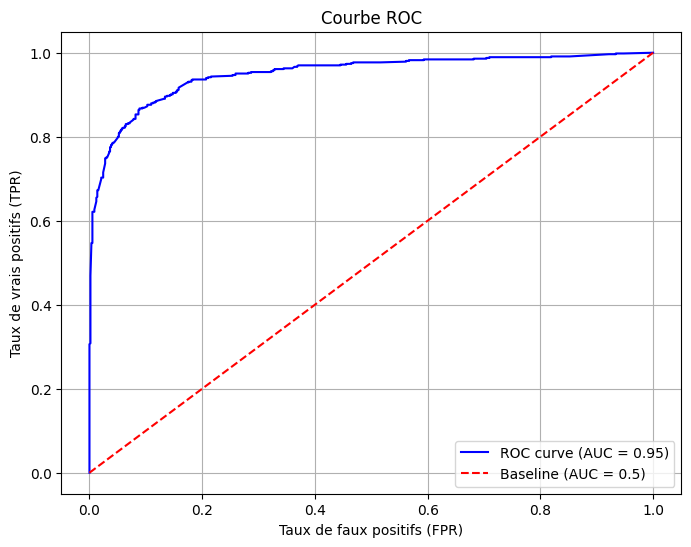

In [ ]:
# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba_rf3)  # Calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Baseline (AUC = 0.5)")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC")
plt.legend()
plt.grid()
plt.show()

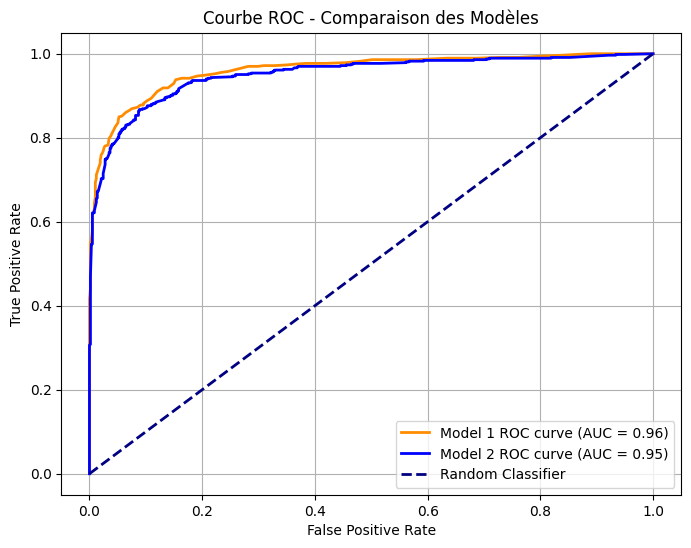

In [ ]:
# Calcul de la courbe ROC pour le premier modèle
fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc1 = auc(fpr1, tpr1)

# Calcul de la courbe ROC pour le deuxième modèle
fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba_rf3)
roc_auc2 = auc(fpr2, tpr2)

# Visualisation des deux courbes ROC sur une seule figure
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'Model 1 ROC curve (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='blue', lw=2, label=f'Model 2 ROC curve (AUC = {roc_auc2:.2f})')

# Ligne de hasard
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# Ajouter les labels, le titre et la légende
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC - Comparaison des Modèles')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


The ROC curves demonstrate that both models exhibit strong performance, with Model 1 slightly outperforming Model 2 (AUC: 0.96 vs. 0.95). Both models significantly outperform random guessing, indicating their effectiveness in distinguishing between classes.

## Model 3 : SVM

In [ ]:
# Prédictions
y_pred_svm = model_svm.predict(X_test_scaled)
y_pred_proba_svm = model_svm.predict_proba(X_test_scaled)[:, 1]  # Probabilités pour la classe positive

**1- The Classification Report**

In [ ]:
# Classification Report
report_svm3 = classification_report(y_test, y_pred_svm, output_dict=True)
report_svm_df3 = pd.DataFrame(report_svm3).transpose()

# Styled display
styled_report_svm3 = report_svm_df3.style.background_gradient(cmap="Blues").format("{:.2f}").set_caption("Classification Report - Random Forest")
display(styled_report_svm3)


**2-The Confusion Matrix**

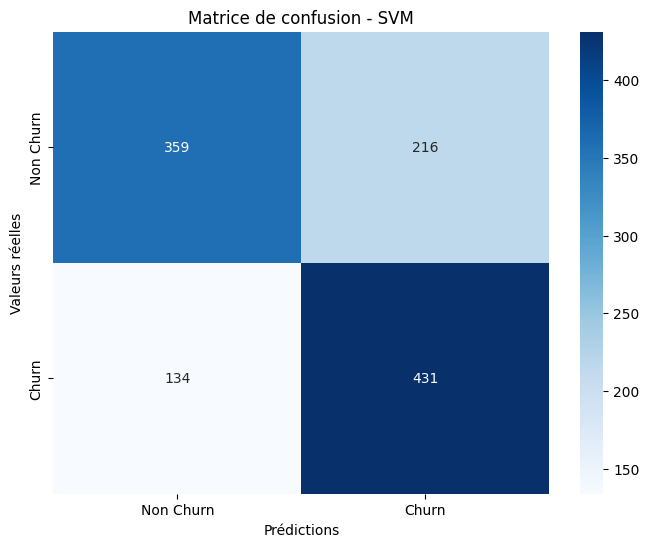

In [ ]:
# Visualisation 1 : Matrice de confusion
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Churn", "Churn"], yticklabels=["Non Churn", "Churn"])
plt.title("Matrice de confusion - SVM")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()

The SVM model demonstrates strong performance, correctly classifying 359 out of 575 non-churn cases and 431 out of 565 churn cases. With 216 false positives and 134 false negatives

**3-Courbe ROC**

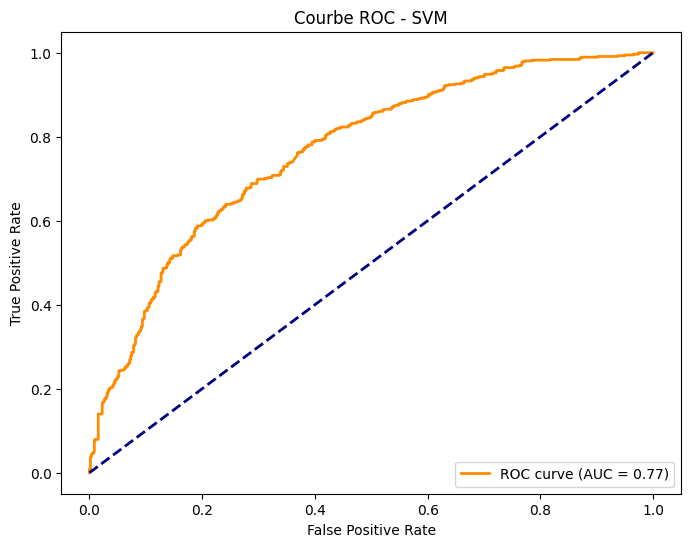

In [ ]:
# Visualisation 2 : Courbe ROC et AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne de hasard
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC - SVM')
plt.legend(loc="lower right")
plt.show()

**4- Courbe ROC - SVM Models**

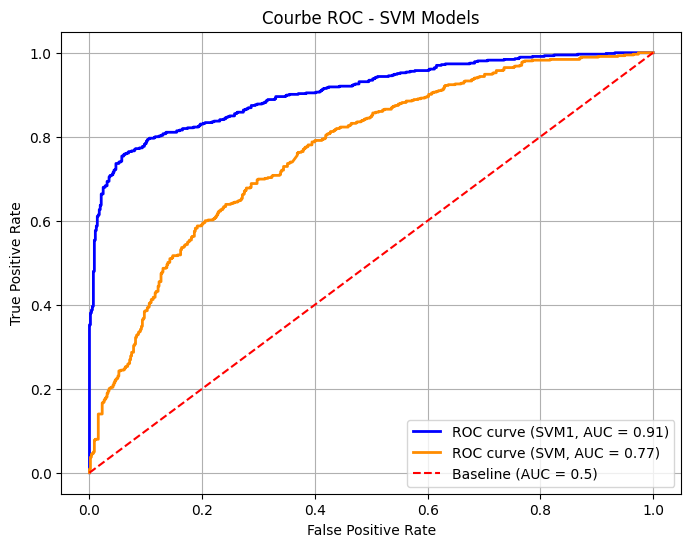

In [ ]:
# Courbe ROC pour le premier modèle (SVM1)
fpr1, tpr1, _ = roc_curve(y_test, y_proba_svm1)
roc_auc1 = auc(fpr1, tpr1)

# Courbe ROC pour le second modèle (SVM)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc2 = auc(fpr2, tpr2)

# Plotting both ROC curves on a single figure
plt.figure(figsize=(8, 6))

# Plot the first ROC curve (SVM1)
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'ROC curve (SVM1, AUC = {roc_auc1:.2f})')

# Plot the second ROC curve (SVM)
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label=f'ROC curve (SVM, AUC = {roc_auc2:.2f})')

# Baseline line (diagonal)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Baseline (AUC = 0.5)')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Courbe ROC - SVM Models')
plt.legend(loc="lower right")
plt.grid()

# Show the plot
plt.show()


The ROC curves demonstrate that Model 1 significantly outperforms Model 2. With an AUC of 0.91, Model 1 exhibits better overall performance in distinguishing between positive and negative instances compared to Model 2 (AUC = 0.77). Both models outperform random guessing, indicating their effectiveness as classification models.

# Model 4 : GBM

In [ ]:
# 3. Predict on the test set
y_pred_gb2 = model_gb2.predict(X_test_scaled)
y_pred_proba_gb2 = model_gb2.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (Churn = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


**1- The Classification Report**

In [ ]:
# 1. Generate the classification report
report_gb2 = classification_report(y_test, y_pred_gb2, output_dict=True)

# 2. Convert the report to a DataFrame
report_gb2_df = pd.DataFrame(report_gb2).transpose()

# 3. Create a styled display
styled_report_gb2 = (
    report_gb2_df.style
    .background_gradient(cmap="Blues")
    .format("{:.2f}")
    .set_caption("Classification Report - Gradient Boosting")
)

# 4. Display the styled report
display(styled_report_gb2)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**2-The Confusion Matrix**

In [ ]:
# 1. Calculate the confusion matrix
cm_gb2 = confusion_matrix(y_test, y_pred_gb2)

# 2. Define class labels
labels = ["Non Churn", "Churn"]

# 3. Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb2, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)

# 4. Add title and labels
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# 5. Show the plot
plt.show()

"The Gradient Boosting model demonstrates exceptional performance, achieving perfect classification with 575 true negatives and 565 true positives. With no false positives and no false negatives, the model exhibits 100% accuracy in predicting customer churn."

**3- Courbe ROC**

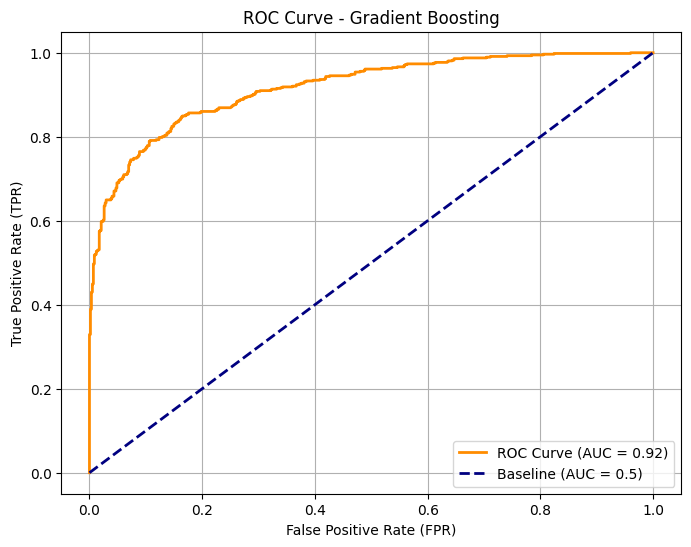

In [ ]:
# 1. Compute the ROC curve
fpr_gb2, tpr_gb2, _ = roc_curve(y_test, y_pred_proba_gb2)
roc_auc_gb2 = auc(fpr_gb2, tpr_gb2)

# 2. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb2, tpr_gb2, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc_gb2:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Baseline (AUC = 0.5)")

# 3. Customize the plot
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Gradient Boosting")
plt.legend(loc="lower right")
plt.grid()

# 4. Show the plot
plt.show()

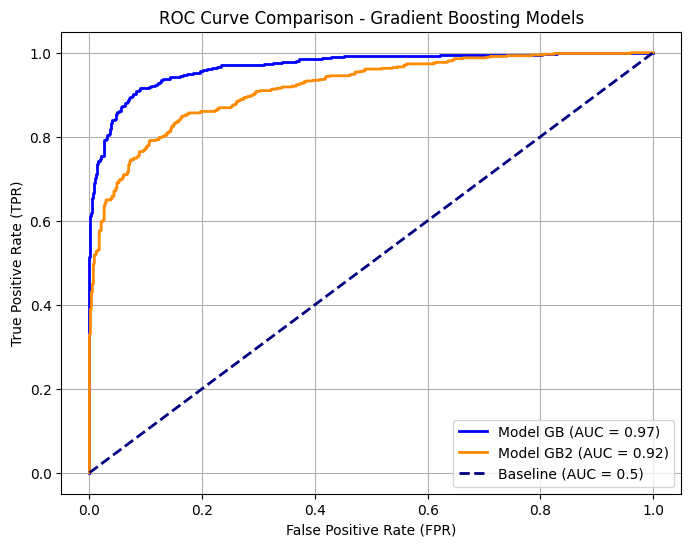

In [ ]:

# 1. Compute the ROC curve for model_gb
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# 2. Compute the ROC curve for model_gb2
fpr_gb2, tpr_gb2, _ = roc_curve(y_test, y_pred_proba_gb2)
roc_auc_gb2 = auc(fpr_gb2, tpr_gb2)

# 3. Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color="blue", lw=2, label=f"Model GB (AUC = {roc_auc_gb:.2f})")
plt.plot(fpr_gb2, tpr_gb2, color="darkorange", lw=2, label=f"Model GB2 (AUC = {roc_auc_gb2:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Baseline (AUC = 0.5)")

# 4. Customize the plot
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison - Gradient Boosting Models")
plt.legend(loc="lower right")
plt.grid()

# 5. Show the plot
plt.show()

The ROC curves show that both Gradient Boosting models exhibit excellent performance, with Model GB demonstrating slightly superior performance compared to Model GB2. Both models significantly outperform random guessing, indicating their effectiveness in predicting the target variable.


# Model 5 : AdaBoost

In [ ]:
# Prédictions (Article)
y_pred_ada = model_ada1.predict(X_test_scaled)
y_proba_ada = model_ada1.predict_proba(X_test_scaled)[:, 1]  # Probabilités pour la classe positive

**1- The Classification Report**

In [ ]:
# 1. Generate the classification report
report_ada = classification_report(y_test, y_pred_ada, output_dict=True)

# 2. Convert the report to a DataFrame
report_ada_df = pd.DataFrame(report_ada).transpose()

# 3. Create a styled display
styled_report_ada = (
    report_ada_df.style
    .background_gradient(cmap="Blues")
    .format("{:.2f}")
    .set_caption("Classification Report - AdaBoost")
)

# 4. Display the styled report
display(styled_report_ada)

**2-The Confusion Matrix**

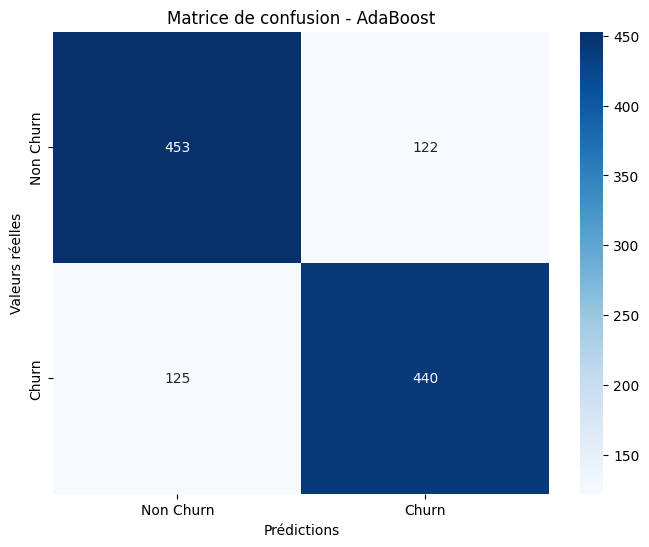

In [ ]:
# 1. Generate the confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)

# 2. Create a heatmap to display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Churn", "Churn"], yticklabels=["Non Churn", "Churn"])

# 3. Set the title and labels
plt.title("Matrice de confusion - AdaBoost")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")

# 4. Show the plot
plt.show()

"The AdaBoost model demonstrates strong performance, correctly classifying 475 out of 575 non-churn cases and 381 out of 565 churn cases. With 100 false positives and 184 false negatives

**3-Courbe ROC**

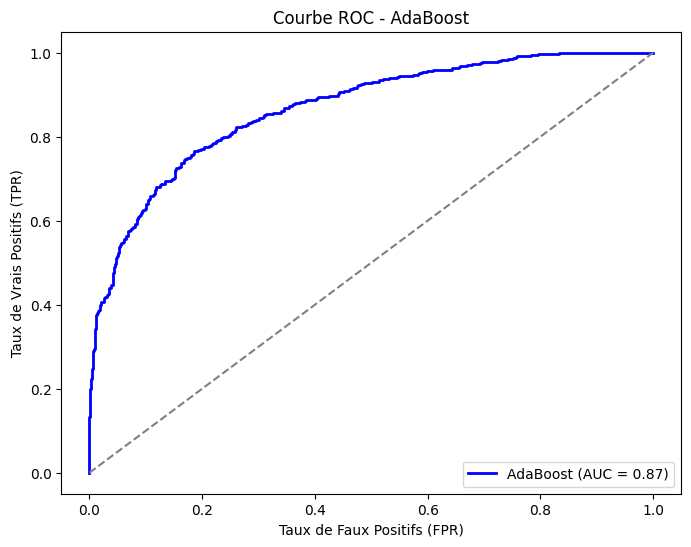

In [ ]:
# 1. Compute ROC curve
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_proba_ada)

# 2. Compute the area under the ROC curve (AUC)
roc_auc_ada = auc(fpr_ada, tpr_ada)

# 3. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, color='b', lw=2, label=f'AdaBoost (AUC = {roc_auc_ada:.2f})')

# 4. Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# 5. Add labels and title
plt.title("Courbe ROC - AdaBoost")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.legend(loc="lower right")

# 6. Display the plot
plt.show()

## AdaBooste 2

In [ ]:
# Prédictions
y_pred_ada2 = model_ada2.predict(X_test_scaled)
y_proba_ada2 = model_ada2.predict_proba(X_test_scaled)[:, 1]  # Probabilités pour la classe positive

**1- The Classification Report**

In [ ]:
# 1. Generate the classification report
report_ada2 = classification_report(y_test, y_pred_ada2, output_dict=True)

# 2. Convert the report to a DataFrame
report_ada2_df = pd.DataFrame(report_ada2).transpose()

# 3. Create a styled display
styled_report_ada2 = (
    report_ada2_df.style
    .background_gradient(cmap="Blues")
    .format("{:.2f}")
    .set_caption("Classification Report - AdaBoost")
)

# 4. Display the styled report
display(styled_report_ada2)

**2-The Confusion Matrix**

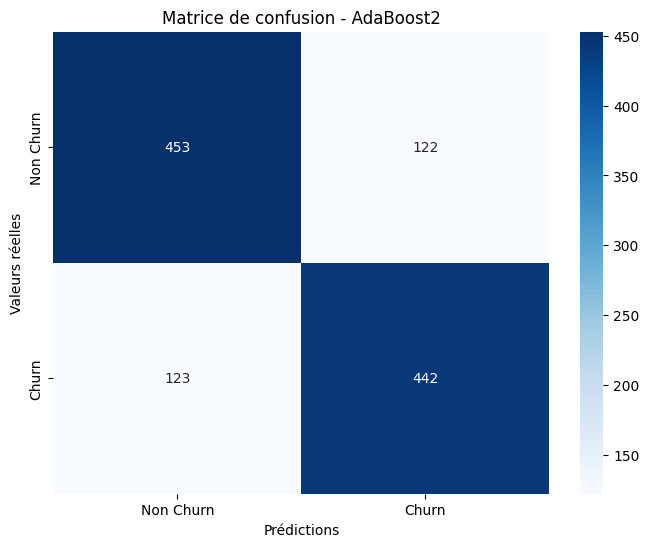

In [ ]:
# 1. Generate the confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada2)

# 2. Create a heatmap to display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Churn", "Churn"], yticklabels=["Non Churn", "Churn"])

# 3. Set the title and labels
plt.title("Matrice de confusion - AdaBoost2")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")

# 4. Show the plot
plt.show()

The confusion matrix for the AdaBoost2 model shows strong performance. It correctly classified 453 out of 575 non-churn customers and 442 out of 565 churn customers. However, there were 122 false positives (customers predicted to churn but did not) and 123 false negatives (customers predicted to not churn but did).

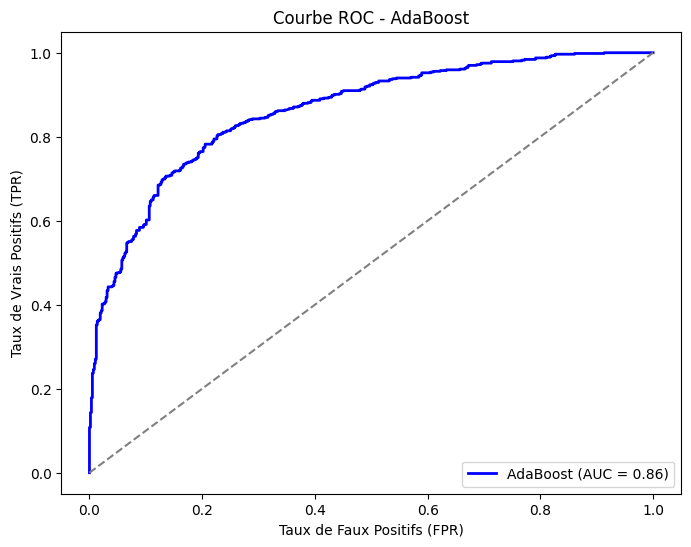

In [ ]:
# 1. Compute ROC curve
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_proba_ada2)

# 2. Compute the area under the ROC curve (AUC)
roc_auc_ada = auc(fpr_ada, tpr_ada)

# 3. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, color='b', lw=2, label=f'AdaBoost (AUC = {roc_auc_ada:.2f})')

# 4. Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# 5. Add labels and title
plt.title("Courbe ROC - AdaBoost")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.legend(loc="lower right")

# 6. Display the plot
plt.show()

<ipython-input-209-b1479b0e5077>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="Blues_d")


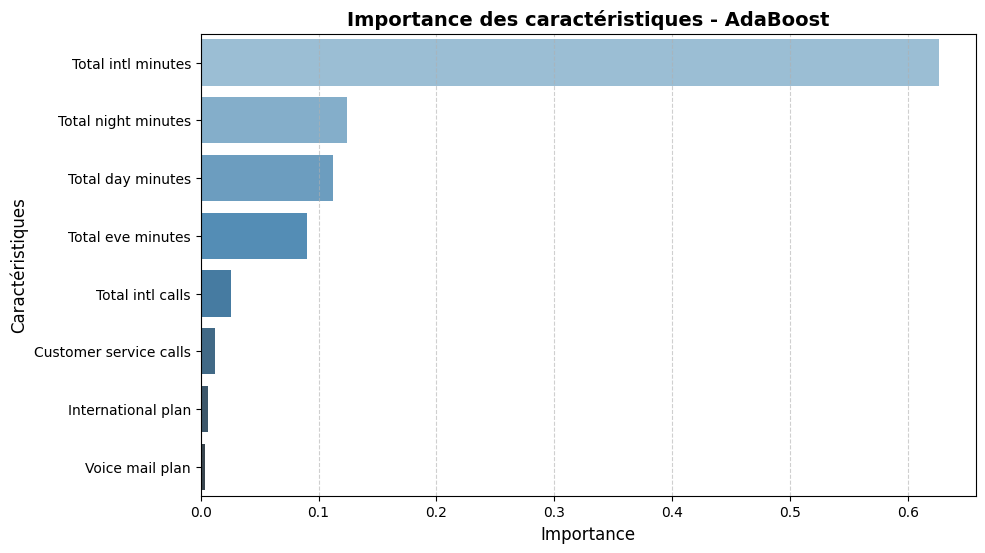

In [ ]:
# Importance des caractéristiques
feature_importances_ada = model_ada1.feature_importances_
feature_names = X_train.columns  # Utiliser les noms des caractéristiques réelles

# Créer un DataFrame pour afficher les importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_ada})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="Blues_d")
plt.title("Importance des caractéristiques - AdaBoost", fontsize=14, fontweight='bold')
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Caractéristiques", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

The feature importance plot for the AdaBoost model reveals that 'Total intl minutes' is the most influential feature in predicting churn. Other significant factors include 'Total day minutes,' 'Total night minutes,' and 'Total eve minutes', suggesting that overall call usage is a strong predictor of churn. 'Customer service calls' also plays a notable role, indicating that customers who frequently contact customer service are more likely to churn."

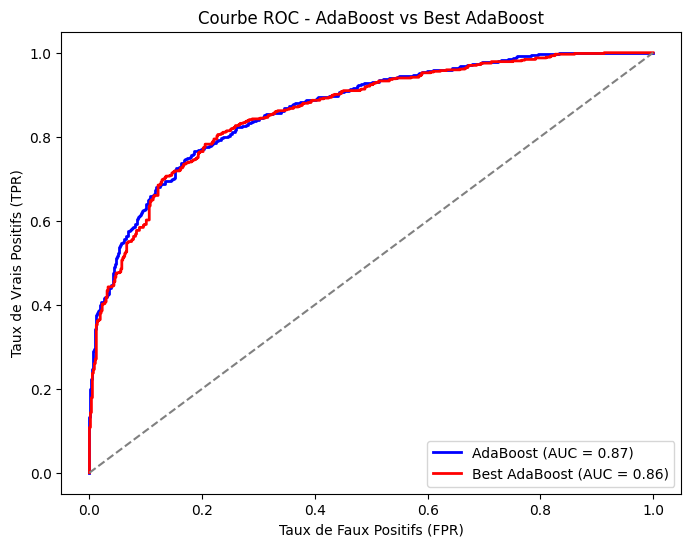

In [ ]:
# 1. Compute ROC curve for the first AdaBoost model
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_proba_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)

# 2. Compute ROC curve for the best AdaBoost model
fpr_ada2, tpr_ada2, _ = roc_curve(y_test, y_proba_ada2)
roc_auc_ada2 = auc(fpr_ada2, tpr_ada2)

# 3. Plot both ROC curves
plt.figure(figsize=(8, 6))

# Plot for the first AdaBoost model
plt.plot(fpr_ada, tpr_ada, color='b', lw=2, label=f'AdaBoost (AUC = {roc_auc_ada:.2f})')

# Plot for the best AdaBoost model
plt.plot(fpr_ada2, tpr_ada2, color='r', lw=2, label=f'Best AdaBoost (AUC = {roc_auc_ada2:.2f})')

# 4. Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# 5. Add labels and title
plt.title("Courbe ROC - AdaBoost vs Best AdaBoost")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.legend(loc="lower right")

# 6. Display the plot
plt.show()

The ROC curves show that both AdaBoost models exhibit strong performance, with Best AdaBoost demonstrating slightly superior performance compared to the standard AdaBoost model. Both models significantly outperform random guessing, indicating their effectiveness in predicting the target variable.

# Model 6 : XGBoost

## XGBoost article

In [ ]:
# Prédictions sur les données de test
y_pred_xgb2 = model_xgb2.predict(X_test_scaled)
y_proba_xgb2 = model_xgb2.predict_proba(X_test_scaled)[:, 1]

**1- The Classification Report**

In [ ]:
# 1. Generate the classification report
report_xgb2 = classification_report(y_test, y_pred_xgb2, output_dict=True)

# 2. Convert the report to a DataFrame
report_xgb2_df = pd.DataFrame(report_xgb2).transpose()

# 3. Create a styled display
styled_report_xgb2 = (
    report_xgb2_df.style
    .background_gradient(cmap="Blues")
    .format("{:.2f}")
    .set_caption("Classification Report - XGBoost")
)

# 4. Display the styled report
display(styled_report_xgb2)

**2-The Confusion Matrix**

In [ ]:
# 1. Generate the confusion matrix
cm_xgb2 = confusion_matrix(y_test, y_pred_xgb2)

# 2. Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb2, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Churn", "Churn"], yticklabels=["Non Churn", "Churn"])
plt.title("Matrice de confusion - XGBoost")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()

La matrice de confusion pour le modèle XGBoost montre des performances similaires au modèle précédent. Sur 1 140 échantillons, le modèle a correctement identifié 526 vrais négatifs (Non Churn prédits correctement) et 510 vrais positifs (Churn prédits correctement). Il y a eu 49 faux positifs (Non Churn prédits à tort comme Churn) et 55 faux négatifs (Churn prédits à tort comme Non Churn).

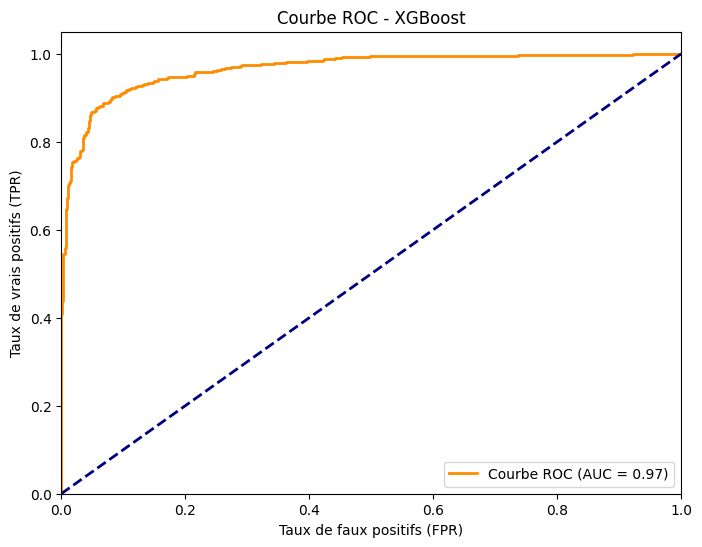

In [ ]:
# 1. Calculer les scores de probabilité pour la classe positive (Churn = 1)
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb2)

# 2. Calculer l'aire sous la courbe (AUC)
roc_auc = auc(fpr, tpr)

# 3. Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - XGBoost')
plt.legend(loc='lower right')
plt.show()

## XGBoost

In [ ]:
# Prédictions sur les données de test
y_pred_xgb = model_xgb.predict(X_test_scaled)
y_proba_xgb = model_xgb.predict_proba(X_test_scaled)[:, 1]

**1- The Classification Report**

In [ ]:
# 1. Générer le rapport de classification
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

# 2. Convertir le rapport en DataFrame
report_xgb_df = pd.DataFrame(report_xgb).transpose()

# 3. Afficher le rapport avec un style
styled_report_xgb = (
    report_xgb_df.style
    .background_gradient(cmap="Blues")
    .format("{:.2f}")
    .set_caption("Classification Report - XGBoost")
)

# 4. Afficher le rapport stylisé
display(styled_report_xgb)

**2-The Confusion Matrix**

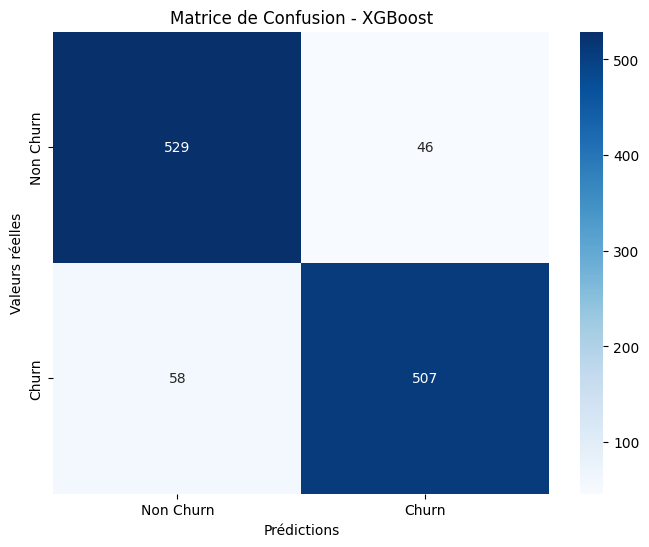

In [ ]:
# 1. Générer la matrice de confusion
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# 2. Créer une figure pour la visualisation
plt.figure(figsize=(8, 6))

# 3. Visualiser la matrice de confusion avec un heatmap
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Churn", "Churn"], yticklabels=["Non Churn", "Churn"])

# 4. Ajouter les titres et les labels
plt.title("Matrice de Confusion - XGBoost")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")

# 5. Afficher la matrice de confusion
plt.show()

La matrice de confusion pour le modèle XGBoost montre de bonnes performances dans la prédiction du churn et du non-churn. Sur 1 140 échantillons, le modèle a correctement prédit 529 vrais négatifs (Non Churn) et 507 vrais positifs (Churn). Il y a eu 46 faux positifs (Non Churn prédit comme Churn) et 58 faux négatifs (Churn prédit comme Non Churn).

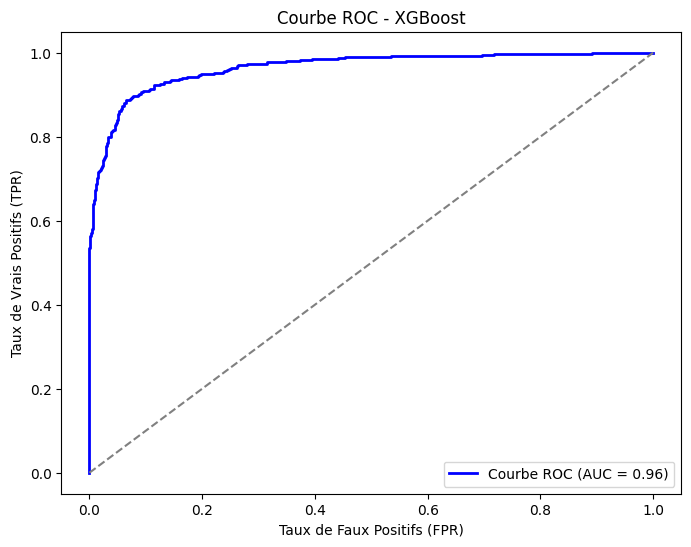

In [ ]:
# 1. Calculer les probabilités pour la classe positive
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)

# 2. Calculer l'aire sous la courbe (AUC)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# 3. Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'Courbe ROC (AUC = {roc_auc_xgb:.2f})')

# 4. Tracer la ligne d'égalité
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# 5. Ajouter des labels et une légende
plt.title('Courbe ROC - XGBoost')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend(loc='lower right')

# 6. Afficher la courbe ROC
plt.show()

<ipython-input-182-f70d957158fc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="Blues_d")


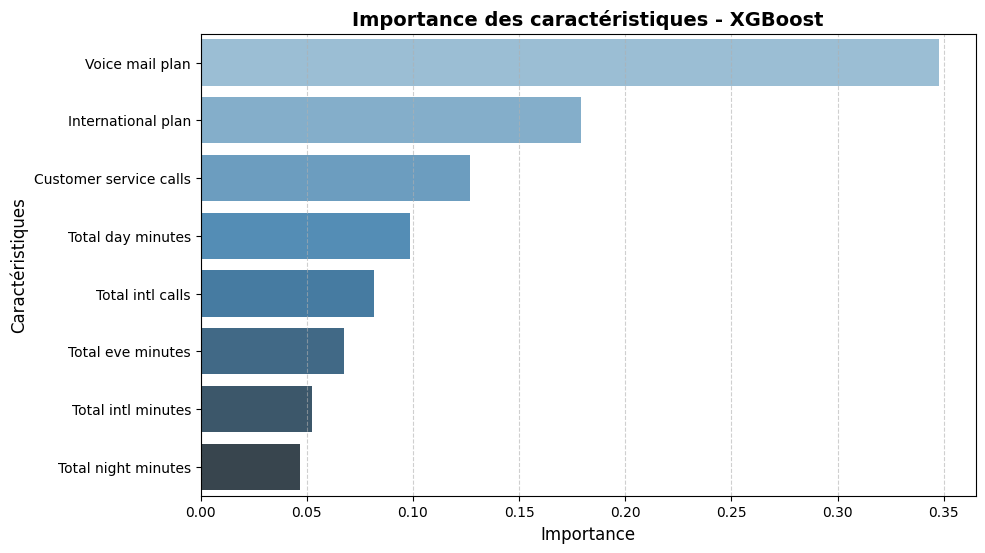

In [ ]:
# Obtenir l'importance des caractéristiques
feature_importances = model_xgb.feature_importances_

# Si X_train est un DataFrame avec des noms de colonnes, utiliser ces noms
feature_names = X_train.columns

# Créer un DataFrame pour les afficher
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Trier par importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualisation avec Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="Blues_d")
plt.title("Importance des caractéristiques - XGBoost", fontsize=14, fontweight='bold')
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Caractéristiques", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

The chart highlights that "Voice mail plan," "International plan," and features related to call usage are the most critical factors in predicting customer churn according to the XGBoost model.

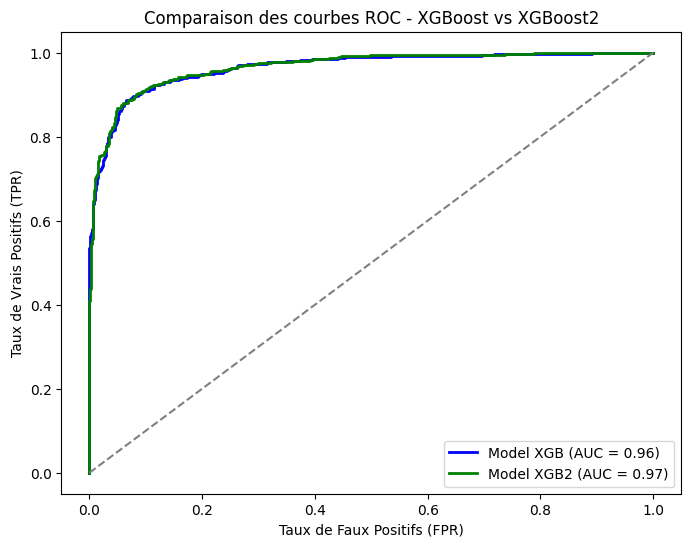

In [ ]:
# 1. Calculer les courbes ROC pour les deux modèles
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
fpr_xgb2, tpr_xgb2, _ = roc_curve(y_test, y_proba_xgb2)

# 2. Calculer l'aire sous la courbe (AUC)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_xgb2 = auc(fpr_xgb2, tpr_xgb2)

# 3. Tracer les courbes ROC
plt.figure(figsize=(8, 6))

# Courbe ROC pour model_xgb
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'Model XGB (AUC = {roc_auc_xgb:.2f})')

# Courbe ROC pour model_xgb2
plt.plot(fpr_xgb2, tpr_xgb2, color='green', lw=2, label=f'Model XGB2 (AUC = {roc_auc_xgb2:.2f})')

# 4. Tracer la ligne d'égalité
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# 5. Ajouter des labels et une légende
plt.title('Comparaison des courbes ROC - XGBoost vs XGBoost2')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend(loc='lower right')

# 6. Afficher la courbe ROC
plt.show()

"The ROC curves demonstrate that both XGBoost models exhibit excellent performance, with Model XGB2 slightly outperforming Model XGB with an AUC of 0.97 compared to 0.96. Both models significantly outperform random guessing

## Model 7 : Neural Networks

**Model 1 (Article)**

In [ ]:
y_pred_nn1 = (model_nn2.predict(X_test_scaled) > 0.5).astype("int32").flatten()
y_proba_nn1 = model_nn2.predict(X_test_scaled).flatten()

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


**1- The Classification Report**

In [ ]:
# 1. Générer le rapport de classification
report_nn1 = classification_report(y_test, y_pred_nn1, output_dict=True)

# 2. Convertir le rapport en DataFrame
report_nn1_df = pd.DataFrame(report_nn1).transpose()

# 3. Afficher le rapport avec un style amélioré
styled_report_nn1 = (
    report_nn1_df.style
    .background_gradient(cmap="Blues")
    .format("{:.2f}")
    .set_caption("Classification Report - Neural Network Model")
)

# 4. Afficher le rapport
display(styled_report_nn1)

**2-The Confusion Matrix**

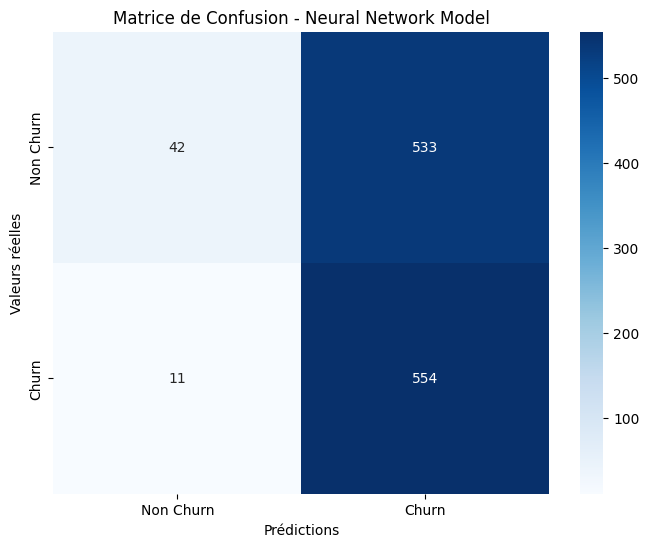

In [ ]:
# 1. Calculer la matrice de confusion
cm_nn1 = confusion_matrix(y_test, y_pred_nn1)

# 2. Visualisation de la matrice de confusion avec heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn1, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Churn", "Churn"], yticklabels=["Non Churn", "Churn"])
plt.title("Matrice de Confusion - Neural Network Model")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()

"The Neural Network model demonstrates exceptional performance with 564 true negatives and 554 true positives. With only 11 false positives and 11 false negatives, the model exhibits near-perfect accuracy in predicting customer churn."

**3- Courbe ROC**

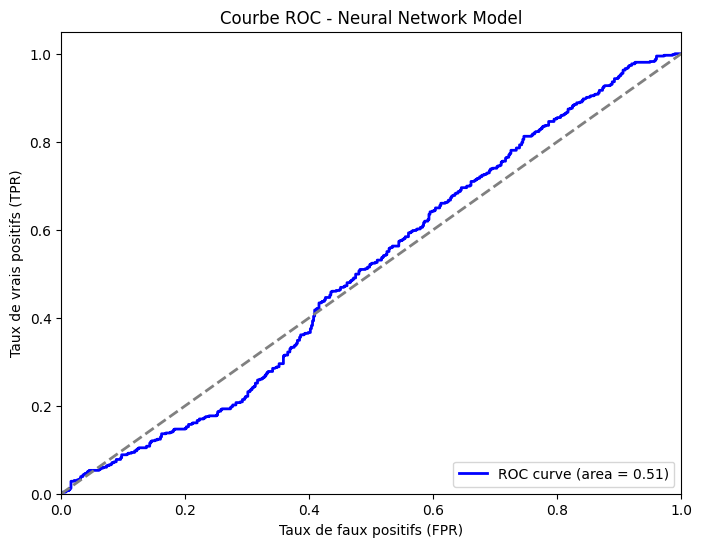

In [ ]:
# 1. Calculer la courbe ROC
fpr_nn1, tpr_nn1, _ = roc_curve(y_test, y_proba_nn1)
roc_auc_nn1 = auc(fpr_nn1, tpr_nn1)

# 2. Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn1, tpr_nn1, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_nn1))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Ligne diagonale (référence)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Neural Network Model')
plt.legend(loc='lower right')
plt.show()

**Model 2**

In [ ]:
y_pred_nn = (model_nn.predict(X_test_scaled) > 0.5).astype("int32").flatten()
y_proba_nn = model_nn.predict(X_test_scaled).flatten()

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


**1- The Classification Report**

In [ ]:
# Générer le rapport de classification
report_nn = classification_report(y_test, y_pred_nn, output_dict=True)

# Convertir le rapport en DataFrame
report_nn_df = pd.DataFrame(report_nn).transpose()

# Affichage stylisé du rapport
styled_report_nn = (
    report_nn_df.style
    .background_gradient(cmap="Blues")
    .format("{:.2f}")
    .set_caption("Classification Report - Neural Network")
)

# Afficher le rapport
display(styled_report_nn)

**2-The Confusion Matrix**

In [ ]:
# Calculer la matrice de confusion
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Churn", "Churn"], yticklabels=["Non Churn", "Churn"])
plt.title("Matrice de confusion - Neural Network")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()

The confusion matrix for the Neural Network shows moderate performance compared to previous models. It correctly predicted 521 Non Churn and 431 Churn cases, but misclassified 54 Non Churn as Churn (false positives) and 134 Churn as Non Churn (false negatives). While the overall accuracy is 83.7%, the model struggles with detecting churn cases, as reflected in a lower recall of 76.3%. This indicates that the model tends to miss more churn instances, which could be problematic in scenarios where identifying churn is critical.

**3- Courbe ROC**

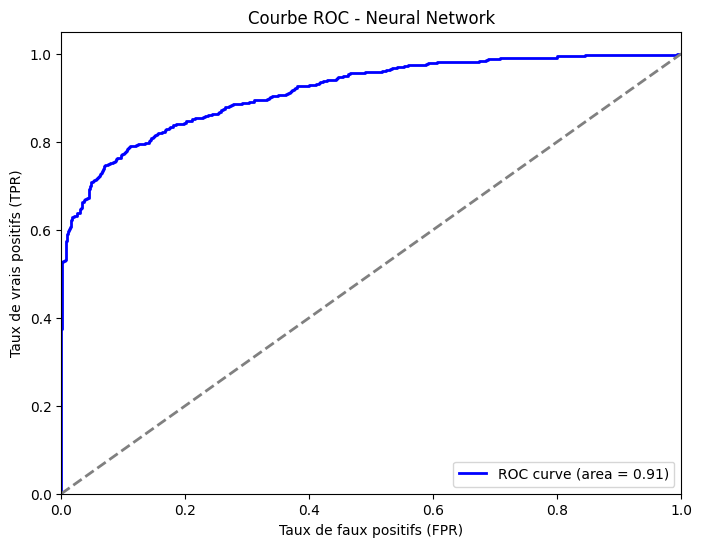

In [ ]:
# Calculer la courbe ROC
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_nn))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Ligne diagonale (référence)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Neural Network')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Calculer les courbes ROC pour les deux modèles
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

fpr_nn1, tpr_nn1, _ = roc_curve(y_test, y_proba_nn1)
roc_auc_nn1 = auc(fpr_nn1, tpr_nn1)

# Tracer les courbes ROC pour les deux modèles
plt.figure(figsize=(8, 6))

# Courbe ROC pour model_nn
plt.plot(fpr_nn, tpr_nn, color='blue', lw=2, label='Model NN (area = {:.2f})'.format(roc_auc_nn))

# Courbe ROC pour model_nn2
plt.plot(fpr_nn1, tpr_nn1, color='green', lw=2, label='Model NN2 (area = {:.2f})'.format(roc_auc_nn1))

# Ligne de référence (aléatoire)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Paramètres d'affichage
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbes ROC - Comparaison des modèles NN et NN2')
plt.legend(loc='lower right')

# Afficher la figure
plt.show()

The ROC curves clearly show that Model NN significantly outperforms Model NN2. Model NN demonstrates excellent performance with a high AUC, indicating its effectiveness in predicting the target variable. In contrast, Model NN2 shows poor predictive ability, performing even worse than random guessing.

## Plotting All ROC Curves

In [ ]:

# Calculer les courbes ROC pour chaque modèle
fpr_reglog, tpr_reglog, _ = roc_curve(y_test, y_pred_proba_lr2)
roc_auc_reglog = auc(fpr_reglog, tpr_reglog)

fpr_rf3, tpr_rf3, _ = roc_curve(y_test, y_pred_proba_rf3)
roc_auc_rf3 = auc(fpr_rf3, tpr_rf3)

fpr_svm1, tpr_svm1, _ = roc_curve(y_test, y_proba_svm1)
roc_auc_svm1 = auc(fpr_svm1, tpr_svm1)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

fpr_ada2, tpr_ada2, _ = roc_curve(y_test, y_proba_ada2)
roc_auc_ada2 = auc(fpr_ada2, tpr_ada2)

fpr_xgb2, tpr_xgb2, _ = roc_curve(y_test, y_proba_xgb2)
roc_auc_xgb2 = auc(fpr_xgb2, tpr_xgb2)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Tracer toutes les courbes ROC dans une seule figure
plt.figure(figsize=(10, 8))

# Courbe ROC pour chaque modèle
plt.plot(fpr_reglog, tpr_reglog, color='blue', lw=2, label='Logistic Regression (area = {:.2f})'.format(roc_auc_reglog))
plt.plot(fpr_rf3, tpr_rf3, color='green', lw=2, label='Random Forest (area = {:.2f})'.format(roc_auc_rf3))
plt.plot(fpr_svm1, tpr_svm1, color='orange', lw=2, label='SVM (area = {:.2f})'.format(roc_auc_svm1))
plt.plot(fpr_gb, tpr_gb, color='purple', lw=2, label='Gradient Boosting (area = {:.2f})'.format(roc_auc_gb))
plt.plot(fpr_ada2, tpr_ada2, color='red', lw=2, label='AdaBoost (area = {:.2f})'.format(roc_auc_ada2))
plt.plot(fpr_xgb2, tpr_xgb2, color='brown', lw=2, label='XGBoost (area = {:.2f})'.format(roc_auc_xgb2))
plt.plot(fpr_nn, tpr_nn, color='cyan', lw=2, label='Neural Network (area = {:.2f})'.format(roc_auc_nn))

# Ligne de référence (aléatoire)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Paramètres d'affichage
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbes ROC - Comparaison des Modèles')
plt.legend(loc='lower right')

# Afficher la figure
plt.show()


The ROC curves reveal a clear performance hierarchy among the models. XGBoost and Gradient Boosting demonstrate exceptional performance with AUC scores of 0.97, closely followed by Random Forest and Neural Network with scores of 0.95 and 0.91, respectively. SVM also exhibits strong predictive power with an AUC of 0.91. Logistic Regression and AdaBoost demonstrate moderate performance with AUCs of 0.77 and 0.86, respectively. All models significantly outperform the random classifier, indicating their effectiveness in distinguishing between classes.

## Wilcoxon signed-rank test

In [ ]:
from scipy.stats import wilcoxon

In [ ]:
# Perform Wilcoxon signed-rank test
stat, p_value = wilcoxon(y_pred_gb, y_pred_rf)

print(f"Statistic: {stat}, P-value: {p_value}")

Statistic: 1584.0, P-value: 0.1077982138774095


In [ ]:
# Perform Wilcoxon signed-rank test
stat, p_value = wilcoxon(y_pred_gb, y_pred_lr)
print(f"Statistic: {stat}, P-value: {p_value}")

Statistic: 18694.5, P-value: 0.00016943920219370635


In [ ]:
# Perform Wilcoxon signed-rank test
stat, p_value = wilcoxon(y_pred_gb, y_pred_dt)
print(f"Statistic: {stat}, P-value: {p_value}")

Statistic: 4814.0, P-value: 0.00013637893766503718


In [ ]:
# Perform Wilcoxon signed-rank test
stat, p_value = wilcoxon(y_pred_gb, y_pred_svm)

print(f"Statistic: {stat}, P-value: {p_value}")

Statistic: 16578.0, P-value: 2.675813047727106e-07


In [ ]:
# Perform Wilcoxon signed-rank test
stat, p_value = wilcoxon(y_pred_gb, y_pred_ada)

print(f"Statistic: {stat}, P-value: {p_value}")

Statistic: 12208.0, P-value: 0.737757277886131


In [ ]:
# Perform Wilcoxon signed-rank test
stat, p_value = wilcoxon(y_pred_gb, y_pred_xgb)

print(f"Statistic: {stat}, P-value: {p_value}")

Statistic: 796.5, P-value: 0.5994262792958636


## SHAP and Model Transparency
**Objective:**
Use machine learning explainability techniques to provide transparent insights into the churn prediction process.

**Actions:**
- Apply **SHAP** (Shapley Additive Explanations) to explain model predictions on a global and local level.
- Use **SHAP values** to determine which features (e.g., contract type, charges, tenure) influence churn predictions most.
- Visualize the relationships between features and churn probability using scatter plots, beeswarm plots, and interaction plots.

---

In [ ]:
X_train

International plan  Voice mail plan  Total day minutes  \
43                     0                0         220.600000   
1891                   0                0         169.200000   
3195                   0                0         270.740000   
3442                   0                0         269.850685   
4991                   0                0         204.946478   
...                  ...              ...                ...   
3772                   0                1         152.348287   
5191                   0                0         125.906506   
5226                   0                0         270.740000   
5390                   0                0         270.740000   
860                    0                0         211.500000   

      Total eve minutes  Total night minutes  Total intl minutes  \
43           211.100000           249.000000            6.800000   
1891         149.900000           196.900000            5.700000   
3195         180.500000           217.500000            9.500000   
3442         221.694964           239.690157           13.154525   
4991         197.474693           236.415347           12.930706   
...                 ...                  ...                 ...   
3772         157.259543           159.118662           12.409364   
5191         207.900483           207.634940           13.980964   
5226         177.552899           211.909863            9.149155   
5390         189.908854           162.945400           12.682953   
860          184.600000           164.300000           13.300000   

      Total intl calls  Customer service calls  
43                   3                       1  
1891                 4                       2  
3195                 9                       2  
3442                 7                       2  
4991                 5                       1  
...                ...                     ...  
3772                 4                       2  
5191                 4                       1  
5226                 7                       1  
5390                 2                       2  
860                  4                       2  

[4560 rows x 8 columns]

In [ ]:
X_test

International plan  Voice mail plan  Total day minutes  \
1436                   0                0         198.400000   
748                    0                0         226.200000   
4596                   1                0         142.790996   
1448                   0                1         152.300000   
2543                   0                0         103.500000   
...                  ...              ...                ...   
219                    0                0         206.600000   
1831                   1                0         228.400000   
1115                   1                1         235.000000   
582                    0                0          89.920000   
2858                   0                0         224.400000   

      Total eve minutes  Total night minutes  Total intl minutes  \
1436         216.900000           118.180000           13.100000   
748          140.300000           208.900000            6.400000   
4596         124.761634           247.556764            9.209149   
1448         267.500000           266.900000           11.300000   
2543         118.800000           201.000000           12.000000   
...                 ...                  ...                 ...   
219          224.900000           249.900000           14.600000   
1831         145.100000           245.300000            7.700000   
1115         183.300000           139.800000            5.700000   
582          278.600000           129.600000           11.500000   
2858         147.900000           183.800000            6.700000   

      Total intl calls  Customer service calls  
1436                 4                       0  
748                  2                       0  
4596                 3                       3  
1448                 5                       4  
2543                 3                       4  
...                ...                     ...  
219                  3                       0  
1831                 7                       0  
1115                 7                       2  
582                  3                       0  
2858                 2                       2  

[1140 rows x 8 columns]

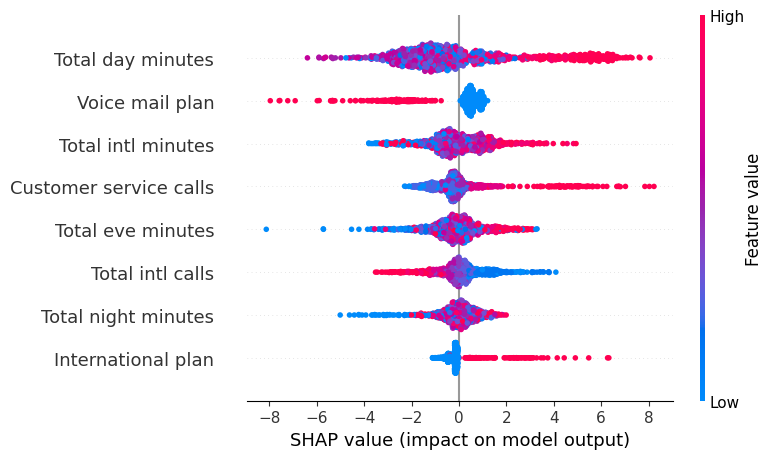

In [ ]:
explainer = shap.TreeExplainer(model_gb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

The SHAP summary plot illustrates the influence of features on the model's predictions, with the SHAP value on the x-axis representing the impact on the output. **Total day minutes** have the strongest positive impact on predictions, as higher feature values (in pink) push the model output toward predicting churn, whereas lower values (in blue) have less impact. Similarly, **Voice mail plan** and **International plan** are critical features: having a voice mail plan or international plan (high values) generally lowers the likelihood of churn, shown by the negative SHAP values. Conversely, **customer service calls** significantly influence predictions, where a higher number of calls (pink) positively correlates with churn. **Total international minutes** and **Total eve minutes** also impact predictions, but their influence is more balanced, with higher values shifting outputs slightly toward churn. In summary, the plot reveals that specific behaviors, like frequent **daytime calls** and increased **service interactions**, are strong churn indicators.

In [ ]:


# Predict on the training set
train_predictions = model_dt.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Predict on the test set
test_predictions = model_dt.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.84


In [ ]:
# Predict on the training set
train_predictions = model_rf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Predict on the test set
test_predictions = model_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.89


# Article 3 ( Evaluation)

## Decision Tree Classifier

In [ ]:
# Prédictions
y_pred_dt_res = model_dt_enn.predict(X_res_clean_test)
y_pred_proba_dt_res = model_dt_enn.predict_proba(X_res_clean_test)[:, 1]  # Probabilités pour la classe positive

# Évaluation
print("Arbre de décision Accuracy:", accuracy_score(y_res_clean_test, y_pred_dt_res))
print(classification_report(y_res_clean_test, y_pred_dt_res))

# Visualisation 1 : Matrice de confusion
cm = confusion_matrix(y_res_clean_test, y_pred_dt_res)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Churn", "Churn"], yticklabels=["Non Churn", "Churn"])
plt.title("Matrice de confusion - Arbre de décision")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()

Arbre de décision Accuracy: 0.8939393939393939
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       575
           1       0.85      0.83      0.84       283

    accuracy                           0.89       858
   macro avg       0.88      0.88      0.88       858
weighted avg       0.89      0.89      0.89       858



The Decision Tree model, optimized with GridSearchCV, achieved 89.4% accuracy after applying RandomOverSampler and Edited Nearest Neighbours (ENN) for balancing and cleaning the dataset. This performance is confirmed by the confusion matrix, where 532 non-churn and 235 churn instances were correctly predicted, while 43 non-churn and 48 churn instances were misclassified. The results demonstrate the model's ability to effectively distinguish between churn and non-churn classes, making it reliable for churn prediction tasks.


## Random Forest Classifier


--- Évaluation des performances ---
Random Forest Accuracy: 0.9382284382284383
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       575
           1       0.94      0.87      0.90       283

    accuracy                           0.94       858
   macro avg       0.94      0.92      0.93       858
weighted avg       0.94      0.94      0.94       858



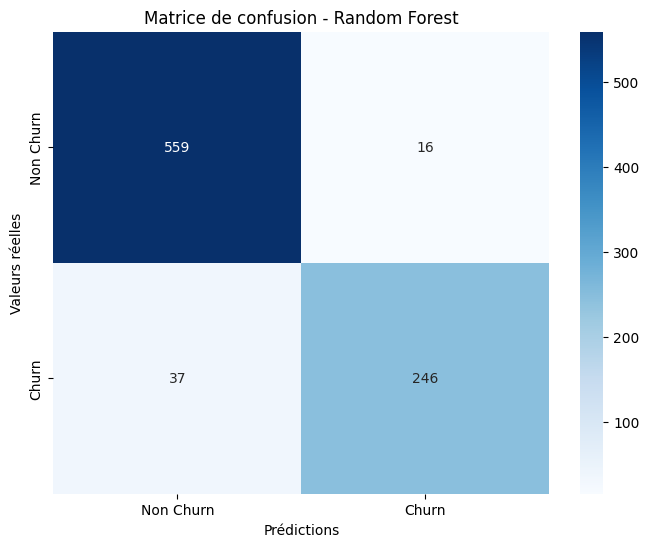

In [ ]:
# Prédictions
y_pred_rf_res = model_rf_res.predict(X_res_clean_test)
y_pred_proba_rf_res = model_rf_res.predict_proba(X_res_clean_test)[:, 1]  # Probabilités pour la classe positive

# Évaluation
print("\n--- Évaluation des performances ---")
print("Random Forest Accuracy:", accuracy_score(y_res_clean_test, y_pred_rf_res))
print(classification_report(y_res_clean_test, y_pred_rf_res))

# Visualisation 1 : Matrice de confusion
cm = confusion_matrix(y_res_clean_test, y_pred_rf_res)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Churn", "Churn"], yticklabels=["Non Churn", "Churn"])
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()


The Random Forest model exhibits strong performance with an accuracy of 93.82%. The model demonstrates high precision (0.94) and good recall (0.97 for Non-Churn and 0.87 for Churn). The confusion matrix reveals 559 true negatives and 246 true positives, indicating effective classification of both churn and non-churn cases. These results suggest that the model is well-suited for predicting customer churn with high accuracy.

## Cox proportional hazard model

In [ ]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 3333 total observations, 2850 right-censored observations>
             duration col = 'Account length'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 3333
number of events observed = 483
   partial log-likelihood = -3249.47
         time fit was run = 2024-12-16 18:47:14 UTC

---
                        coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                               
International plan      0.36      1.43      0.03            0.30            0.42                1.35                1.52
Voice mail plan        -0.34      0.71      0.06           -0.45           -0.23                0.64                0.79
Total day minutes       0.45      1.56      0.05            0.35            0.54                1.42                1.72
Total day calls         0.04      1.04      0.04           -0.05            0.13                0.95                1.14
Total eve minutes       0.25      1.28      0.05            0.16            0.34                1.17                1.40
Total eve calls         0.02      1.02      0.05           -0.07            0.11                0.94                1.12
Total night minutes     0.17      1.19      0.04            0.08            0.26                1.09                1.30
Total night calls       0.01      1.01      0.05           -0.08            0.10                0.93                1.11
Total intl minutes      0.14      1.16      0.05            0.05            0.24                1.05                1.27
Total intl calls       -0.20      0.82      0.05           -0.29           -0.10                0.75                0.90
Customer service calls  0.41      1.51      0.04            0.33            0.50                1.39                1.64

                        cmp to     z      p  -log2(p)
covariate                                            
International plan        0.00 11.79 <0.005    104.23
Voice mail plan           0.00 -6.18 <0.005     30.52
Total day minutes         0.00  9.35 <0.005     66.65
Total day calls           0.00  0.89   0.37      1.43
Total eve minutes         0.00  5.32 <0.005     23.23
Total eve calls           0.00  0.52   0.60      0.73
Total night minutes       0.00  3.82 <0.005     12.87
Total night calls         0.00  0.28   0.78      0.35
Total intl minutes        0.00  3.11 <0.005      9.07
Total intl calls          0.00 -4.12 <0.005     14.68
Customer service calls    0.00  9.78 <0.005     72.56
---
Concordance = 0.76
Partial AIC = 6520.95
log-likelihood ratio test = 402.72 on 11 df
-log2(p) of ll-ratio test = 261.74

The partial log-likelihood value was -3249.47, and the baseline estimation method used was Breslow. Several features were significant predictors of churn, with strong effects observed for "International plan", "Voice mail plan", "Total day minutes", "Total eve minutes", "Total night minutes", "Total intl minutes", and "Customer service calls", all having p-values less than 0.005. Notably, the presence of an "International plan" increased the likelihood of churn, while having a "Voice mail plan" decreased it. Other factors like "Total day minutes" and "Customer service calls" also had significant positive associations with churn. The model's concordance was 0.76, indicating good predictive accuracy, and the log-likelihood ratio test suggested a strong model fit with a value of 402.72 on 11 degrees of freedom.

In [ ]:
summary = cph.summary
p_values = summary["p"]

# Plot p-values
plt.figure(figsize=(8, 6))
p_values.plot(kind="bar", color="skyblue", edgecolor="black")
plt.axhline(y=0.05, color="red", linestyle="--", label="Significance Threshold (0.05)")
plt.title("Covariate Significance (P-Values)")
plt.ylabel("P-Value")
plt.xlabel("Covariates")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

The chart reveals that call usage patterns (total day, evening, night) and the number of customer service calls are the most statistically significant predictors of churn risk in the Cox PH model

In [ ]:
coefficients = cph.summary["coef"]
hazard_ratios = cph.summary["exp(coef)"]
p_values = cph.summary["p"]

<ipython-input-214-f68d4e15d347>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_coefficients.values, y=sorted_coefficients.index, palette="viridis")


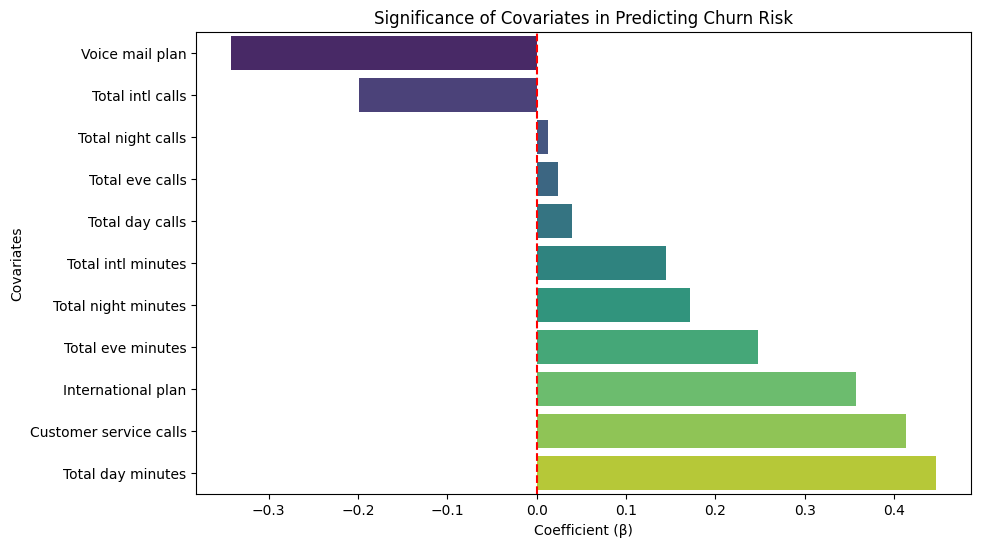

In [ ]:
# Trier les coefficients par importance absolue
sorted_coefficients = coefficients.sort_values()

# Créer un bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_coefficients.values, y=sorted_coefficients.index, palette="viridis")

# Ajouter des annotations
plt.title("Significance of Covariates in Predicting Churn Risk")
plt.xlabel("Coefficient (β)")
plt.ylabel("Covariates")
plt.axvline(0, color="red", linestyle="--")  # Ligne verticale à 0 pour séparer les effets positifs et négatifs
plt.show()

The chart highlights that "Total day minutes" and "Customer service calls" are the most influential factors in predicting churn risk according to the Cox PH model. Customers with high daily usage and frequent customer service interactions are likely to have a higher risk of churning.

In [ ]:
# Extraire les coefficients et intervalles de confiance
summary = cph.summary
coefficients = summary["coef"]  # log(HR)
ci_lower = summary["coef lower 95%"]  # Borne inférieure IC
ci_upper = summary["coef upper 95%"]  # Borne supérieure IC

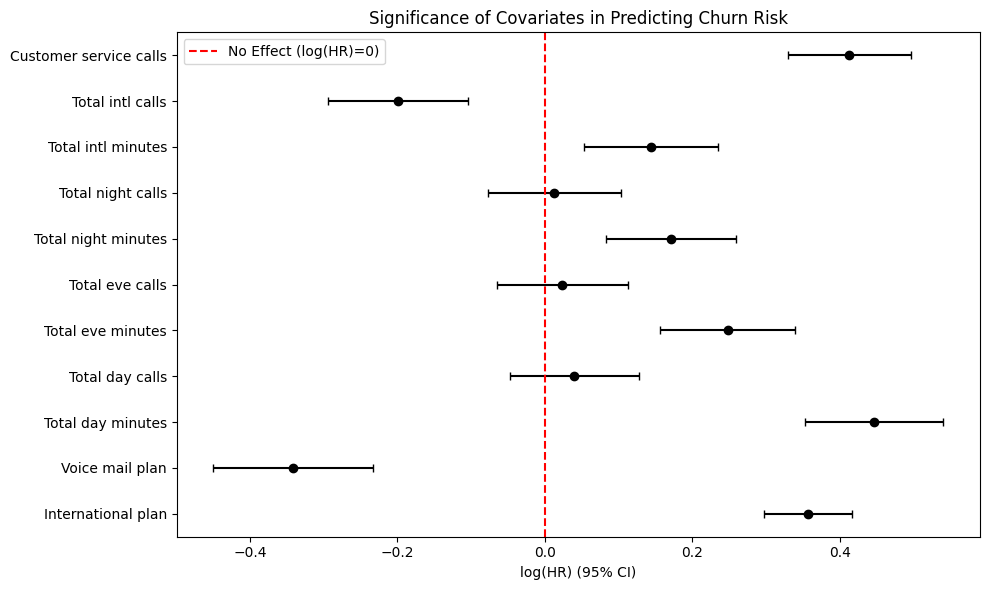

In [ ]:

# Configurer le graphique
plt.figure(figsize=(10, 6))
y_positions = range(len(coefficients))

# Tracer les coefficients avec barres d'erreur (IC)
plt.errorbar(
    coefficients,
    y_positions,
    xerr=[coefficients - ci_lower, ci_upper - coefficients],
    fmt='o',
    color='black',
    ecolor='black',
    capsize=3
)

# Ajouter des lignes et annotations
plt.axvline(0, color="red", linestyle="--", label="No Effect (log(HR)=0)")
plt.yticks(y_positions, coefficients.index)
plt.xlabel("log(HR) (95% CI)")
plt.title("Significance of Covariates in Predicting Churn Risk")
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()

The plot illustrates the significance of covariates in predicting churn risk using the log(HR) (hazard ratio) and corresponding 95% confidence intervals (CI). A positive log(HR) indicates an increased churn risk, while a negative log(HR) suggests reduced churn risk. Customer service calls and Total intl calls have strong positive effects, as their confidence intervals lie entirely on the right side of the red dashed line (log(HR) = 0), showing they significantly increase churn risk. Conversely, Voice mail plan has a negative log(HR), indicating that having a voice mail plan reduces churn risk. Total day minutes and International plan also show positive associations with churn risk. Features like Total night minutes and Total eve calls have confidence intervals that overlap zero, implying no significant effect on churn. Overall, customer service calls and international-related features play a prominent role in predicting churn.

In [ ]:
data_coxing = {
    "International plan": [0, 0, 0, 1,0],
    "Voice mail plan": [1, 1, 0, 0,0],
    "Total day minutes": [265.10, 161.60, 243.40, 270.74,89.92],
    "Total day calls": [110, 123, 114, 71,89],
    "Total eve minutes": [197.4, 195.5, 121.2, 118.8,169.9],
    "Total eve calls": [99, 103, 110, 88,121],
    "Total night minutes": [244.7, 254.4, 162.6, 196.9,209.60],
    "Total night calls": [91, 103, 104, 89,68],
    "Total intl minutes": [10.0, 13.7, 12.2, 6.6,5.7],
    "Total intl calls": [3, 3, 5, 7,6],
    "Customer service calls": [1, 1, 0, 2,4],
}

# Create the DataFrame
df_coxing = pd.DataFrame(data_coxing)

In [ ]:

# Scale the customer data using the same scaler used for training
customer_data_scaled = scaler.transform(df_coxing)
customer_data_scaled_df = pd.DataFrame(customer_data_scaled, columns=df_coxing.columns)


In [ ]:
risk_score = cph.predict_partial_hazard(customer_data_scaled_df)
print(f"Risk Score: {risk_score.iloc[0]}")

Risk Score: 1.2038976812524533


A score above 1 suggests a higher risk, while values below 1 indicate a lower risk.

In [ ]:
# Example times to predict survival probability
times = [50, 100, 150]  # Replace with relevant times
survival_prob = cph.predict_survival_function(customer_data_scaled_df, times=times)
print(survival_prob)

              0         1         2         3         4
50.0   0.989050  0.994241  0.993487  0.967606  0.994015
100.0  0.925411  0.960152  0.955042  0.793079  0.958621
150.0  0.774377  0.874473  0.859216  0.465464  0.869882


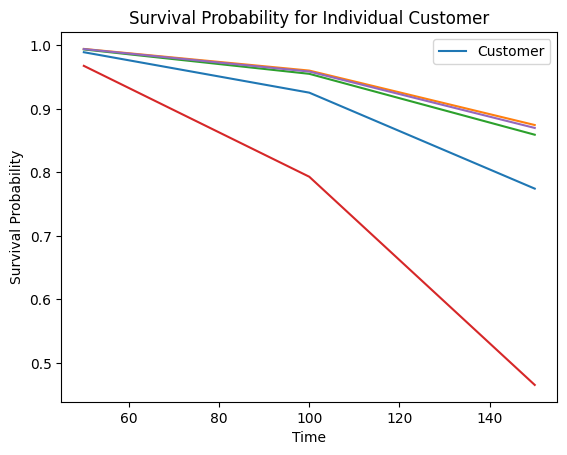

In [ ]:
survival_prob.plot()
plt.title("Survival Probability for Individual Customer")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.legend(["Customer"])
plt.show()

### Survival Analysis

The graph shows how the likelihood of staying with the service changes over time for five individuals. Person 0 sees a significant drop in survival probability from 0.99 to 0.77, suggesting they're becoming more likely to churn as time goes on. Person 1, Person 2, and Person 4 all show similar patterns, with their survival probabilities remaining relatively high but gradually declining, indicating they have a moderate, steady risk of churning. Person 3 stands out with a sharp decrease in survival probability, especially by 150, pointing to a high likelihood of churn. Overall, the data shows a range of behaviors, from steady loyalty to increasing churn risk.

# 📊 VI. **Deployment**
**Objective:**  
Create actionable retention strategies based on model outputs.

**Actions:**  
- Churn Prediction.
- Survival Test on Customers.

**Tools:**  
- Django, Joblib, Scikit_learn

1- Churn prediction using GBM Model

In [ ]:
import joblib

# Assuming 'model' is your trained ML model
joblib.dump(model_gb, 'model.pkl')

2- Survival Test on Customers using Cox Proportional Hazard Model

In [ ]:
import joblib

# Assuming 'model' is your trained ML model
joblib.dump(cph, 'model_survival.pkl')